# import modules

In [63]:
import sys

sys.path.insert(0, "../")

from modules.Classes_ver1 import *
from modules.default_params_ver1 import *
from modules.functions_ver1_draft import *

plt.rcParams["figure.dpi"] = 150

# assign params

In [65]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

# optimize mismatch between template NP and source L over $\mathcal{M}_{\text{NP}}$

## define functions

In [66]:
def omit_numerical_errors(arr, n=16, order=1.5) -> np.ndarray:
    """
    Omit numerical errors in an array by replacing values that are greater than a certain order of the median with NaN.

    Parameters:
    - arr (array-like): The input array.
    - n (int): The number of neighbors to consider when calculating the median. Default is 16.
    - order (float): The order of the median used to determine if a value is an error. Default is 1.5.

    Returns:
    - np.ndarray: The modified array with numerical errors omitted.
    """

    assert len(arr) >= n, "Array length must be greater than or equal to n."
    arr_copy = np.array(arr.copy())

    for i in range(len(arr_copy)):
        if i < n // 2:
            neighbors = arr_copy[:n]
        elif i >= len(arr_copy) - n // 2:
            neighbors = arr_copy[-n:]
        else:
            neighbors = arr_copy[i - n // 2 : i + n // 2]

        median = np.nanmedian(neighbors)
        if arr_copy[i] > order * median:
            arr_copy[i] = np.nan

    return arr_copy

In [67]:
mcz_L_arr = np.linspace(10, 90, 250)


def mismatch_plot_general(opt_match=True):
    optimized_mcz_dict = {}
    ep_NP_L_arr = np.zeros(len(mcz_L_arr))
    optimized_ep_NP_L_arr = np.zeros(len(mcz_L_arr))
    optimized_ep_NP_L_mcz = np.zeros(len(mcz_L_arr))

    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()

    for i, mcz_L in enumerate(mcz_L_arr):
        lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz_L * solar_mass

        ep_NP_L = mismatch_general(
            NP_params, lens_params, use_optimized_match=opt_match
        )["mismatch"]
        
        ep_NP_L_arr[i] = ep_NP_L

        optimized_ep_NP_L_dict = optimize_mismatch_mcz_general(
            NP_params, lens_params, use_optimized_match=opt_match
        )
        optimized_ep_NP_L_arr[i] = optimized_ep_NP_L_dict["ep_min"]
        optimized_ep_NP_L_mcz[i] = optimized_ep_NP_L_dict["ep_min_mcz"]

    ep_NP_L_arr = omit_numerical_errors(ep_NP_L_arr)
    optimized_mcz_dict = {
        "mcz_L_arr": mcz_L_arr,
        "ep_NP_L_arr": ep_NP_L_arr,
        "optimized_ep_NP_L_arr": optimized_ep_NP_L_arr,
        "optimized_ep_NP_L_mcz": optimized_ep_NP_L_mcz,
    }

    # plot mismatch vs mcz
    plt.plot(mcz_L_arr, optimized_mcz_dict["ep_NP_L_arr"], label=r"$\epsilon$", ls="-")
    plt.plot(
        mcz_L_arr,
        optimized_mcz_dict["optimized_ep_NP_L_arr"],
        label=r"$\min_{\mathcal{M}_{\rm t}}$ $\epsilon$",
        ls="-",
    )

    mcz_vertical = (
        (lens_params["eta"] ** (3 / 5))
        / (6 ** (3 / 2) * np.pi * (20 + 1 / Delta_td))
        / solar_mass
    )
    plt.axvline(x=mcz_vertical, c="green", ls="-", alpha=0.5)

    ep_horizontal = 1 - (1 + I) ** (-1 / 2)
    plt.axhline(y=ep_horizontal, c="grey", ls=":")

    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")
    plt.legend()
    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

    plt.suptitle(
        r"Mismatch Between NP Templates & Lensed Source Minimized Over $\mathcal{M}_{\rm t}$"
    )

    return optimized_mcz_dict

In [68]:
def mismatch_plot_general_zoomed(opt_match=True):
    optimized_mcz_dict = {}
    ep_NP_L_arr = np.zeros(len(mcz_L_arr))
    optimized_ep_NP_L_arr = np.zeros(len(mcz_L_arr))
    optimized_ep_NP_L_mcz = np.zeros(len(mcz_L_arr))

    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()

    for i, mcz_L in enumerate(mcz_L_arr):
        lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz_L * solar_mass

        ep_NP_L = mismatch_general(
            NP_params, lens_params, use_optimized_match=opt_match
        )["mismatch"]
        
        ep_NP_L_arr[i] = ep_NP_L

        optimized_ep_NP_L_dict = optimize_mismatch_mcz_general(
            NP_params, lens_params, use_optimized_match=opt_match
        )
        optimized_ep_NP_L_arr[i] = optimized_ep_NP_L_dict["ep_min"]
        optimized_ep_NP_L_mcz[i] = optimized_ep_NP_L_dict["ep_min_mcz"]

    ep_NP_L_arr = omit_numerical_errors(ep_NP_L_arr)
    optimized_mcz_dict = {
        "mcz_L_arr": mcz_L_arr,
        "ep_NP_L_arr": ep_NP_L_arr,
        "optimized_ep_NP_L_arr": optimized_ep_NP_L_arr,
        "optimized_ep_NP_L_mcz": optimized_ep_NP_L_mcz,
    }

    # plot mismatch vs mcz
    plt.plot(mcz_L_arr, optimized_mcz_dict["ep_NP_L_arr"], label=r"$\epsilon$", ls="-")

    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")
    plt.legend()
    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

    plt.suptitle(r"Actual Mismatch Between NP Templates & a Lensed Source")

    return optimized_mcz_dict

In [69]:
def mismatch_plot_psd(opt_match=True):
    optimized_mcz_dict = {}
    ep_NP_L_arr = np.zeros(len(mcz_L_arr))
    optimized_ep_NP_L_arr = np.zeros(len(mcz_L_arr))
    optimized_ep_NP_L_mcz = np.zeros(len(mcz_L_arr))

    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()

    for i, mcz_L in enumerate(mcz_L_arr):
        lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz_L * solar_mass

        ep_NP_L = mismatch_general_psd(
            NP_params, lens_params, use_optimized_match=opt_match
        )["mismatch"]
        
        ep_NP_L_arr[i] = ep_NP_L

        optimized_ep_NP_L_dict = optimize_mismatch_mcz_psd(
            NP_params, lens_params, use_optimized_match=opt_match
        )
        optimized_ep_NP_L_arr[i] = optimized_ep_NP_L_dict["ep_min"]
        optimized_ep_NP_L_mcz[i] = optimized_ep_NP_L_dict["ep_min_mcz"]

    ep_NP_L_arr = omit_numerical_errors(ep_NP_L_arr)
    optimized_mcz_dict = {
        "mcz_L_arr": mcz_L_arr,
        "ep_NP_L_arr": ep_NP_L_arr,
        "optimized_ep_NP_L_arr": optimized_ep_NP_L_arr,
        "optimized_ep_NP_L_mcz": optimized_ep_NP_L_mcz,
    }

    # plot mismatch vs mcz
    plt.plot(mcz_L_arr, optimized_mcz_dict["ep_NP_L_arr"], label=r"$\epsilon$", ls="--")
    plt.plot(
        mcz_L_arr,
        optimized_mcz_dict["optimized_ep_NP_L_arr"],
        label=r"$\min_{\mathcal{M}_{\rm t}}$ $\epsilon$",
        ls="-",
    )

    mcz_vertical = (
        (lens_params["eta"] ** (3 / 5))
        / (6 ** (3 / 2) * np.pi * (20 + 1 / Delta_td))
        / solar_mass
    )
    plt.axvline(x=mcz_vertical, c="green", ls="-", alpha=0.5)

    ep_horizontal = 1 - (1 + I) ** (-1 / 2)
    plt.axhline(y=ep_horizontal, c="grey", ls=":")

    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")
    plt.legend()
    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

    plt.suptitle(
        r"Mismatch Between NP Templates & Lensed Source Minimized Over $\mathcal{M}_{\rm t}$"
    )

    return optimized_mcz_dict

In [70]:
def mismatch_plot_psd_zoomed(opt_match=True):
    optimized_mcz_dict = {}
    ep_NP_L_arr = np.zeros(len(mcz_L_arr))
    optimized_ep_NP_L_arr = np.zeros(len(mcz_L_arr))
    optimized_ep_NP_L_mcz = np.zeros(len(mcz_L_arr))

    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()

    for i, mcz_L in enumerate(mcz_L_arr):
        lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz_L * solar_mass

        ep_NP_L = mismatch_general_psd(
            NP_params, lens_params, use_optimized_match=opt_match
        )["mismatch"]
        
        ep_NP_L_arr[i] = ep_NP_L

        optimized_ep_NP_L_dict = optimize_mismatch_mcz_psd(
            NP_params, lens_params, use_optimized_match=opt_match
        )
        optimized_ep_NP_L_arr[i] = optimized_ep_NP_L_dict["ep_min"]
        optimized_ep_NP_L_mcz[i] = optimized_ep_NP_L_dict["ep_min_mcz"]

    ep_NP_L_arr = omit_numerical_errors(ep_NP_L_arr)
    optimized_mcz_dict = {
        "mcz_L_arr": mcz_L_arr,
        "ep_NP_L_arr": ep_NP_L_arr,
        "optimized_ep_NP_L_arr": optimized_ep_NP_L_arr,
        "optimized_ep_NP_L_mcz": optimized_ep_NP_L_mcz,
    }

    # plot mismatch vs mcz
    plt.plot(mcz_L_arr, optimized_mcz_dict["ep_NP_L_arr"], label=r"$\epsilon$", ls="-")

    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")
    plt.legend()
    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

    plt.suptitle(r"Actual Mismatch Between NP Templates & a Lensed Source")

    return optimized_mcz_dict

In [71]:
def predict_epsilon_critical_points(params):
    eta = params["eta"]
    lens_inst = LensingGeo(params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()
    f_min = 20

    # peaks of epsilon
    n_peak = math.ceil(f_min * Delta_td)
    mcz_peak = (
        (eta ** (3 / 5) * Delta_td) / (6 ** (3 / 2) * np.pi * n_peak) / solar_mass
    )
    while mcz_peak >= 10:
        if mcz_peak <= 90:
            plt.axvline(x=mcz_peak, c="pink", ls=":")
        n_peak += 1
        mcz_peak = (
            (eta ** (3 / 5) * Delta_td) / (6 ** (3 / 2) * np.pi * n_peak) / solar_mass
        )

    # troughs of epsilon
    n_trough = math.ceil(f_min * Delta_td - 1 / 2)
    mcz_trough = (
        (eta ** (3 / 5) * Delta_td)
        / (6 ** (3 / 2) * np.pi * (n_trough + 1 / 2))
        / solar_mass
    )
    while mcz_trough >= 10:
        if mcz_trough <= 90:
            plt.axvline(x=mcz_trough, c="cyan", ls=":")
        n_trough += 1
        mcz_trough = (
            (eta ** (3 / 5) * Delta_td)
            / (6 ** (3 / 2) * np.pi * (n_trough + 1 / 2))
            / solar_mass
        )

In [72]:
def predict_epsilon_flat_points(lens_params):
    eta = lens_params["eta"]
    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()
    f_min = 20

    n = 0
    mcz_flat = (
        (lens_params["eta"] ** (3 / 5))
        / (6 ** (3 / 2) * np.pi * (f_min + n / Delta_td))
        / solar_mass
    )
    while mcz_flat >= 10:
        if mcz_flat <= 90:
            plt.axvline(x=mcz_flat, c="green", ls=":")
        n += 1
        mcz_flat = (
            (lens_params["eta"] ** (3 / 5))
            / (6 ** (3 / 2) * np.pi * (f_min + n / Delta_td))
            / solar_mass
        )

## plot mismatch optimized over $\mathcal{M}_{\text{t}}$

Text(0, 0.5, '$f_{\\rm cut}$ [Hz]')

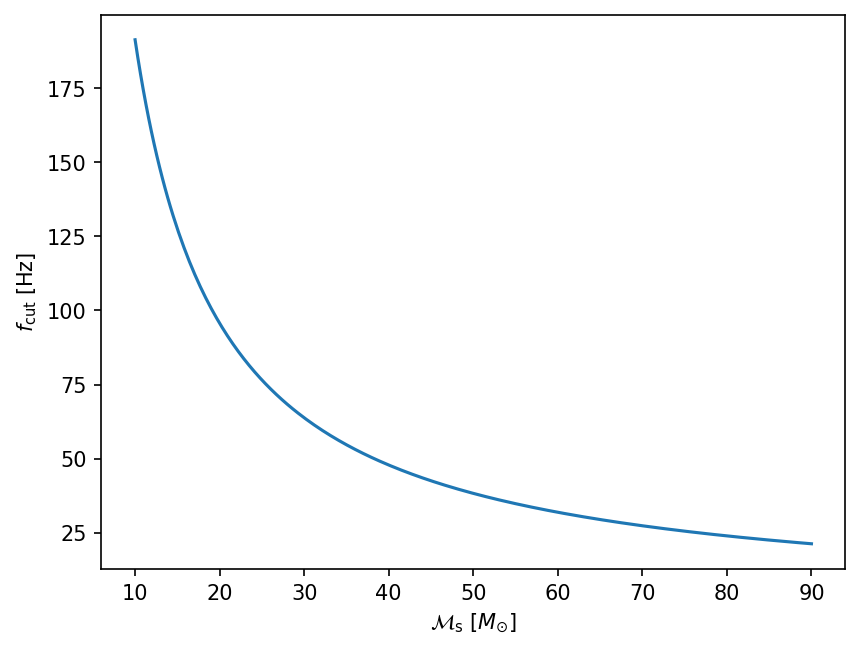

In [56]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

mcz_L_arr = np.linspace(10, 90, 250)

# plot f_cut vs mcz
f_cut_arr = np.array([get_fcut_from_mcz(mcz, lens_params["eta"]) for mcz in mcz_L_arr])
plt.plot(mcz_L_arr, f_cut_arr)
plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
plt.ylabel(r"$f_{\rm cut}$ [Hz]")

### using `mismatch_general` with resizing

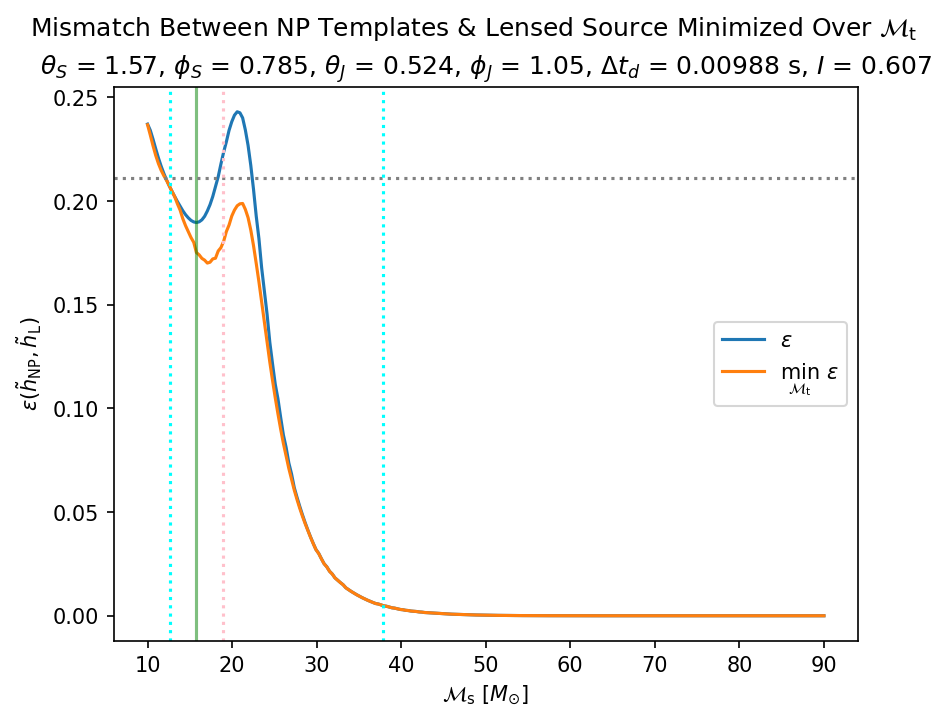

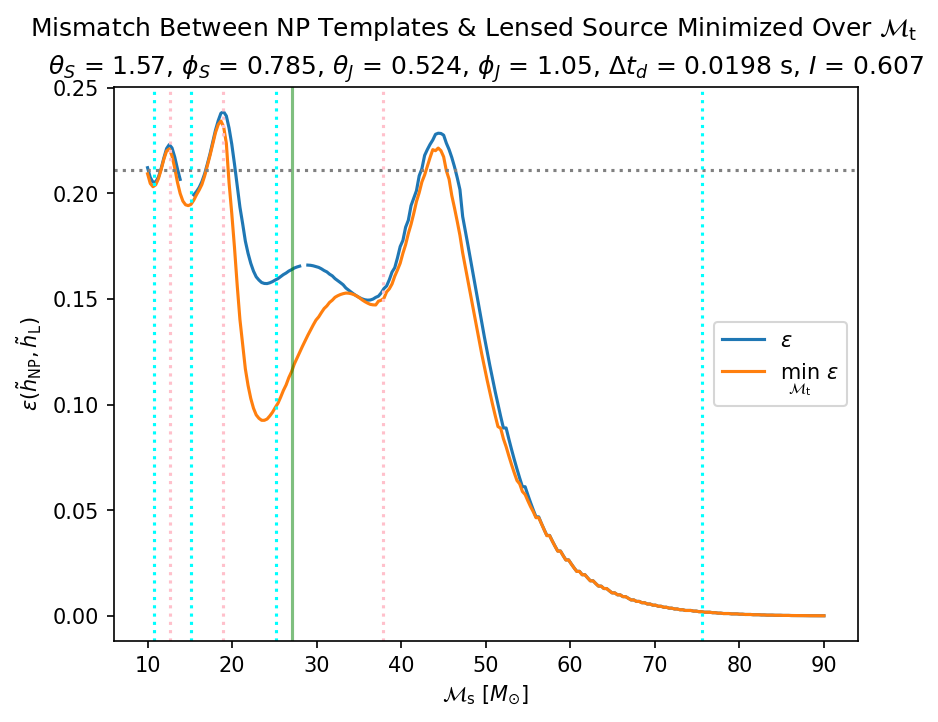

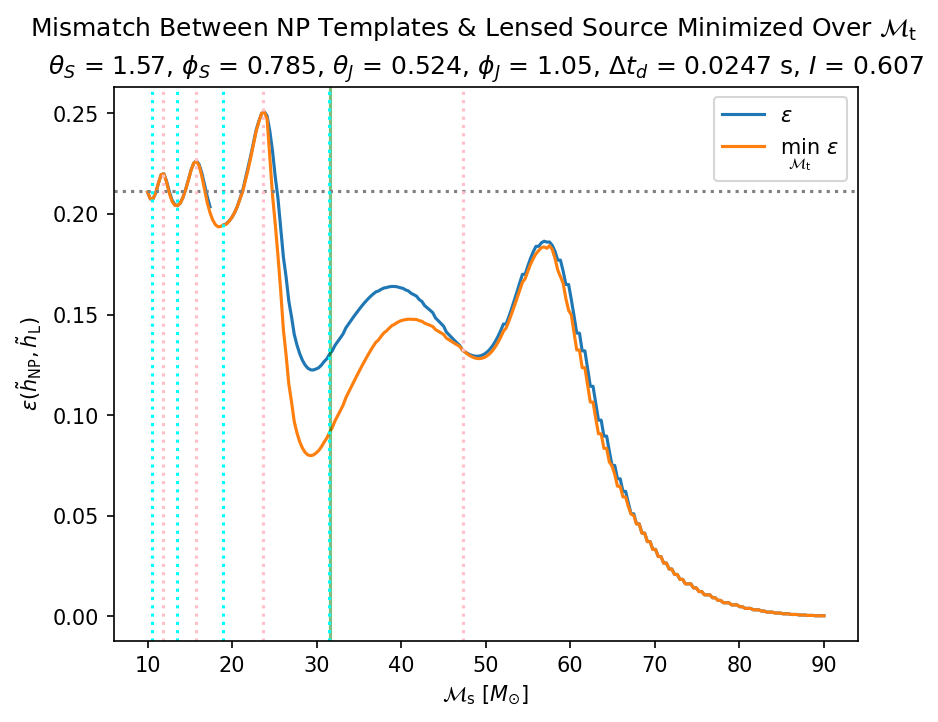

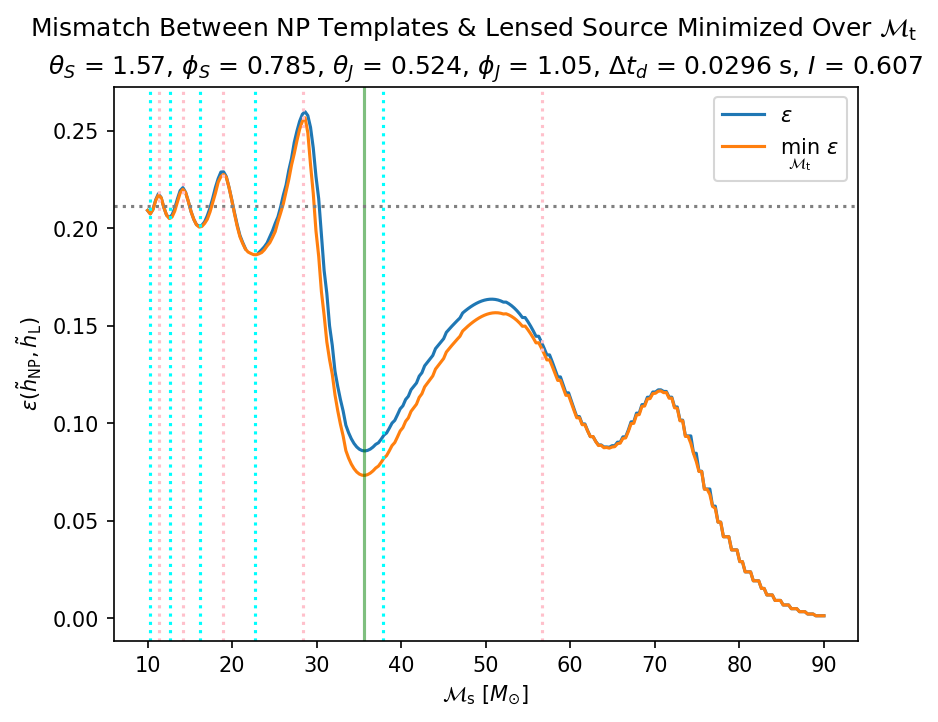

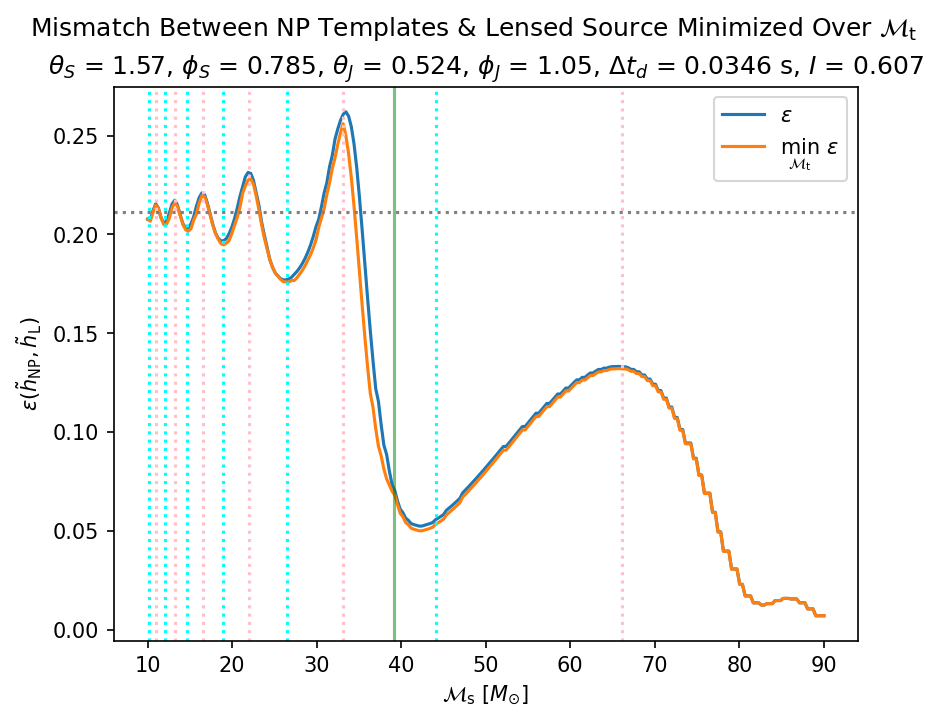

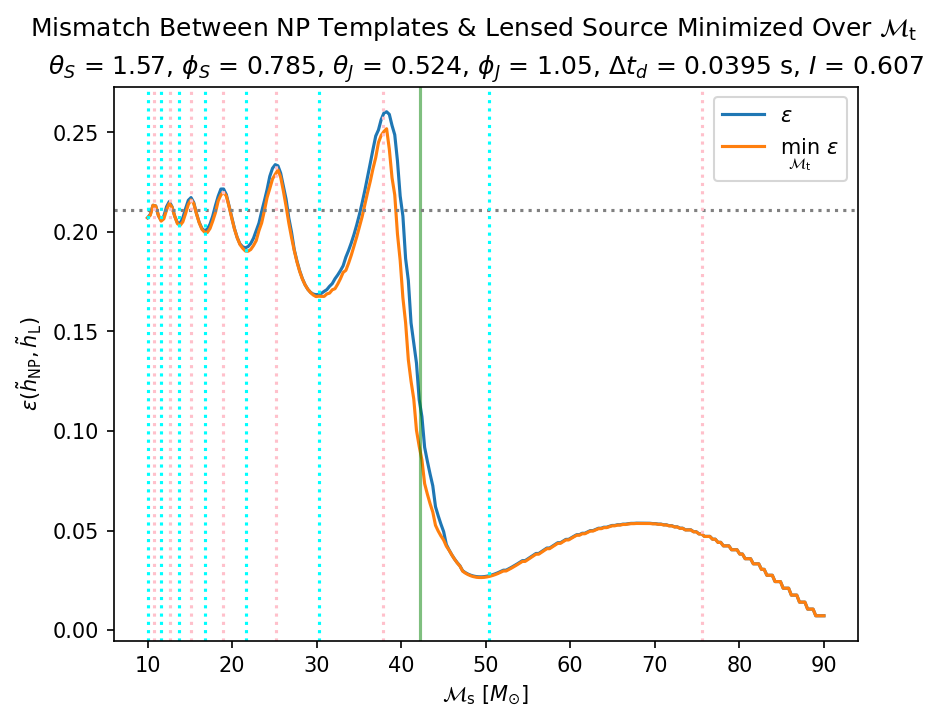

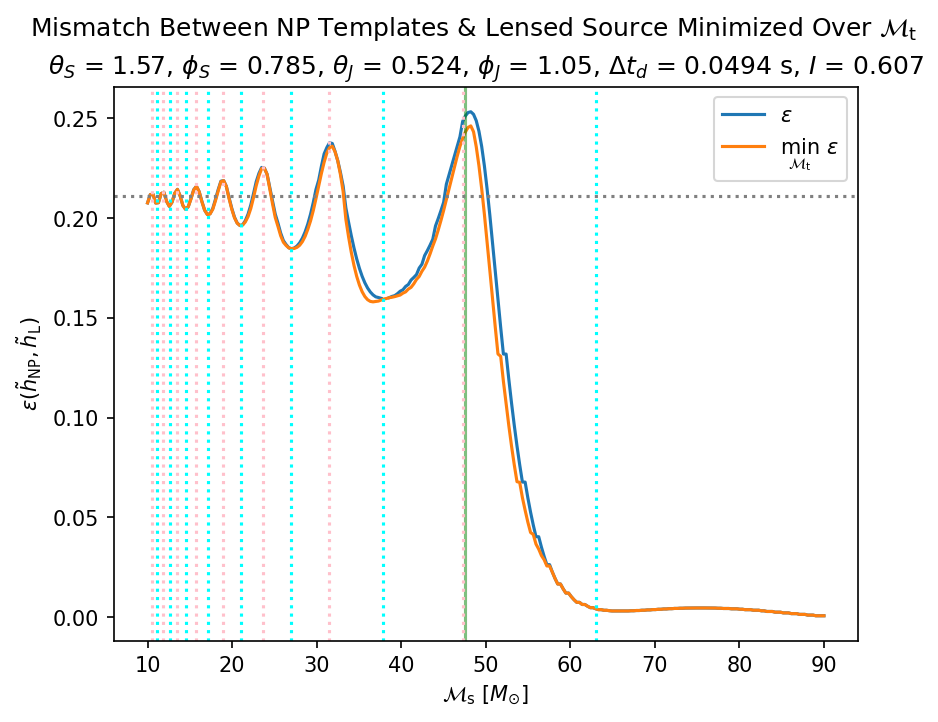

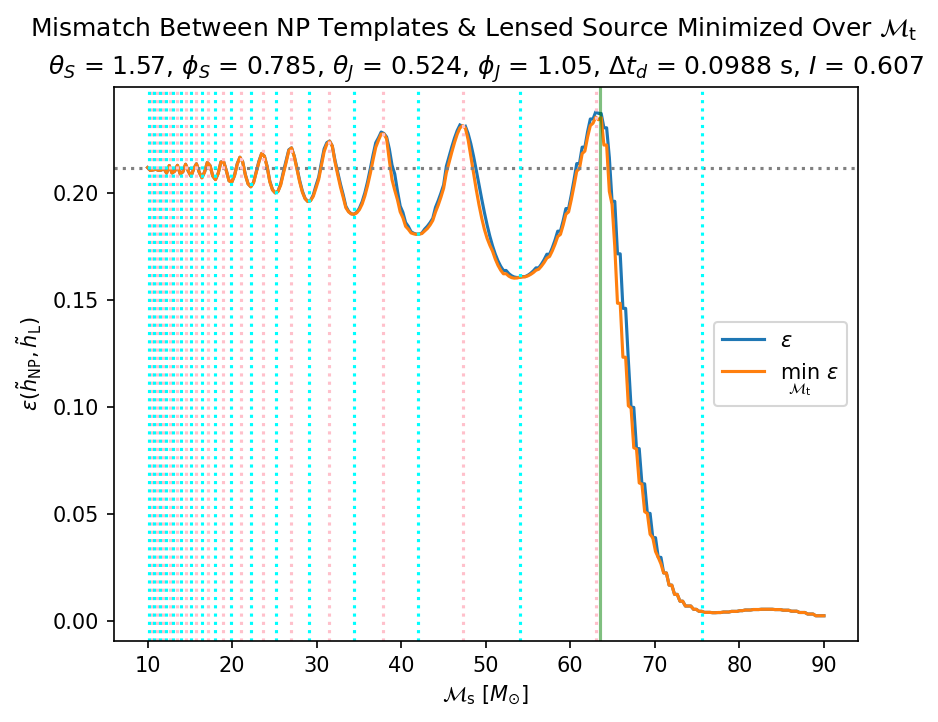

In [61]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

mcz_L_arr = np.linspace(10, 90, 250)
MLz_range = np.array([1e3, 2e3, 2500, 3e3, 3500, 4e3, 5e3, 1e4])
mismatch_plots_dict = {}

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    mismatch_plots_dict[MLz] = mismatch_plot_general(opt_match=True)
    predict_epsilon_critical_points(lens_params)
    plt.show()

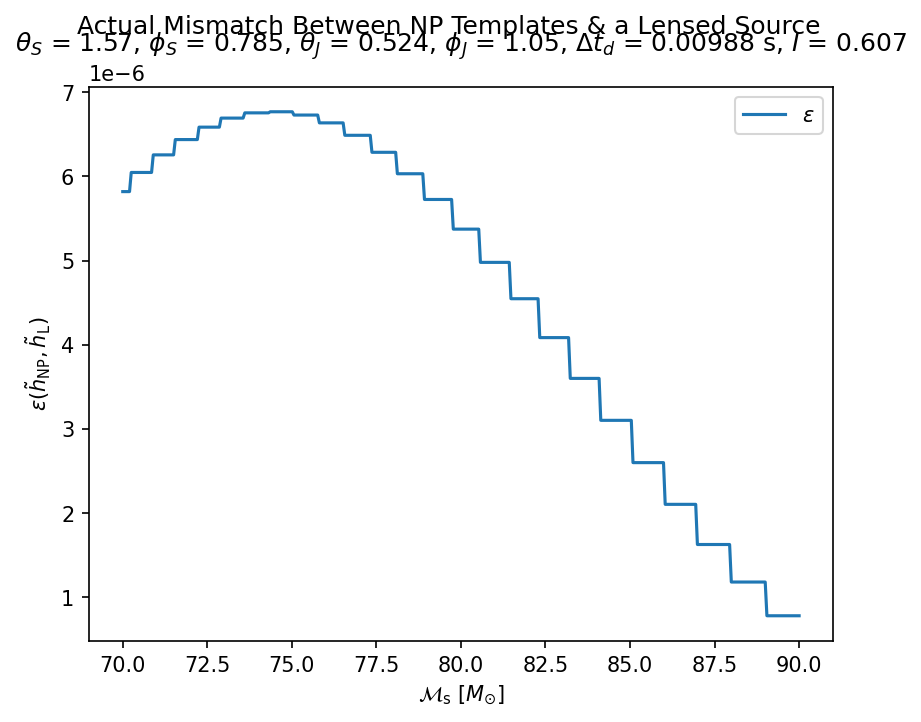

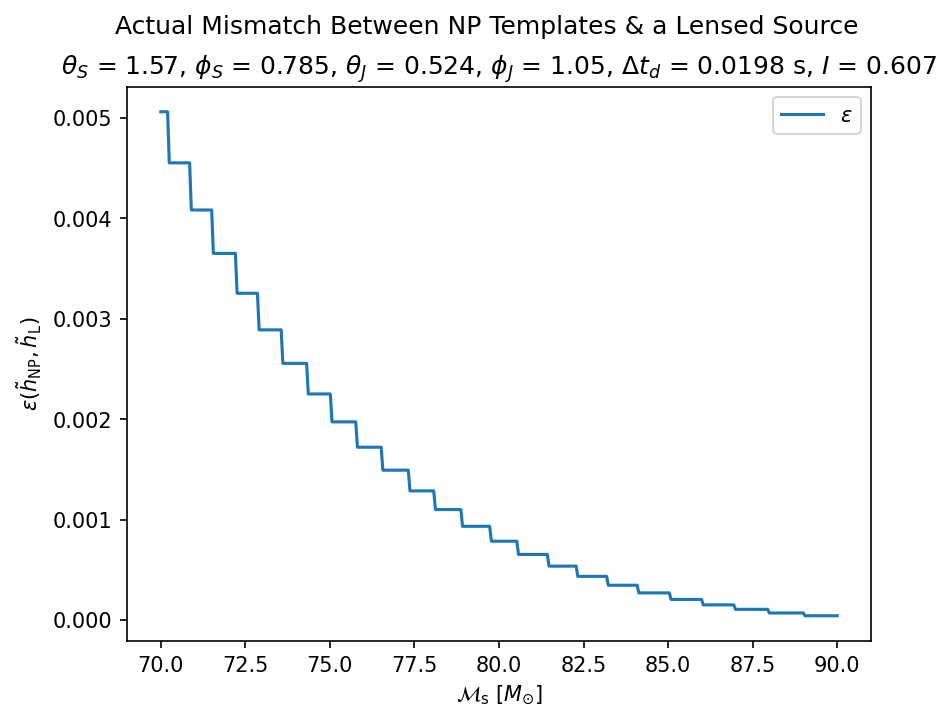

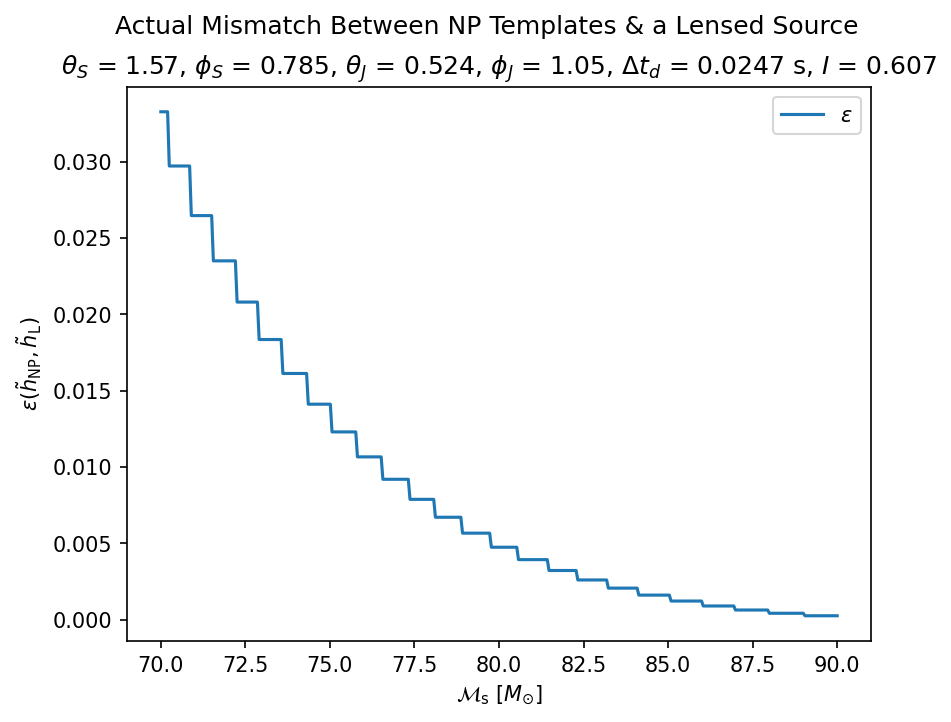

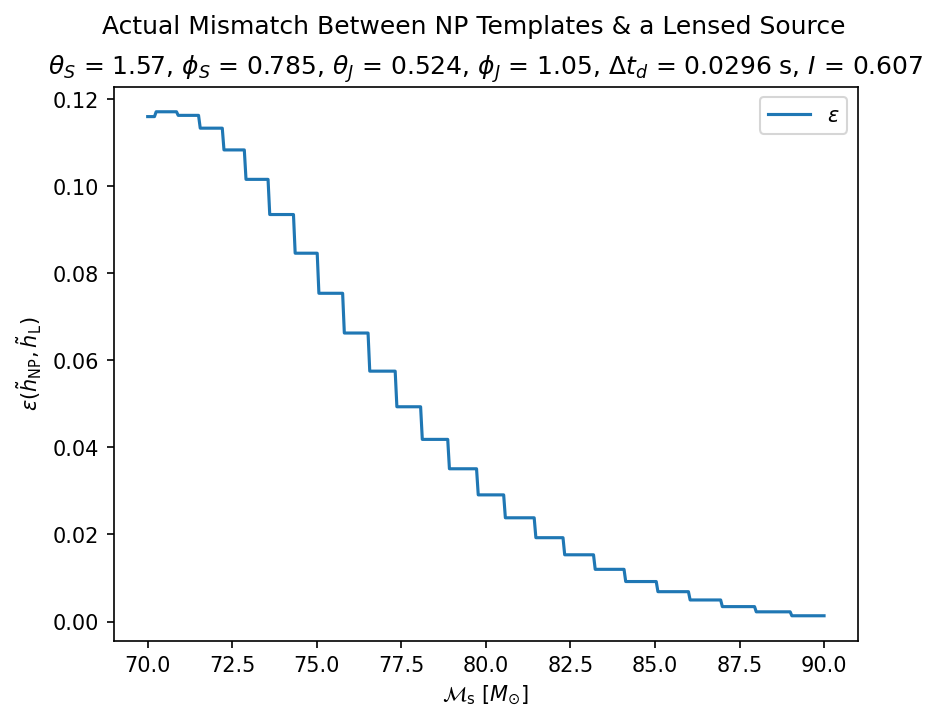

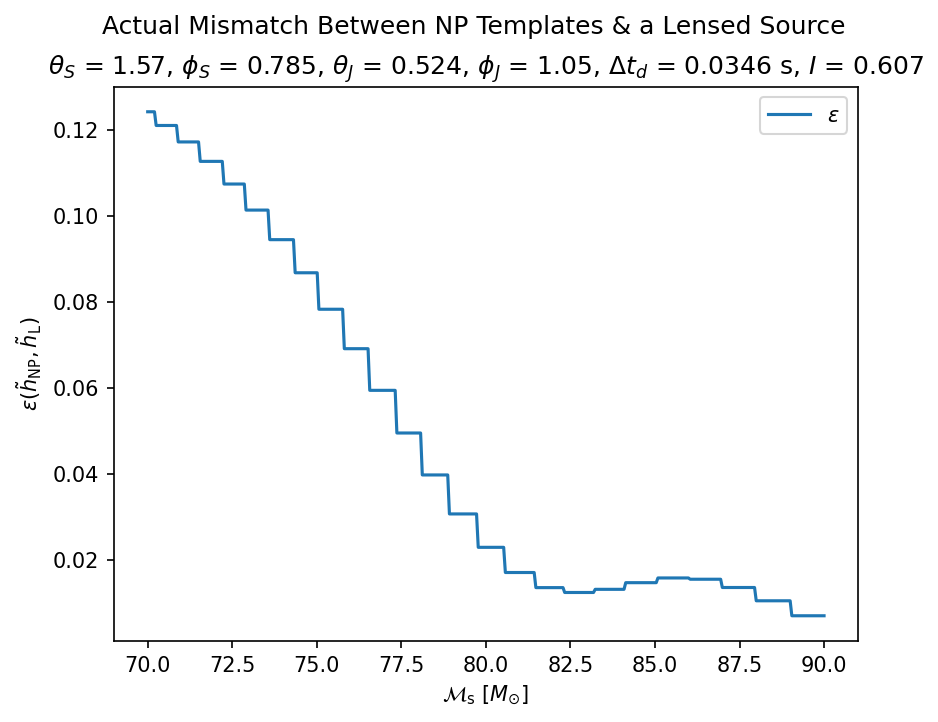

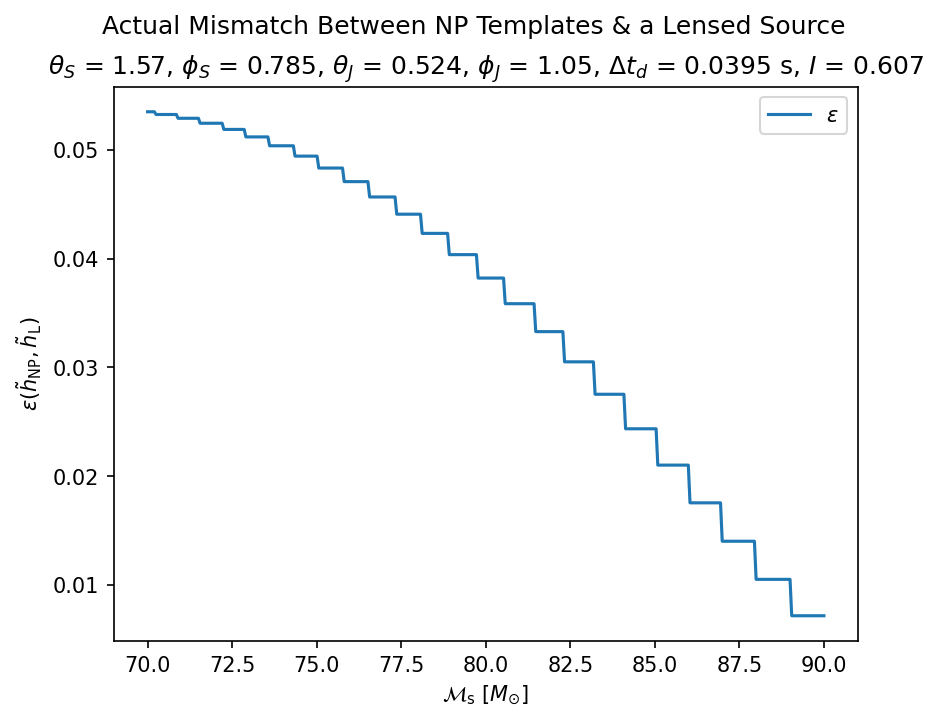

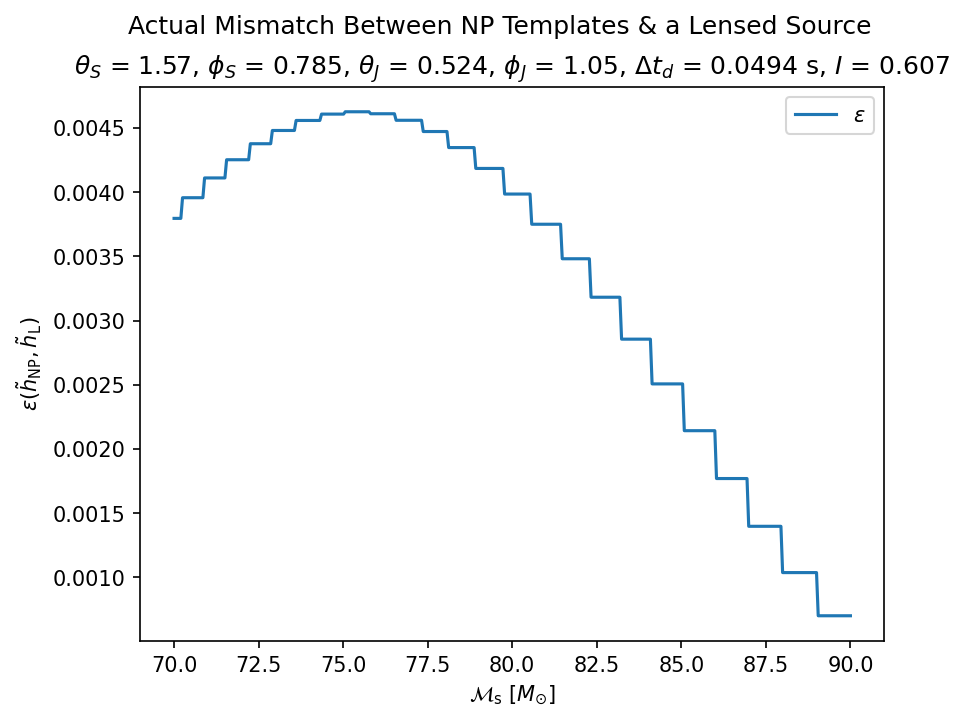

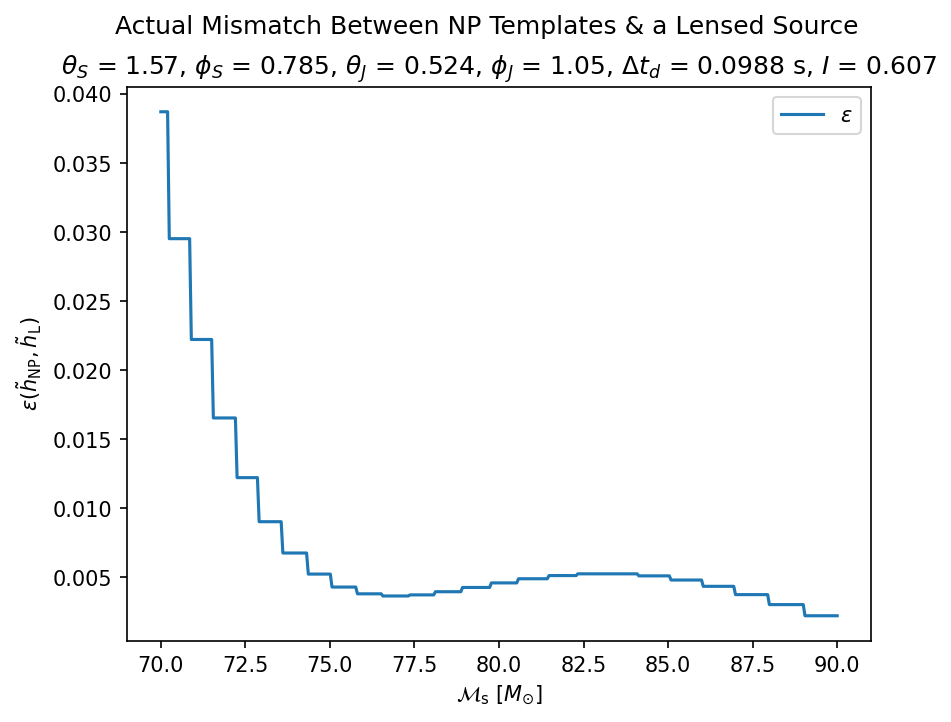

In [89]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

mcz_L_arr = np.linspace(70, 90, 200)
MLz_range = np.array([1e3, 2e3, 2500, 3e3, 3500, 4e3, 5e3, 1e4])
mismatch_plots_dict = {}

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    mismatch_plots_dict[MLz] = mismatch_plot_general_zoomed(opt_match=True)
    plt.show()

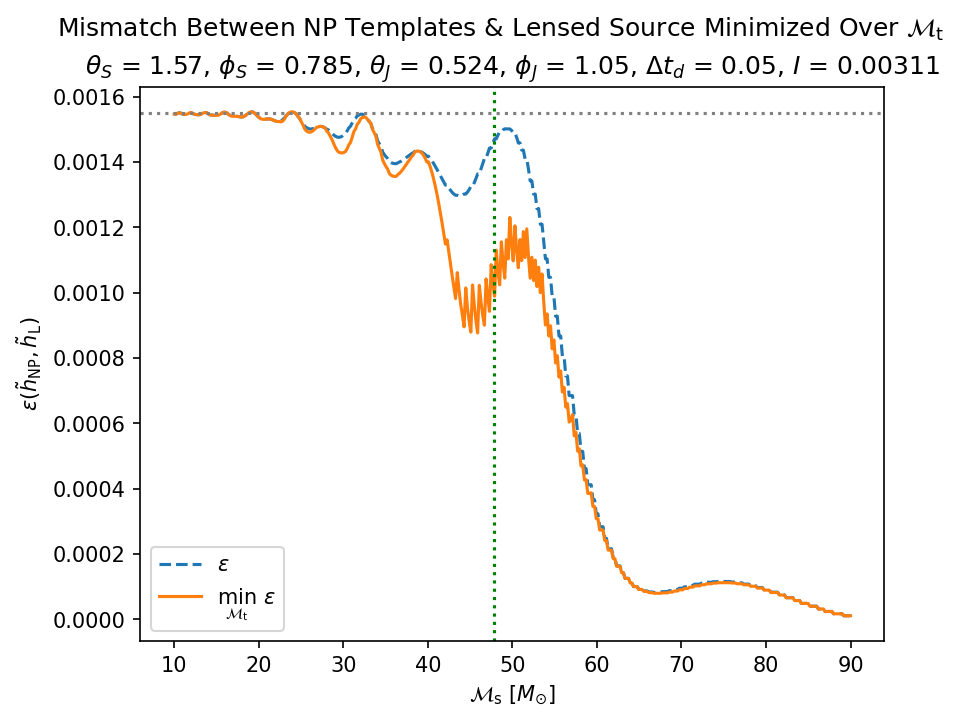

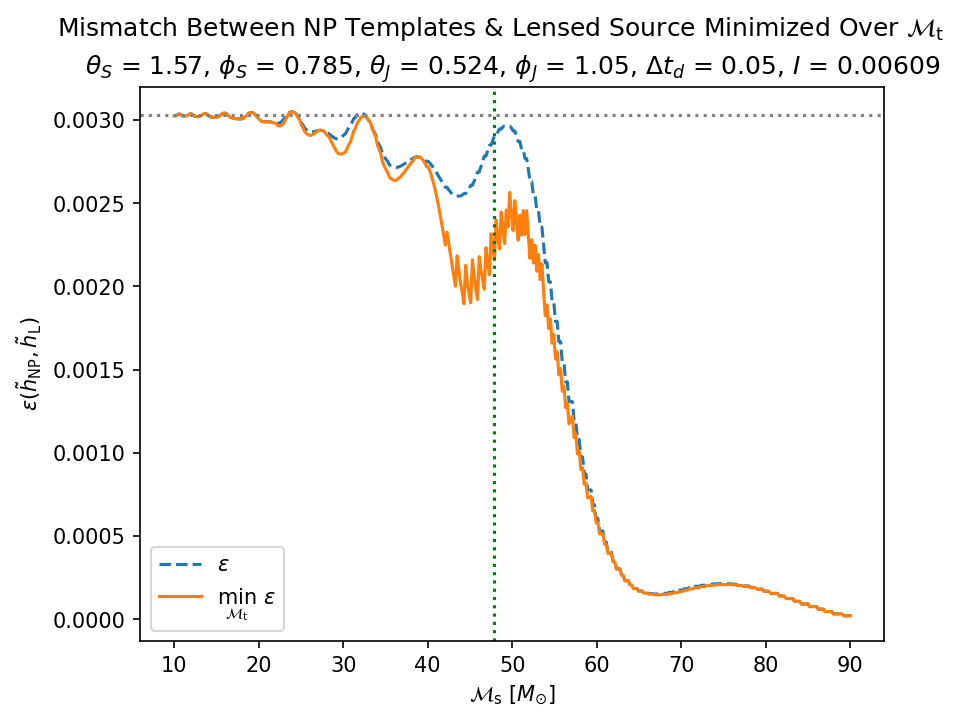

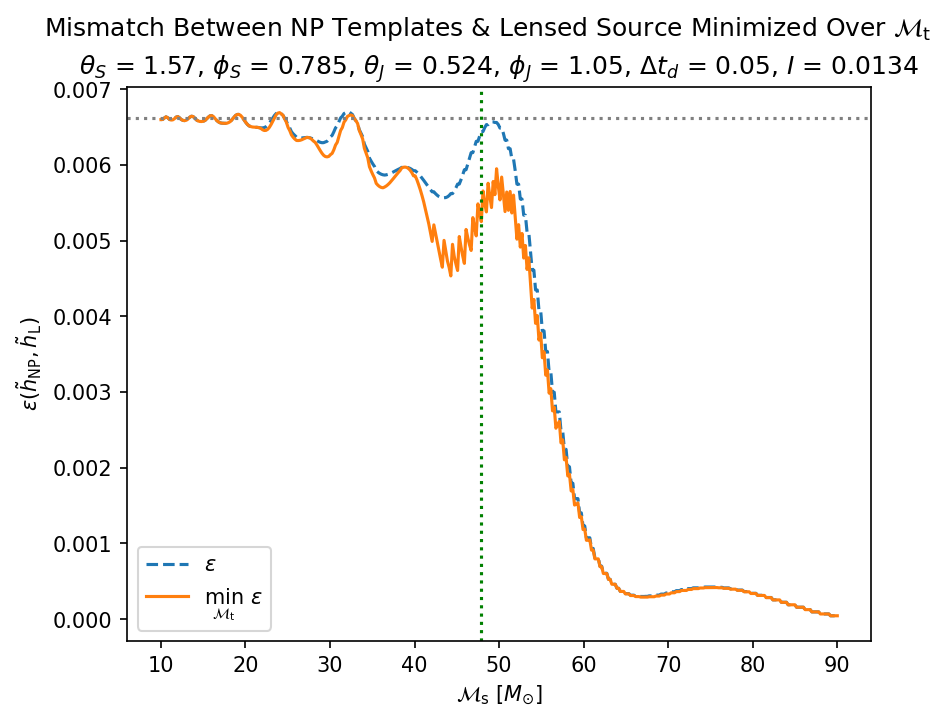

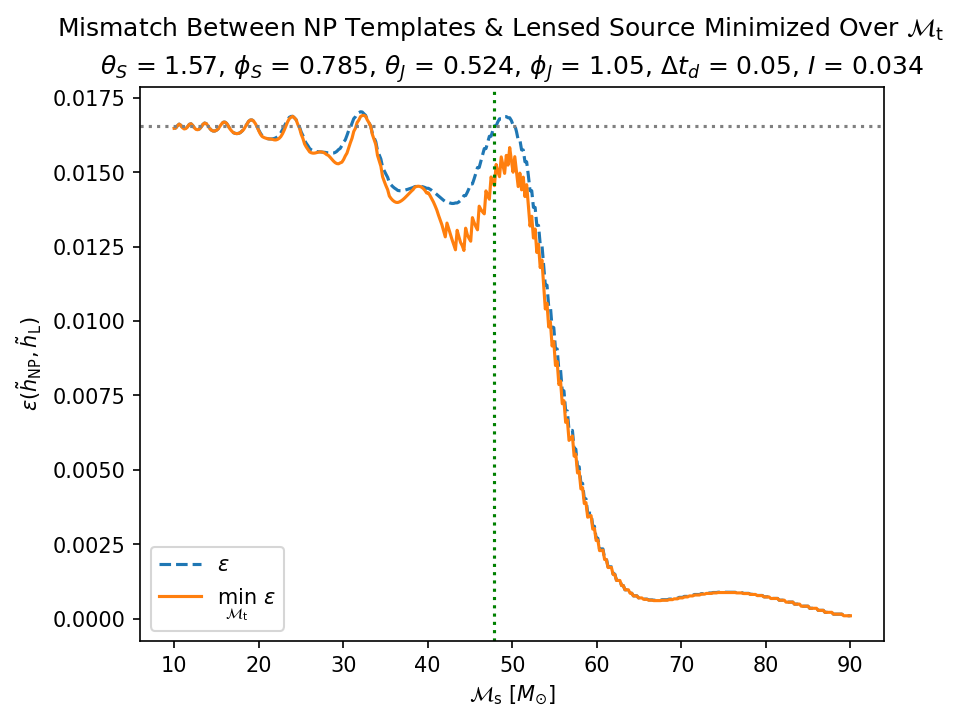

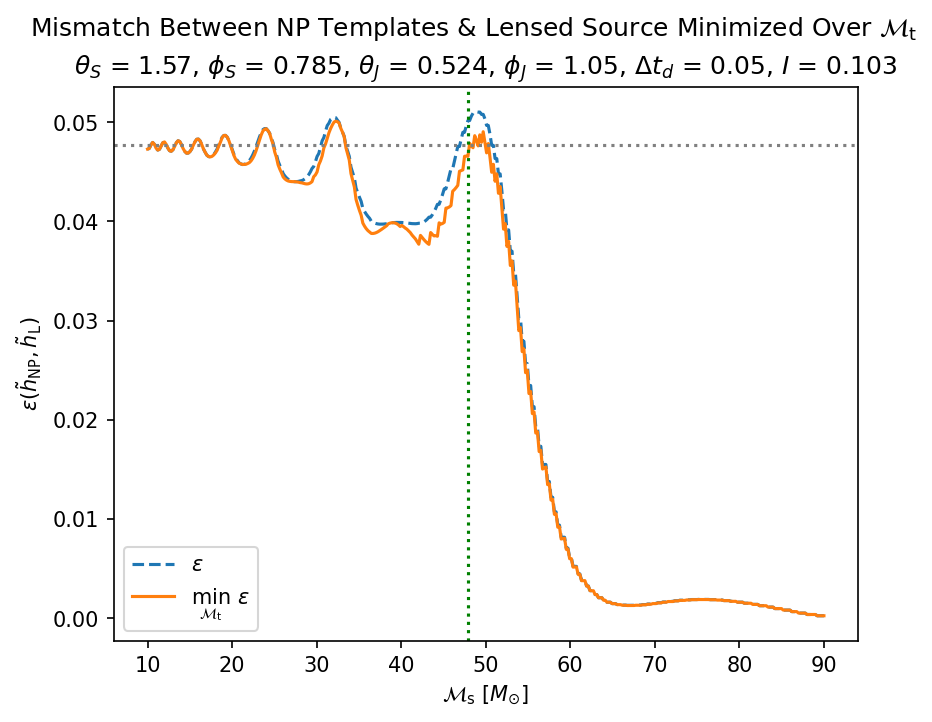

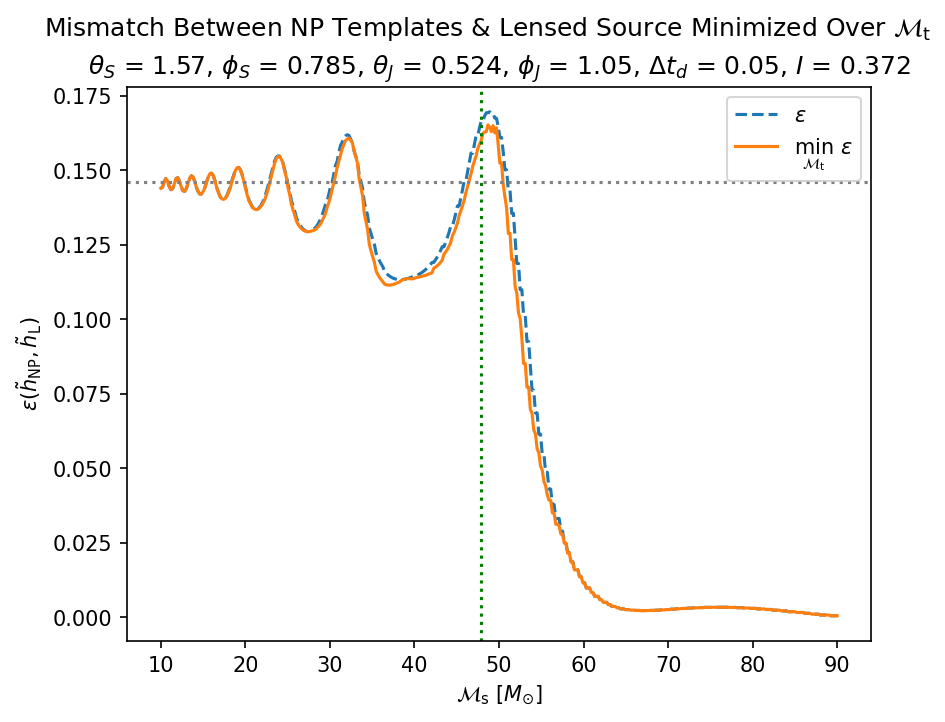

In [11]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

mcz_L_arr = np.linspace(10, 90, 250)

# create y_range and MLz_range based on the same time delay

y_range = np.linspace(0.5, 4, 6)
y_range = y_range[::-1]

time_delay = 0.05
MLz_range = get_MLz_from_time_delay(time_delay, y_range)

for i in range(len(MLz_range)):
    lens_params["y"] = y_range[i]
    lens_params["MLz"] = MLz_range[i] * solar_mass
    mismatch_plot_general(opt_match=True)
    plt.show()

### using `mismatch_general_psd` with flat psd

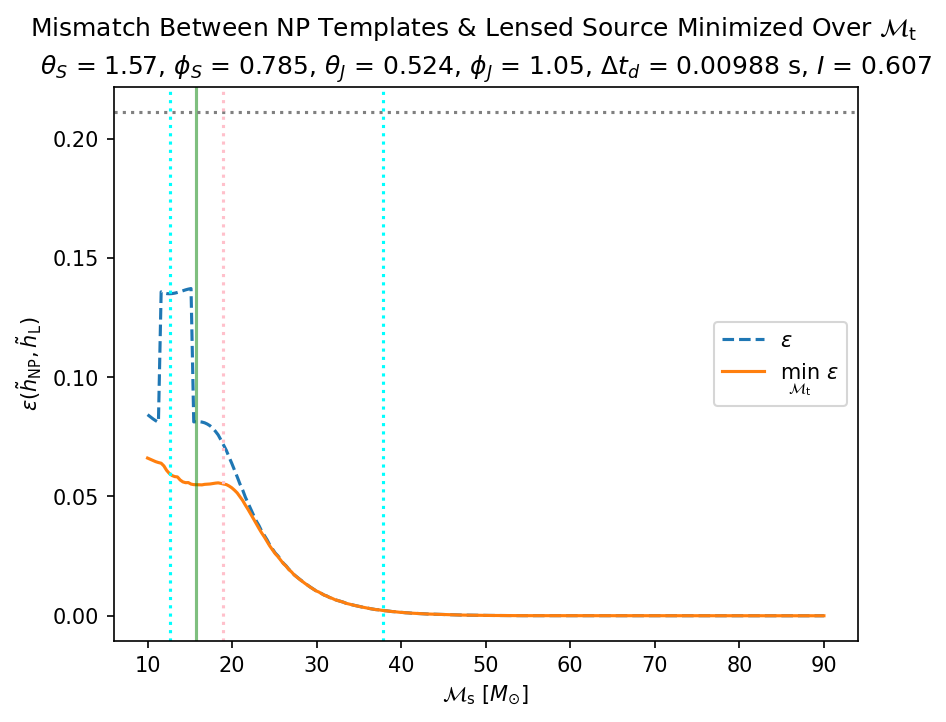

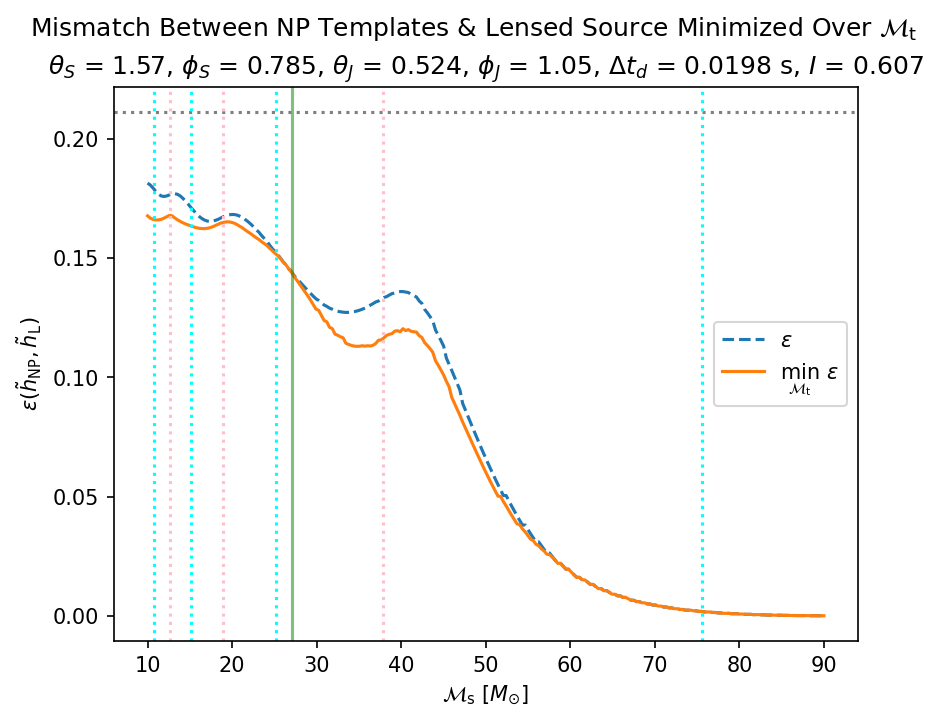

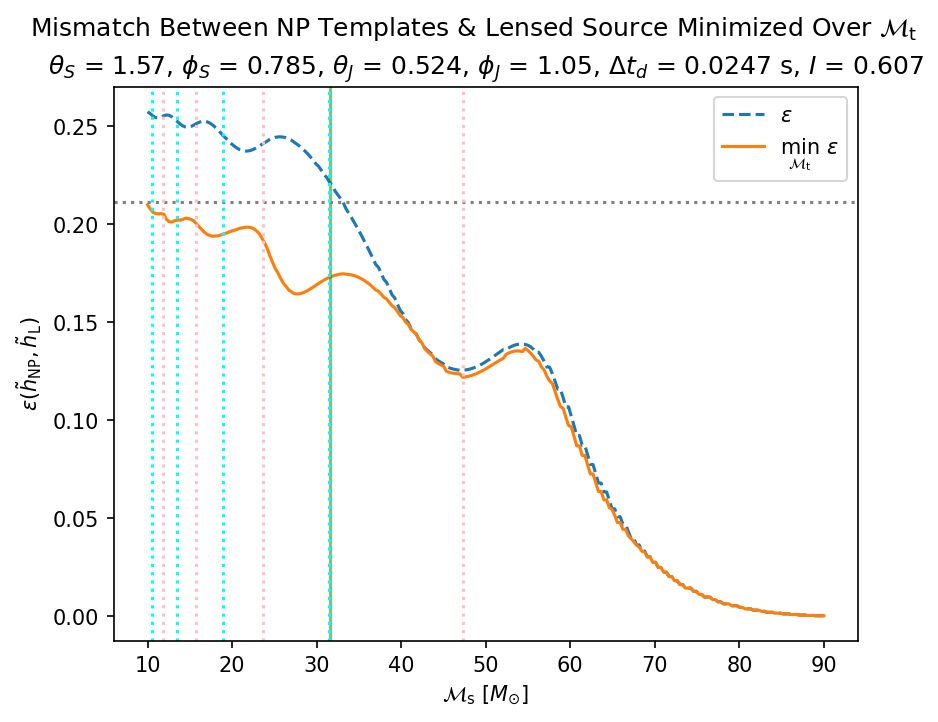

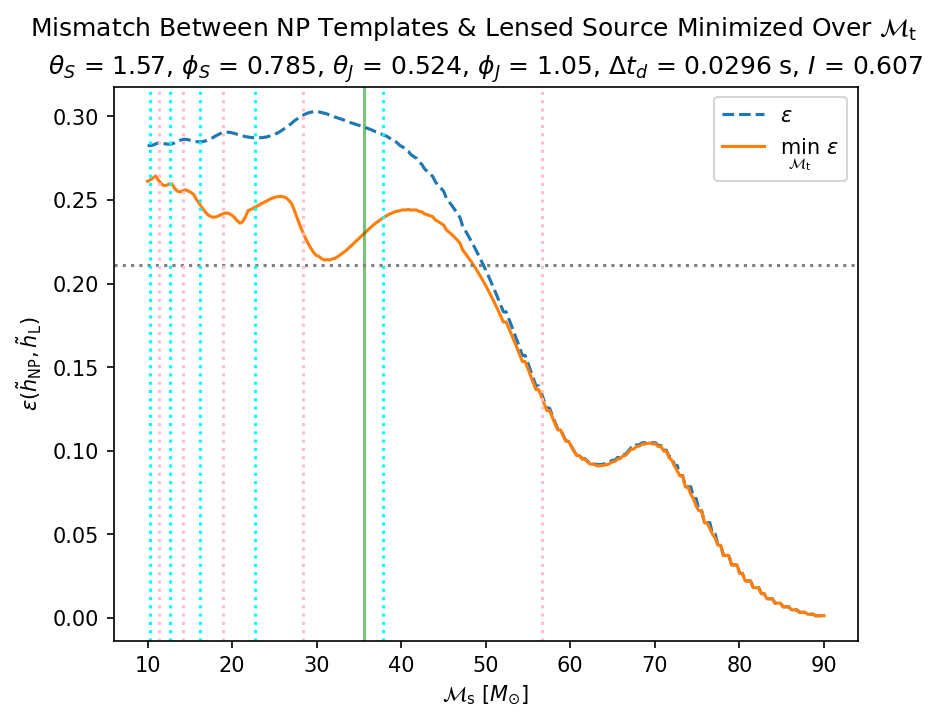

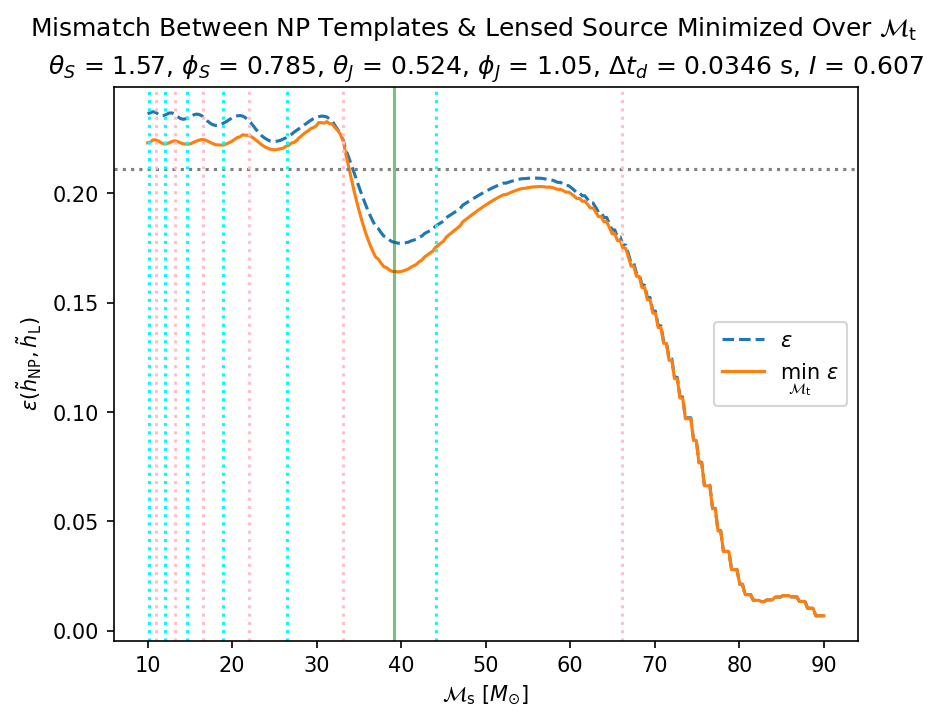

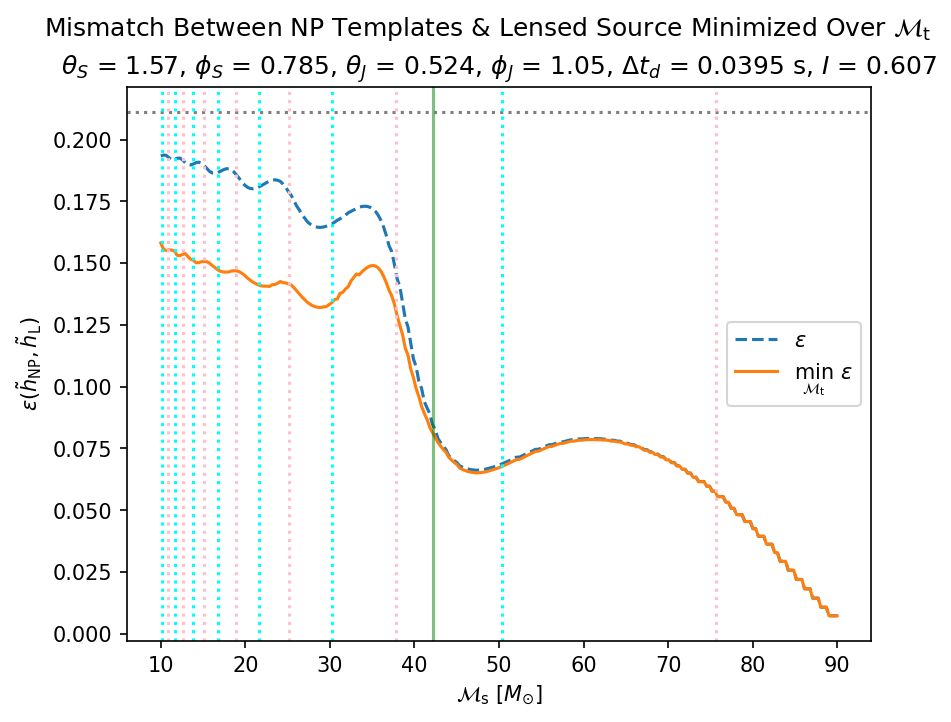

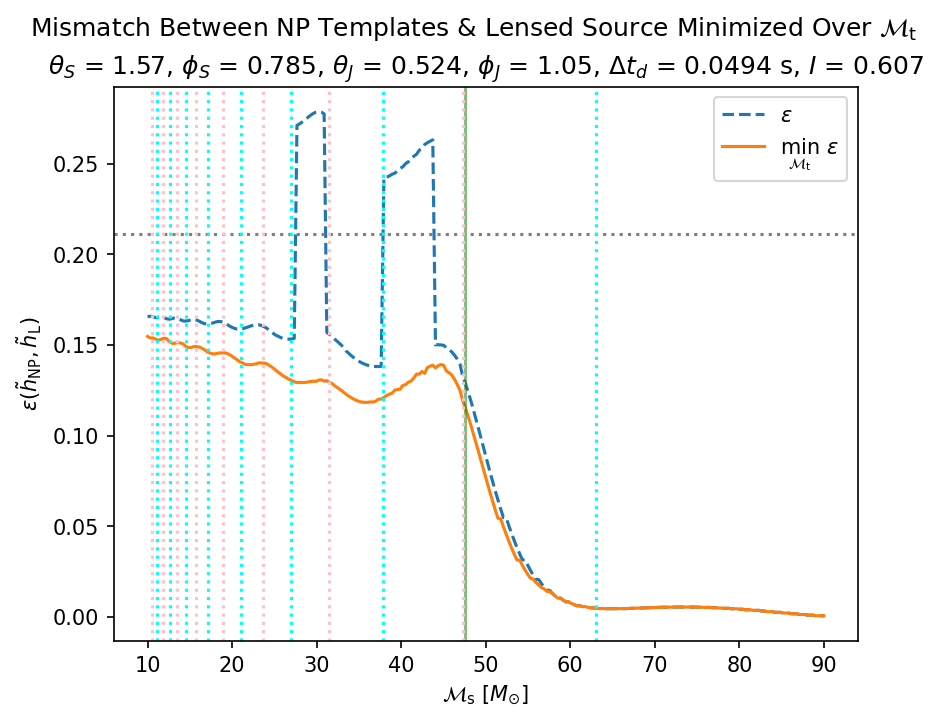

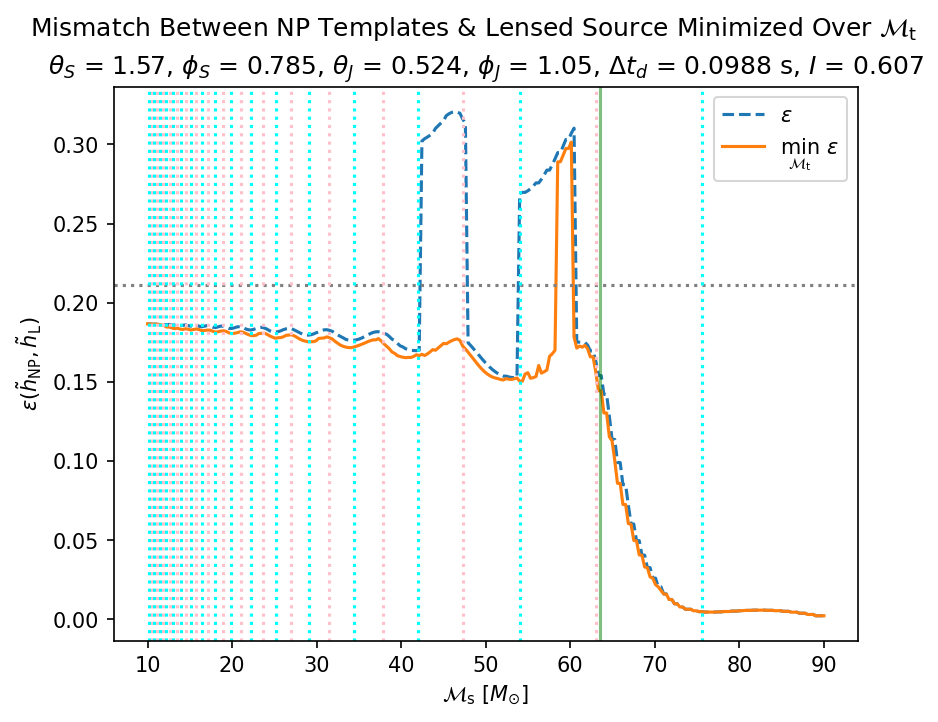

In [59]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

mcz_L_arr = np.linspace(10, 90, 250)
MLz_range = np.array([1e3, 2e3, 2500, 3e3, 3500, 4e3, 5e3, 1e4])
mismatch_plots_dict = {}

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    mismatch_plots_dict[MLz] = mismatch_plot_psd(opt_match=True)
    predict_epsilon_critical_points(lens_params)
    plt.show()

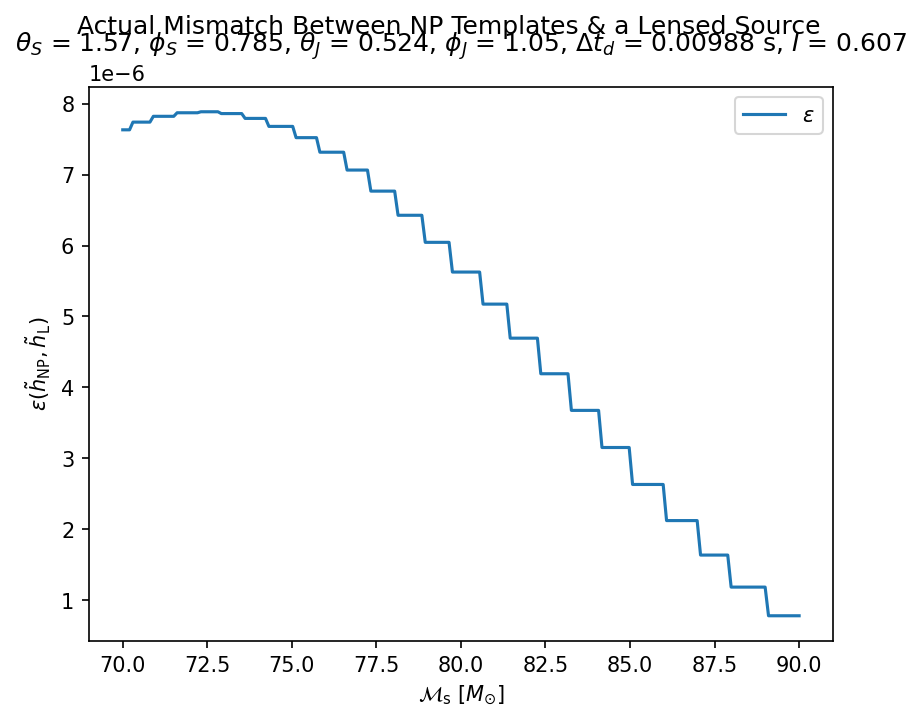

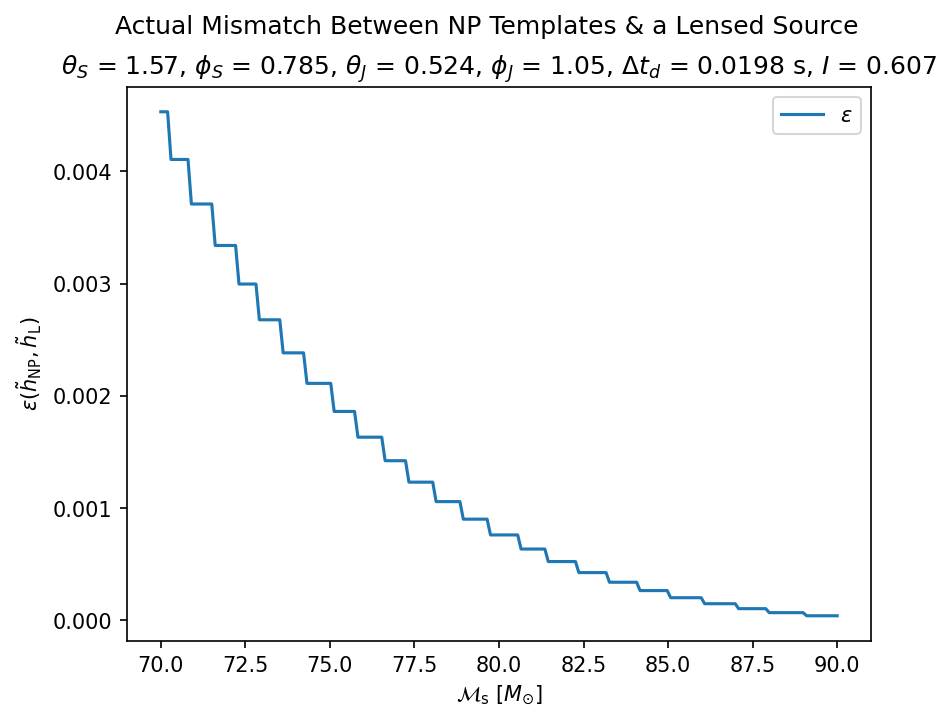

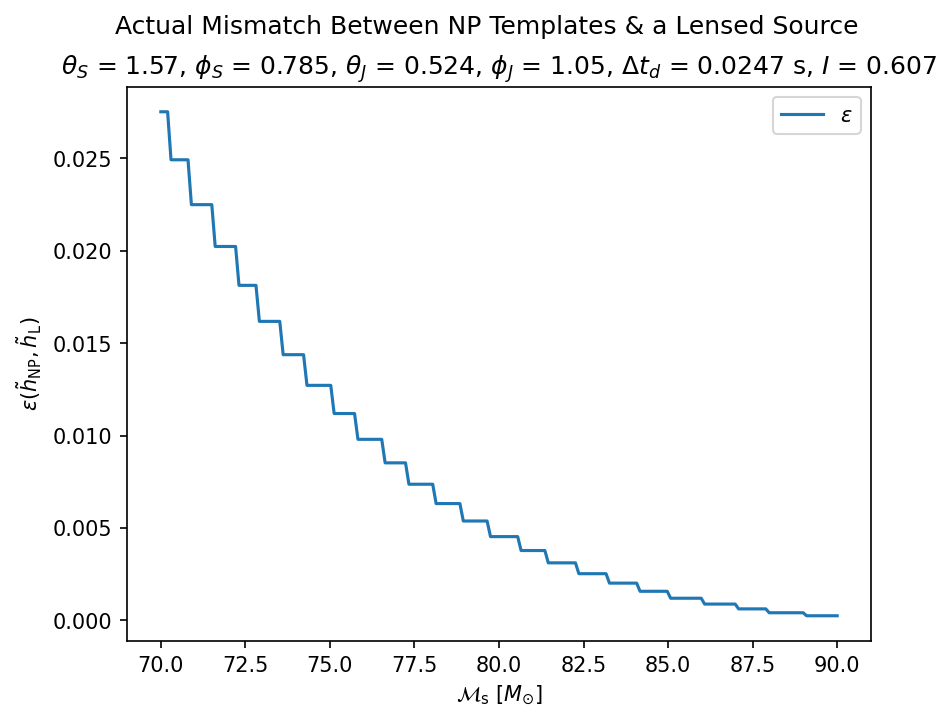

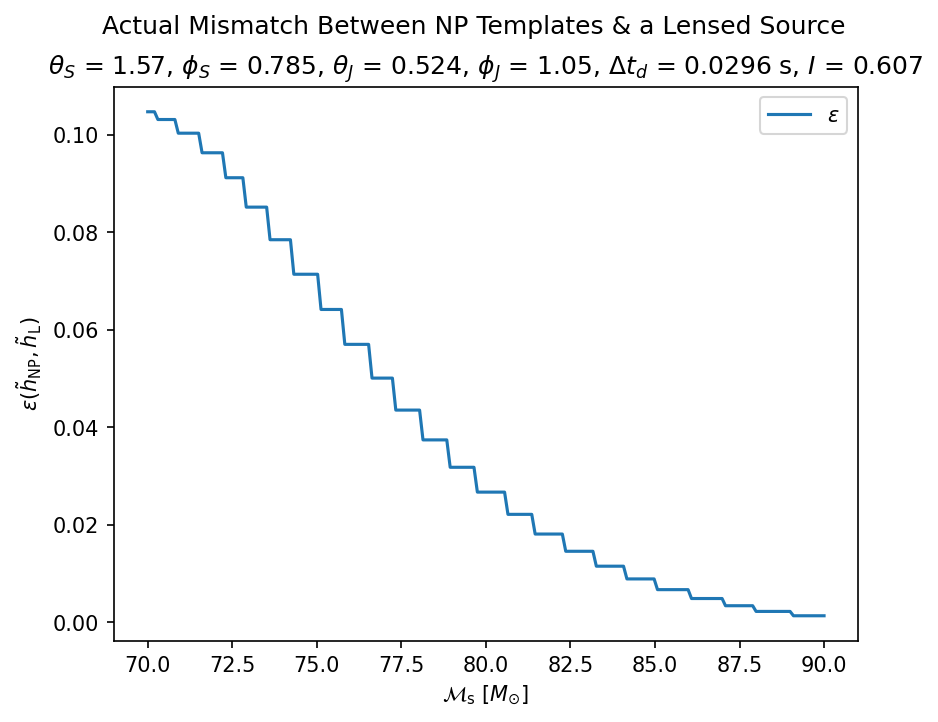

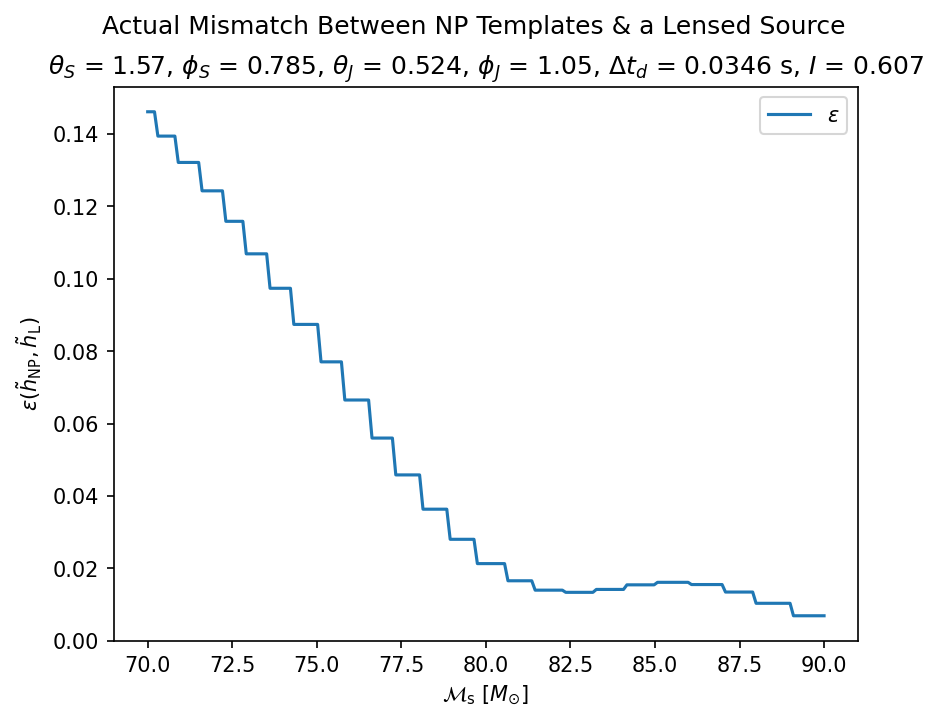

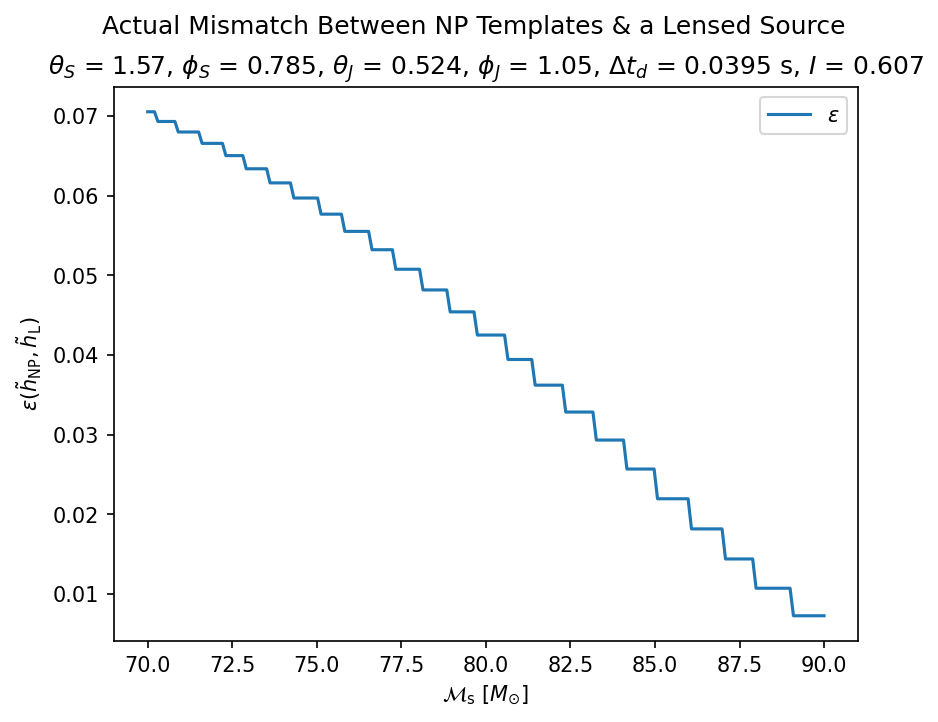

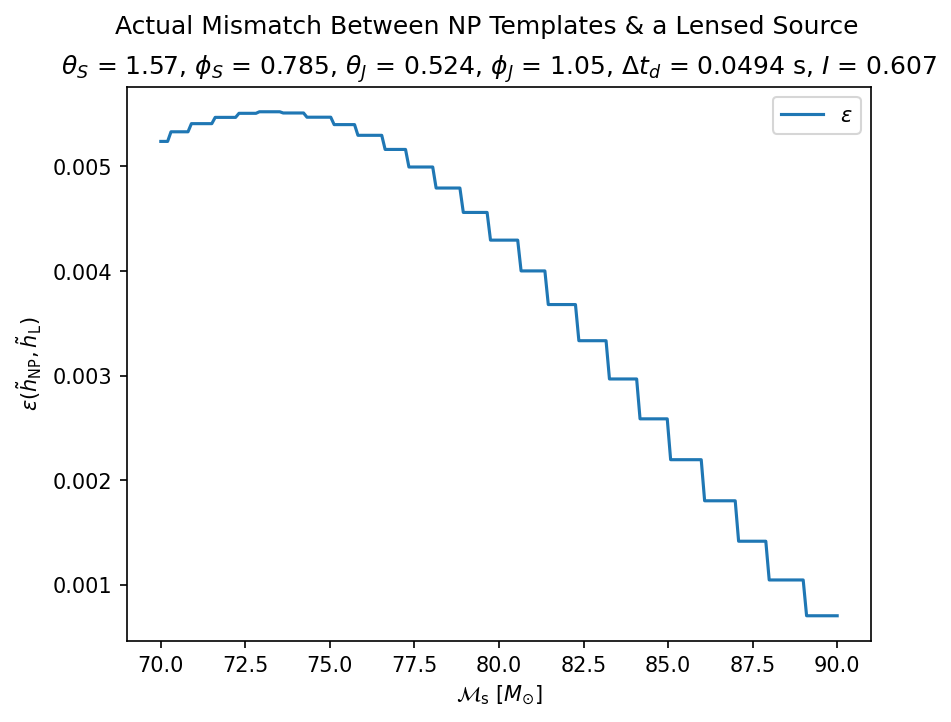

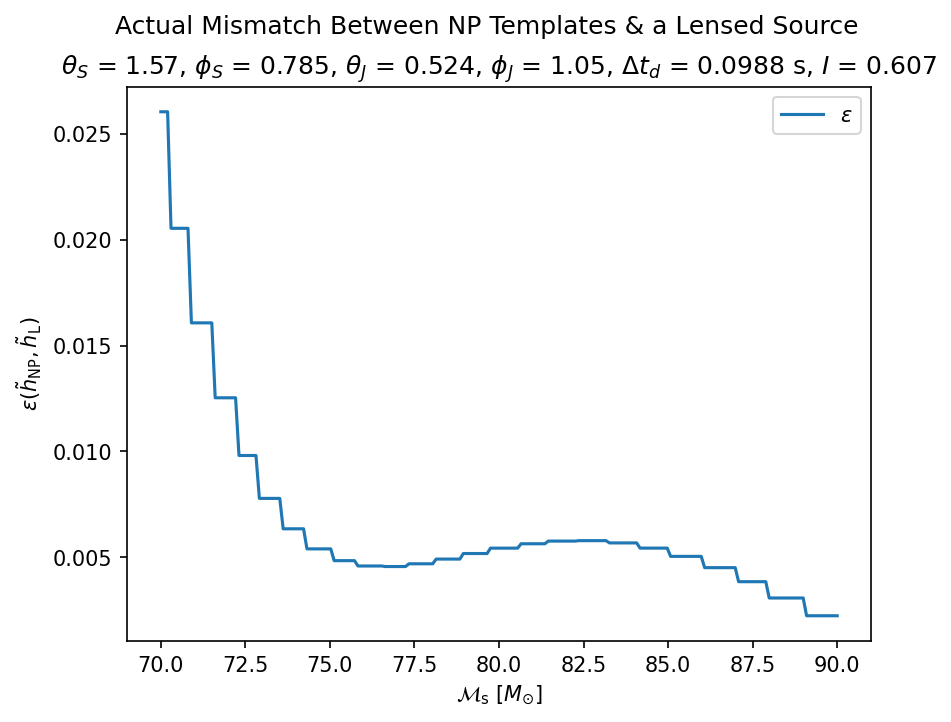

In [57]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

mcz_L_arr = np.linspace(70, 90, 200)
MLz_range = np.array([1e3, 2e3, 2500, 3e3, 3500, 4e3, 5e3, 1e4])
mismatch_plots_dict = {}

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    mismatch_plots_dict[MLz] = mismatch_plot_psd_zoomed(opt_match=True)
    plt.show()

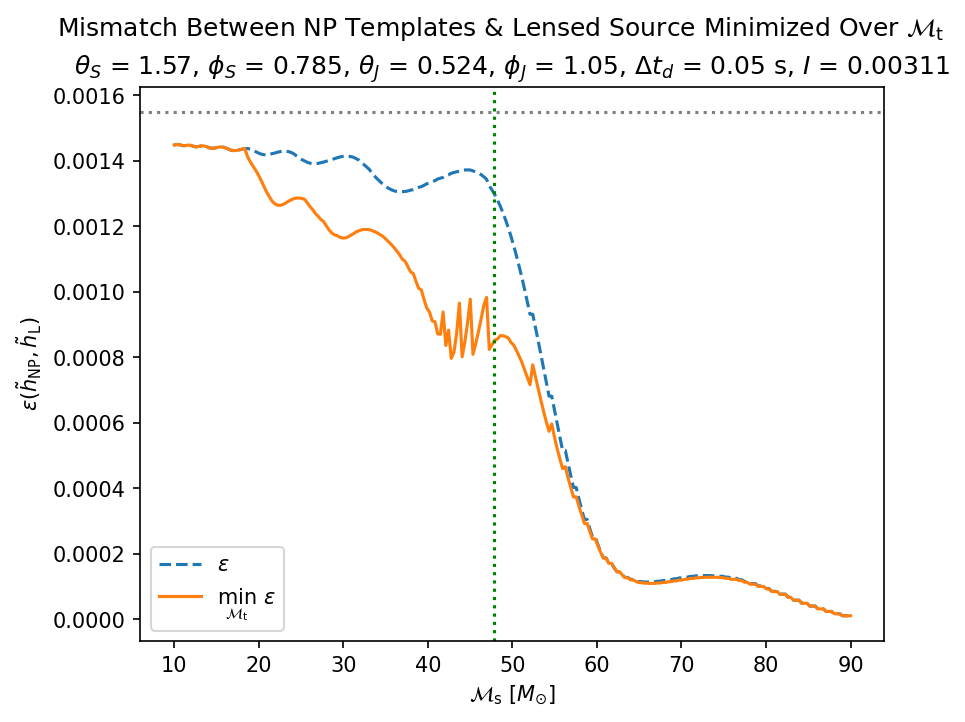

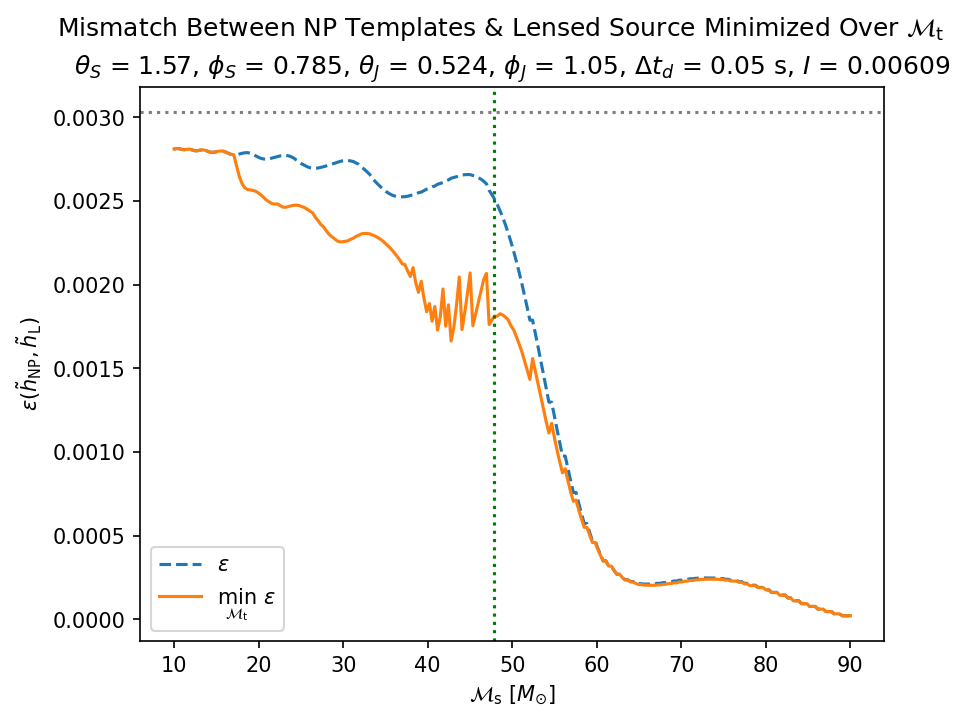

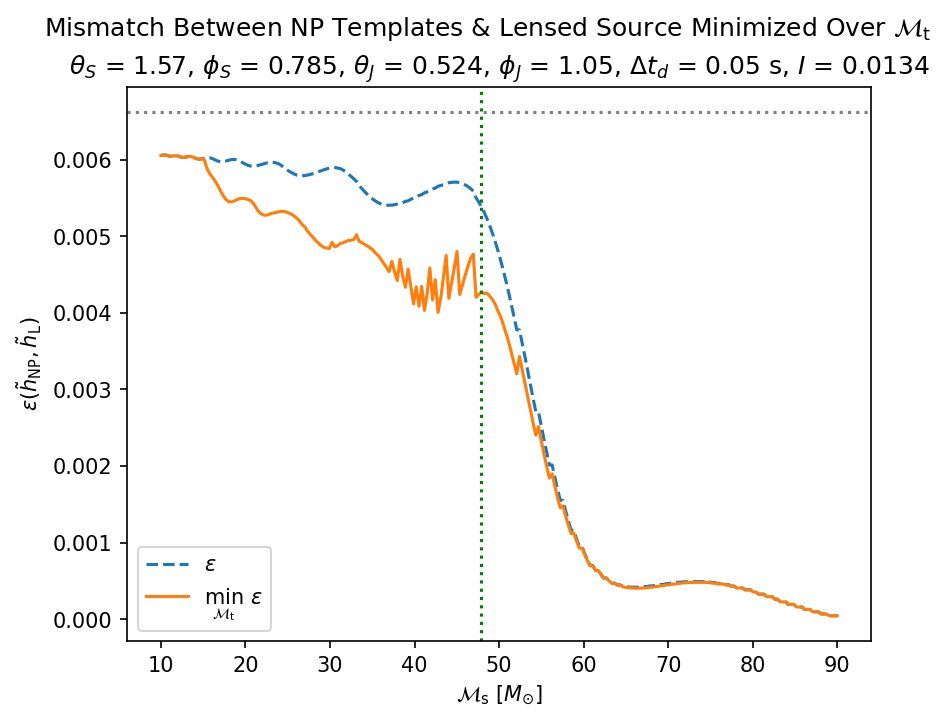

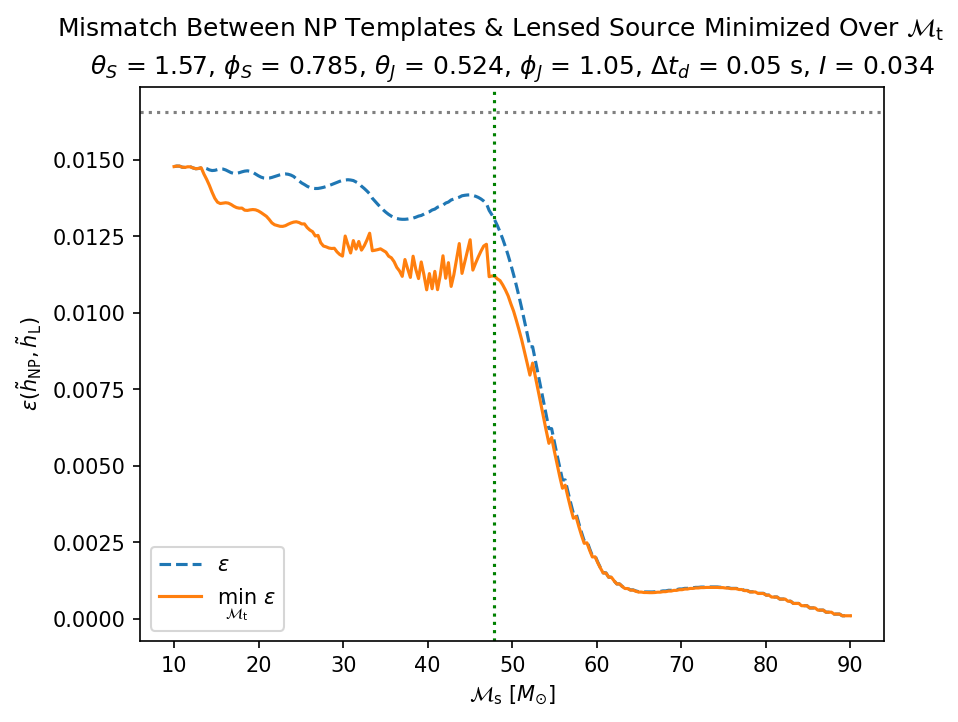

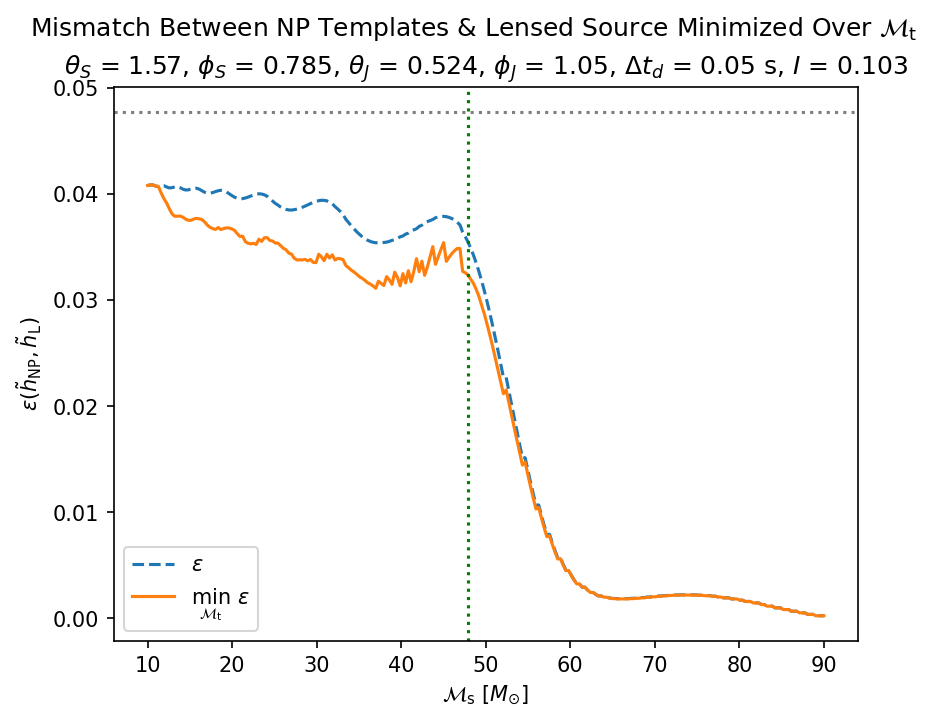

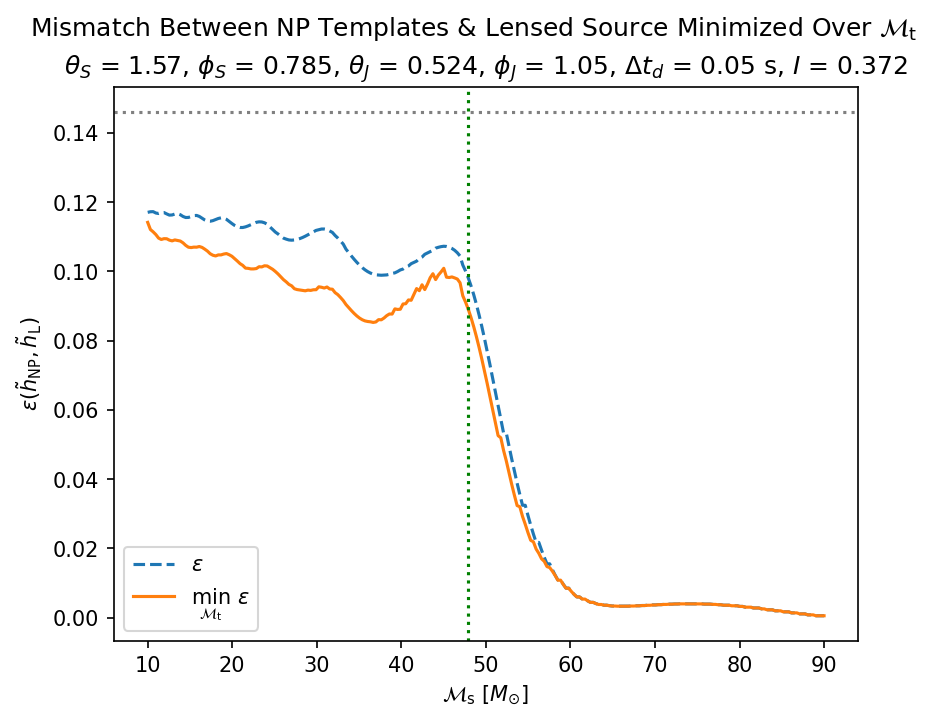

In [9]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

mcz_L_arr = np.linspace(10, 90, 250)

# create y_range and MLz_range based on the same time delay

y_range = np.linspace(0.5, 4, 6)
y_range = y_range[::-1]

time_delay = 0.05
MLz_range = get_MLz_from_time_delay(time_delay, y_range)

for i in range(len(MLz_range)):
    lens_params["y"] = y_range[i]
    lens_params["MLz"] = MLz_range[i] * solar_mass
    mismatch_plot_psd(opt_match=True)
    plt.show()

# analytically analyze mismatch between NP templates and Lensed source

## testing plots for complex values

/opt/homebrew/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/homebrew/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


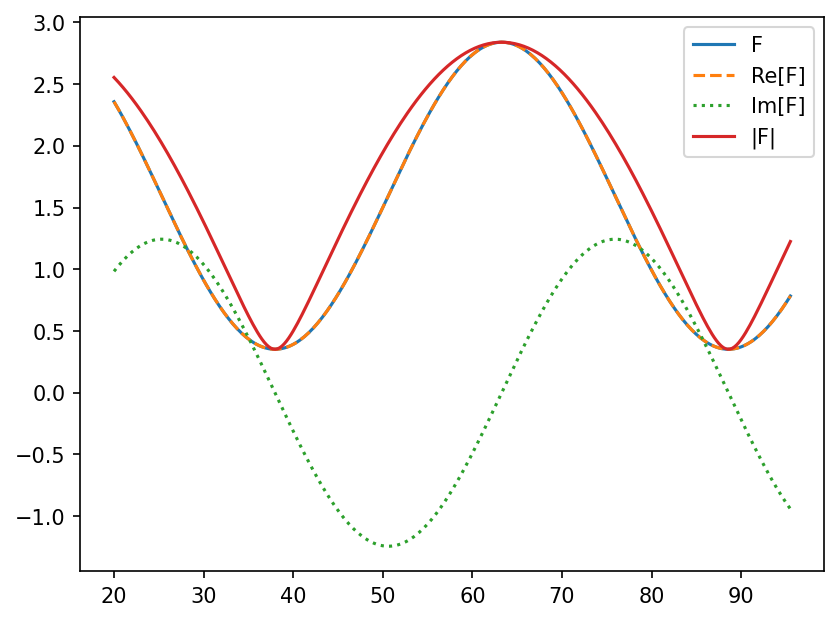

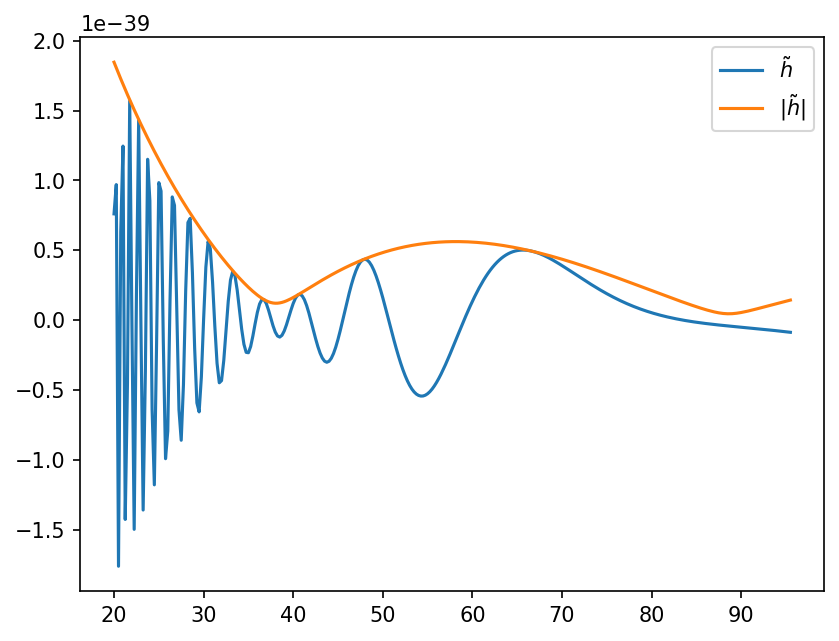

In [45]:
lens_params = lens_params_1.copy()

lens_inst = LensingGeo(lens_params)
f_cut = lens_inst.f_cut()
f_range = np.arange(20, f_cut, 0.25)
F = lens_inst.F(f_range)
lensed_strain = lens_inst.strain(f_range)

plt.plot(f_range, F, label="F")  # basically the real part of F
plt.plot(f_range, F.real, label="Re[F]", ls="--")
plt.plot(f_range, F.imag, label="Im[F]", ls=":")
plt.plot(f_range, np.abs(F), label="|F|")
plt.legend()
plt.show()

plt.plot(f_range, lensed_strain, label=r"$\~h$")
plt.plot(f_range, np.abs(lensed_strain), label=r"$|\~h|$")
plt.legend()
plt.show()

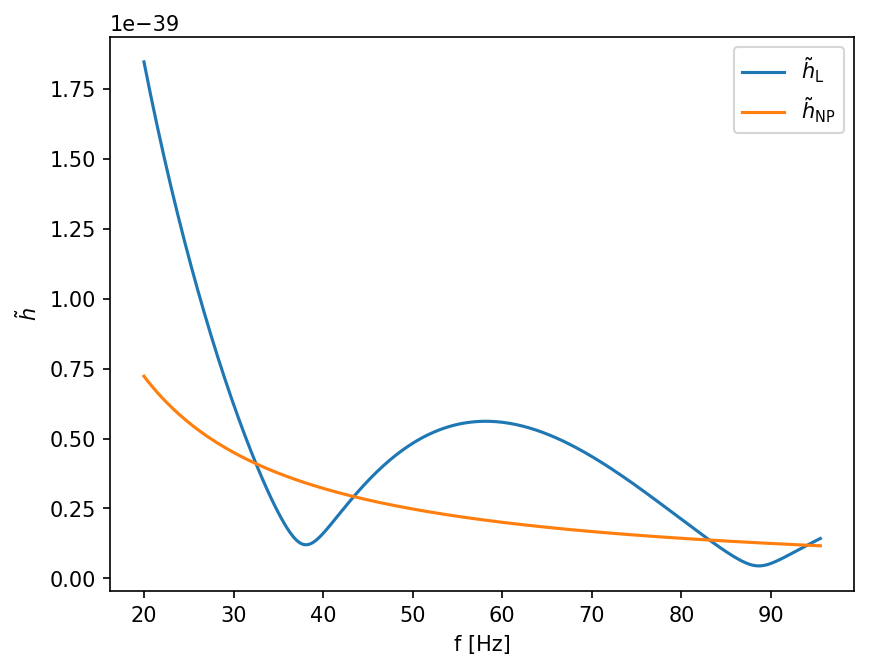

In [62]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

h_L = get_gw(lens_params)["waveform"]
h_NP = get_gw(NP_params)["waveform"]
f_range = get_gw(lens_params)["f_range"]

plt.plot(f_range, np.abs(h_L), label=r"$\~h_{\rm L}$")
plt.plot(f_range, np.abs(h_NP), label=r"$\~h_{\rm NP}$")
plt.legend()
plt.xlabel("f [Hz]")
plt.ylabel(r"$\~h$")
plt.show()

## approx. mismatch plots p1

In [75]:
from scipy.integrate import simps, trapz

lens_params = lens_params_1.copy()


def approx_mismatch_plot1():
    mcz_L_arr = np.linspace(10, 90, 300)
    integrated_F_arr = np.zeros(len(mcz_L_arr))

    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()

    for i, mcz_L in enumerate(mcz_L_arr):
        lens_params["mcz"] = mcz_L * solar_mass
        lens_inst = LensingGeo(lens_params)
        f_cut = lens_inst.f_cut()
        f_range = np.arange(20, f_cut, 0.25)
        F = lens_inst.F(f_range)

        integrated_F = simps(np.abs(F), f_range)
        integrated_F_arr[i] = integrated_F

    plt.plot(mcz_L_arr, integrated_F_arr)
    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$M \approx \int |F(f)| df$???")

    mcz_vertical = (
        (lens_params["eta"] ** (3 / 5))
        / (6 ** (3 / 2) * np.pi * (20 + 1 / Delta_td))
        / solar_mass
    )
    plt.axvline(x=mcz_vertical, c="green", ls=":")

    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g}, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

In [82]:
from scipy.integrate import simps, trapz

lens_params = lens_params_1.copy()


def approx_mismatch_plot2():
    mcz_L_arr = np.linspace(10, 90, 300)
    integrated_F_arr = np.zeros(len(mcz_L_arr))

    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()

    for i, mcz_L in enumerate(mcz_L_arr):
        lens_params["mcz"] = mcz_L * solar_mass
        lens_inst = LensingGeo(lens_params)
        f_cut = lens_inst.f_cut()
        f_range = np.arange(20, f_cut, 0.25)
        mu_plus = lens_inst.mu_plus()
        F_abs = mu_plus * np.sqrt(
            1 + 2 * I**0.5 * np.sin(2 * np.pi * Delta_td * f_range) + I
        )
        max_F_abs = np.max(F_abs)
        integrated_F = simps(F_abs, f_range)
        integrated_F_arr[i] = integrated_F / max_F_abs

    plt.plot(mcz_L_arr, integrated_F_arr)
    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$M \approx \int |F(f)| df$???")

    mcz_vertical = (
        (lens_params["eta"] ** (3 / 5))
        / (6 ** (3 / 2) * np.pi * (20 + 1 / Delta_td))
        / solar_mass
    )
    plt.axvline(x=mcz_vertical, c="green", ls=":")

    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g}, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

In [77]:
from scipy.integrate import simps, trapz

lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)


def approx_mismatch_plot3():
    mcz_L_arr = np.linspace(10, 90, 300)
    Match_arr = np.zeros(len(mcz_L_arr))
    epsilon_arr = np.zeros(len(mcz_L_arr))

    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()

    for i, mcz_L in enumerate(mcz_L_arr):
        lens_params["mcz"] = NP_params["mcz"] = mcz_L * solar_mass
        lens_inst = LensingGeo(lens_params)
        f_cut = lens_inst.f_cut()
        f_range = np.arange(20, f_cut, 0.25)
        psd = Sn(f_range)
        F = lens_inst.F(f_range)
        h_L = lens_inst.strain(f_range)

        h_NP = get_gw(NP_params)["waveform"]

        L_NP_inner_product = simps(h_L * np.conj(h_NP) / psd, f_range)
        L_inner_product = simps(h_L * np.conj(h_L) / psd, f_range)
        NP_inner_product = simps(h_NP * np.conj(h_NP) / psd, f_range)

        Match = L_NP_inner_product / np.sqrt(L_inner_product * NP_inner_product)
        Match_arr[i] = Match
        epsilon_arr[i] = 1 - Match

    # plt.plot(mcz_L_arr, Match_arr)
    plt.plot(mcz_L_arr, epsilon_arr)
    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")

    mcz_vertical = (
        (lens_params["eta"] ** (3 / 5))
        / (6 ** (3 / 2) * np.pi * (20 + 1 / Delta_td))
        / solar_mass
    )
    plt.axvline(x=mcz_vertical, c="green", ls=":")

    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g}, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

In [43]:
def approx_mismatch_plot4():
    mcz_L_arr = np.linspace(10, 90, 300)
    Match_arr = np.zeros(len(mcz_L_arr))
    epsilon_arr = np.zeros(len(mcz_L_arr))

    lens_inst = LensingGeo(lens_params)
    mu_plus = lens_inst.mu_plus()
    mu_minus = lens_inst.mu_minus()
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()

    for i, mcz_L in enumerate(mcz_L_arr):
        lens_params["mcz"] = NP_params["mcz"] = mcz_L * solar_mass
        lens_inst = LensingGeo(lens_params)
        f_cut = lens_inst.f_cut()
        f_range = np.arange(20, f_cut, 0.25)

        h_NP = get_gw(NP_params)["waveform"]

        A1_integrand = np.abs(h_NP) ** 2 * (
            np.abs(mu_plus) ** 0.5
            + np.abs(mu_minus) ** 0.5 * np.sin(2 * np.pi * Delta_td * f_range)
        )
        A2_integrand = np.abs(h_NP) ** 2 * (
            np.abs(mu_plus)
            + np.abs(mu_minus)
            + 2
            * np.abs(mu_plus * mu_minus) ** 0.5
            * np.sin(2 * np.pi * Delta_td * f_range)
        )
        A3_integrand = np.abs(h_NP) ** 2

        A1 = simps(A1_integrand, f_range)
        A2 = simps(A2_integrand, f_range)
        A3 = simps(A3_integrand, f_range)

        Match = A1 / np.sqrt(A2 * A3)
        Match_arr[i] = Match
        epsilon = 1 - Match
        epsilon_arr[i] = epsilon

    plt.plot(mcz_L_arr, epsilon_arr)
    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")

    mcz_vertical = (
        (lens_params["eta"] ** (3 / 5))
        / (6 ** (3 / 2) * np.pi * (20 + 1 / Delta_td))
        / solar_mass
    )
    plt.axvline(x=mcz_vertical, c="green", ls=":")

    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

## solve for analytical solutions

In [36]:
x, Delta_td, I = sp.symbols("x Δt_d I", positive=True)
y, t_c, phi_c = sp.symbols("y t_c phi_c")

# treating y as a constant
f1_integrand = x**2 * (
    (1 + I**0.5 * sp.sin(x)) * sp.cos(y) + I**0.5 * sp.cos(x) * sp.sin(y)
)
f1 = sp.integrate(f1_integrand, x)
f1 = sp.simplify(f1)
print("equation 1")
display(f1)

# find analytical solution for y such that f1 is maximized
f1_max_y = sp.solve(sp.diff(f1, y), y)
print("y that maximizes f1")
display(f1_max_y)

# treating y as a function of x
y = (x / Delta_td) * t_c - phi_c
f1_ver2_integrand = x**2 * (
    (1 + I**0.5 * sp.sin(x)) * sp.cos(y) + I**0.5 * sp.cos(x) * sp.sin(y)
)
f1_ver2 = sp.integrate(f1_ver2_integrand, x)
f1_ver2 = sp.simplify(f1_ver2)
print(r"equation 1, for y as a function of x")
display(f1_ver2)
for i, (expr, cond) in enumerate(f1_ver2.args):
    print(f"expression {i + 1}")
    display(expr)
    print(f"condition {i + 1}")
    display(cond)

f2_integrand = x**2
f2 = sp.integrate(f2_integrand, x)
f2 = sp.simplify(f2)
print("equation 2")
display(f2)

f3_integrand = x**2 * (1 + 2 * I**0.5 * sp.sin(x) + I)
f3 = sp.integrate(f3_integrand, x)
f3 = sp.simplify(f3)
print("equation 3")
display(f3)

equation 1


-I**0.5*x**2*cos(x + y) + 2*I**0.5*x*sin(x + y) + 2*I**0.5*cos(x + y) + x**3*cos(y)/3

y that maximizes f1


[3.14159265358979,
 -0.5*I*log(-(-3.0*sqrt(I)*x**2 + 6.0*I*sqrt(I)*x + 6.0*sqrt(I) + x**3*exp(I*x))*exp(-I*x)/(3.0*I**0.5*x**2*exp(I*x) + 6.0*I*I**0.5*x*exp(I*x) - 6.0*I**0.5*exp(I*x) - x**3)),
 -I*log(-sqrt(-(-3.0*I**0.5*x**2 + 6.0*I*I**0.5*x + 6.0*I**0.5 + x**3*exp(I*x))*exp(-I*x)/(3.0*I**0.5*x**2*exp(I*x) + 6.0*I*I**0.5*x*exp(I*x) - 6.0*I**0.5*exp(I*x) - x**3))),
 -I*log(-exp(-I*x))]

equation 1, for y as a function of x


Piecewise((-I**0.5*x**2*cos(phi_c - x) - 2*I**0.5*x*sin(phi_c - x) + 2*I**0.5*cos(phi_c - x) + x**3*cos(phi_c)/3, Eq(t_c, 0)), (-I**0.5*x**3*sin(phi_c)/3 + x**2*sin(phi_c + x) + 2*x*cos(phi_c + x) - 2*sin(phi_c + x), Eq(t_c, -Δt_d)), (Δt_d*(-I**0.5*t_c**5*x**2*cos(-phi_c + t_c*x/Δt_d + x) - 2*I**0.5*t_c**4*x**2*Δt_d*cos(-phi_c + t_c*x/Δt_d + x) + 2*I**0.5*t_c**4*x*Δt_d*sin(-phi_c + t_c*x/Δt_d + x) - I**0.5*t_c**3*x**2*Δt_d**2*cos(-phi_c + t_c*x/Δt_d + x) + 2*I**0.5*t_c**3*x*Δt_d**2*sin(-phi_c + t_c*x/Δt_d + x) + 2*I**0.5*t_c**3*Δt_d**2*cos(-phi_c + t_c*x/Δt_d + x) - t_c**5*x**2*sin(phi_c - t_c*x/Δt_d) - 3*t_c**4*x**2*Δt_d*sin(phi_c - t_c*x/Δt_d) + 2*t_c**4*x*Δt_d*cos(phi_c - t_c*x/Δt_d) - 3*t_c**3*x**2*Δt_d**2*sin(phi_c - t_c*x/Δt_d) + 6*t_c**3*x*Δt_d**2*cos(phi_c - t_c*x/Δt_d) + 2*t_c**3*Δt_d**2*sin(phi_c - t_c*x/Δt_d) - t_c**2*x**2*Δt_d**3*sin(phi_c - t_c*x/Δt_d) + 6*t_c**2*x*Δt_d**3*cos(phi_c - t_c*x/Δt_d) + 6*t_c**2*Δt_d**3*sin(phi_c - t_c*x/Δt_d) + 2*t_c*x*Δt_d**4*cos(phi_c - t_c*

expression 1


-I**0.5*x**2*cos(phi_c - x) - 2*I**0.5*x*sin(phi_c - x) + 2*I**0.5*cos(phi_c - x) + x**3*cos(phi_c)/3

condition 1


Eq(t_c, 0)

expression 2


-I**0.5*x**3*sin(phi_c)/3 + x**2*sin(phi_c + x) + 2*x*cos(phi_c + x) - 2*sin(phi_c + x)

condition 2


Eq(t_c, -Δt_d)

expression 3


Δt_d*(-I**0.5*t_c**5*x**2*cos(-phi_c + t_c*x/Δt_d + x) - 2*I**0.5*t_c**4*x**2*Δt_d*cos(-phi_c + t_c*x/Δt_d + x) + 2*I**0.5*t_c**4*x*Δt_d*sin(-phi_c + t_c*x/Δt_d + x) - I**0.5*t_c**3*x**2*Δt_d**2*cos(-phi_c + t_c*x/Δt_d + x) + 2*I**0.5*t_c**3*x*Δt_d**2*sin(-phi_c + t_c*x/Δt_d + x) + 2*I**0.5*t_c**3*Δt_d**2*cos(-phi_c + t_c*x/Δt_d + x) - t_c**5*x**2*sin(phi_c - t_c*x/Δt_d) - 3*t_c**4*x**2*Δt_d*sin(phi_c - t_c*x/Δt_d) + 2*t_c**4*x*Δt_d*cos(phi_c - t_c*x/Δt_d) - 3*t_c**3*x**2*Δt_d**2*sin(phi_c - t_c*x/Δt_d) + 6*t_c**3*x*Δt_d**2*cos(phi_c - t_c*x/Δt_d) + 2*t_c**3*Δt_d**2*sin(phi_c - t_c*x/Δt_d) - t_c**2*x**2*Δt_d**3*sin(phi_c - t_c*x/Δt_d) + 6*t_c**2*x*Δt_d**3*cos(phi_c - t_c*x/Δt_d) + 6*t_c**2*Δt_d**3*sin(phi_c - t_c*x/Δt_d) + 2*t_c*x*Δt_d**4*cos(phi_c - t_c*x/Δt_d) + 6*t_c*Δt_d**4*sin(phi_c - t_c*x/Δt_d) + 2*Δt_d**5*sin(phi_c - t_c*x/Δt_d))/(t_c**3*(t_c**3 + 3*t_c**2*Δt_d + 3*t_c*Δt_d**2 + Δt_d**3))

condition 3


True

equation 2


x**3/3

equation 3


-2*I**0.5*x**2*cos(x) + 4*I**0.5*x*sin(x) + 4*I**0.5*cos(x) + I*x**3/3 + x**3/3

In [28]:
# TESTING if analytical solution for y that maximizes f1 is correct

x, Delta_td, I = sp.symbols("x Δt_d I", positive=True)
y, t_c, phi_c = sp.symbols("y t_c phi_c")
I_val = 0.5
x_val = 1

# treating y as a constant
f1_integrand = x**2 * (
    (1 + I**0.5 * sp.sin(x)) * sp.cos(y) + I**0.5 * sp.cos(x) * sp.sin(y)
)
f1 = sp.integrate(f1_integrand, x)
f1 = sp.simplify(f1)
print("equation 1")
display(f1)

# find analytical solution for y such that f1 is maximized
f1_max_y = sp.solve(sp.diff(f1, y), y)
print("y that maximizes f1")
display(f1_max_y)

f1 = f1.subs({I: I_val})
f1_np = sp.lambdify((x, y), f1, "numpy")
print("testing f1_np", f1_np(1, 0.5))

f1_max = -np.inf
for sol in f1_max_y:
    y_sol = sol.subs({I: I_val})
    print("y_sol")
    display(y_sol)
    y_np = sp.lambdify(x, y_sol, "numpy")
    y_val = y_np(x_val)
    print("y_val")
    display(y_val)
    f1_val = f1_np(x_val, y_val)
    print("f1_val")
    display(f1_val)
    if f1_val > f1_max:
        f1_max = f1_val

equation 1


-I**0.5*x**2*cos(x + y) + 2*I**0.5*x*sin(x + y) + 2*I**0.5*cos(x + y) + x**3*cos(y)/3

y that maximizes f1


[3.14159265358979,
 -0.5*I*log(-(-3.0*sqrt(I)*x**2 + 6.0*I*sqrt(I)*x + 6.0*sqrt(I) + x**3*exp(I*x))*exp(-I*x)/(3.0*I**0.5*x**2*exp(I*x) + 6.0*I*I**0.5*x*exp(I*x) - 6.0*I**0.5*exp(I*x) - x**3)),
 -I*log(-sqrt(-(-3.0*I**0.5*x**2 + 6.0*I*I**0.5*x + 6.0*I**0.5 + x**3*exp(I*x))*exp(-I*x)/(3.0*I**0.5*x**2*exp(I*x) + 6.0*I*I**0.5*x*exp(I*x) - 6.0*I**0.5*exp(I*x) - x**3))),
 -I*log(-exp(-I*x))]

testing f1_np 1.753217214066145
y_sol


3.14159265358979

y_val


3.14159265358979

f1_val


-1.905404436762201

y_sol


-0.5*I*log(-(x**3*exp(I*x) - 2.12132034355964*x**2 + 4.24264068711929*I*x + 4.24264068711929)*exp(-I*x)/(-x**3 + 2.12132034355964*x**2*exp(I*x) + 4.24264068711929*I*x*exp(I*x) - 4.24264068711929*exp(I*x)))

y_val


(0.08851202171823659-5.551115123125783e-17j)

f1_val


(1.9128927082816336+3.697785493223493e-32j)

y_sol


-I*log(-sqrt(-(x**3*exp(I*x) - 2.12132034355964*x**2 + 4.24264068711929*I*x + 4.24264068711929)*exp(-I*x)/(-x**3 + 2.12132034355964*x**2*exp(I*x) + 4.24264068711929*I*x*exp(I*x) - 4.24264068711929*exp(I*x))))

y_val


(-3.0530806318715564-5.724587470723463e-17j)

f1_val


(-1.9128927082816338-4.930380657631324e-32j)

y_sol


-I*log(-exp(-I*x))

y_val


(2.141592653589793-2.7755575615628914e-17j)

f1_val


(-0.887207549809265+4.703748198282562e-17j)

In [30]:
# assuming FLAT psd

x, Delta_td, I = sp.symbols("x Δt_d I", positive=True)
y, t_c, phi_c = sp.symbols("y t_c phi_c")

# treating y as a constant
f1_integrand = x ** (-7 / 6) * (
    (1 + I**0.5 * sp.sin(x)) * sp.cos(y) + I**0.5 * sp.cos(x) * sp.sin(y)
)
f1 = sp.integrate(f1_integrand, x)
f1 = sp.simplify(f1)
print("equation 1")
display(f1)

f2_integrand = x ** (-7 / 6)
f2 = sp.integrate(f2_integrand, x)
f2 = sp.simplify(f2)
print("equation 2")
display(f2)

f3_integrand = x ** (-7 / 6) * (1 + 2 * I**0.5 * sp.sin(x) + I)
f3 = sp.integrate(f3_integrand, x)
f3 = sp.simplify(f3)
print("equation 3")
display(f3)

equation 1


-1.16666666666667*I**0.5*sin(x + y)/x**2.16666666666667 - 1.0*I**0.5*cos(x + y)/x**1.16666666666667 - 0.428571428571429*cos(y)/x**0.166666666666666

equation 2


-6.0/x**0.166666666666667

equation 3


-2.33333333333333*I**0.5*sin(x)/x**2.16666666666667 - 2.0*I**0.5*cos(x)/x**1.16666666666667 - 0.428571428571429*I/x**0.166666666666666 - 0.428571428571429/x**0.166666666666666

In [10]:
# TESTING Taylor expansion of Match

lens_inst = LensingGeo(lens_params)
Delta_td = lens_inst.Delta_td()
I_val = lens_inst.I()
a_val = 2 * np.pi * Delta_td * 20

I, x, a = sp.symbols("I x a")

num = I**0.5 * (2 * x * sp.sin(x) - (x**2 - 2) * sp.cos(x)) + x**3 / 3
Taylor_num = sp.series(num, x, a, 3)
Taylor_num = Taylor_num.removeO()

den_1 = x**3 / 3
den_2 = x**3 * (1 + I) / 3 + 2 * I**0.5 * (2 * x * sp.sin(x) - (x**2 - 2) * sp.cos(x))
Taylor_den_2 = sp.series(den_2, x, a, 3)
Taylor_den_2 = Taylor_den_2.removeO()

M_ver1 = Taylor_num / (den_1 * Taylor_den_2) ** 0.5

# M_ver2 = num / (den_1 * den_2)**0.5
# Taylor_M_ver2 = sp.series(M_ver2, x, a, 3) # too long to solve!

print("Taylor expansion of part 1")
sp.pprint(Taylor_num)
print("Taylor expansion of part 3")
sp.pprint(Taylor_den_2)
print("approximated function for Match")
sp.pprint(M_ver1)
print("approximated function for Match after plugging in I and a")
sp.pprint(M_ver1.subs({I: I_val, a: a_val}))

Taylor expansion of part 1
                                                      3             ⎛ 0.5  2  
   0.5  2             0.5               0.5          a            2 ⎜I   ⋅a ⋅c
- I   ⋅a ⋅cos(a) + 2⋅I   ⋅a⋅sin(a) + 2⋅I   ⋅cos(a) + ── + (-a + x) ⋅⎜─────────
                                                     3              ⎝      2  

                         ⎞                                 
os(a)    0.5             ⎟            ⎛ 0.5  2           2⎞
───── + I   ⋅a⋅sin(a) + a⎟ + (-a + x)⋅⎝I   ⋅a ⋅sin(a) + a ⎠
                         ⎠                                 
Taylor expansion of part 3
                                                          3    3              
     0.5  2             0.5               0.5          I⋅a    a            2 ⎛
- 2⋅I   ⋅a ⋅cos(a) + 4⋅I   ⋅a⋅sin(a) + 4⋅I   ⋅cos(a) + ──── + ── + (-a + x) ⋅⎝
                                                        3     3               

                                                                        

## approx. mismatch plots p2

In [73]:
def approx_mismatch_plot5():
    g = lambda x: -(2 * x * np.sin(x) - (x**2 - 2) * np.cos(x))

    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()
    f_min = get_fcut_from_mcz(90, lens_params["eta"])
    a = 2 * np.pi * Delta_td * f_min

    mcz_arr = np.linspace(70, 90, 50)
    x_arr = 2 * np.pi * Delta_td * get_fcut_from_mcz(mcz_arr, lens_params["eta"])

    plt.plot(mcz_arr, g(x_arr))
    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\propto$ $\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")

    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

    plt.suptitle(r"Approximated Mismatch Between NP Templates & a Lensed Source")

In [46]:
import sympy as sp


def approx_mismatch_plot6():
    x = sp.symbols("x")
    f = 2 * x * sp.sin(x) - (x**2 - 2) * sp.cos(x)

    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()
    f_min = get_fcut_from_mcz(90, lens_params["eta"])
    a = 2 * np.pi * Delta_td * f_min

    Taylor_expansion = sp.series(f, x, a, 6)
    Taylor_expansion = Taylor_expansion.removeO()
    sp.pprint(Taylor_expansion)
    Taylor_numpy = sp.lambdify(x, Taylor_expansion, "numpy")

    mcz_arr = np.linspace(70, 90, 50)
    x_arr = 2 * np.pi * Delta_td * get_fcut_from_mcz(mcz_arr, lens_params["eta"])
    Taylor_arr = Taylor_numpy(x_arr)

    print(Taylor_arr)

    plt.plot(mcz_arr, Taylor_arr)
    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\propto$ $\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")

    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

    plt.suptitle(r"Approximated Mismatch Between NP Templates & a Lensed Source")

In [70]:
def approx_mismatch_plot7():
    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()
    x_min = 2 * np.pi * Delta_td * 20

    num = lambda x: I**0.5 * (2 * x * np.sin(x) - (x**2 - 2) * np.cos(x)) + x**3 / 3
    den_1 = lambda x: x**3 / 3
    den_2 = lambda x: x**3 * (1 + I) / 3 + 2 * I**0.5 * (
        2 * x * np.sin(x) - (x**2 - 2) * np.cos(x)
    )

    epsilon = (
        lambda x: 1
        - (num(x) - num(x_min))
        / ((den_1(x) - den_1(x_min)) * (den_2(x) - den_2(x_min))) ** 0.5
    )
    # epsilon = lambda x: 1 - num(x) / (den_1(x) * den_2(x))**0.5

    mcz_arr = np.linspace(75, 90, 50)
    x_arr = 2 * np.pi * Delta_td * get_fcut_from_mcz(mcz_arr, lens_params["eta"])

    plt.plot(mcz_arr, epsilon(x_arr))
    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\propto$ $\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")

    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

    plt.suptitle(r"Approximated Mismatch Between NP Templates & a Lensed Source")

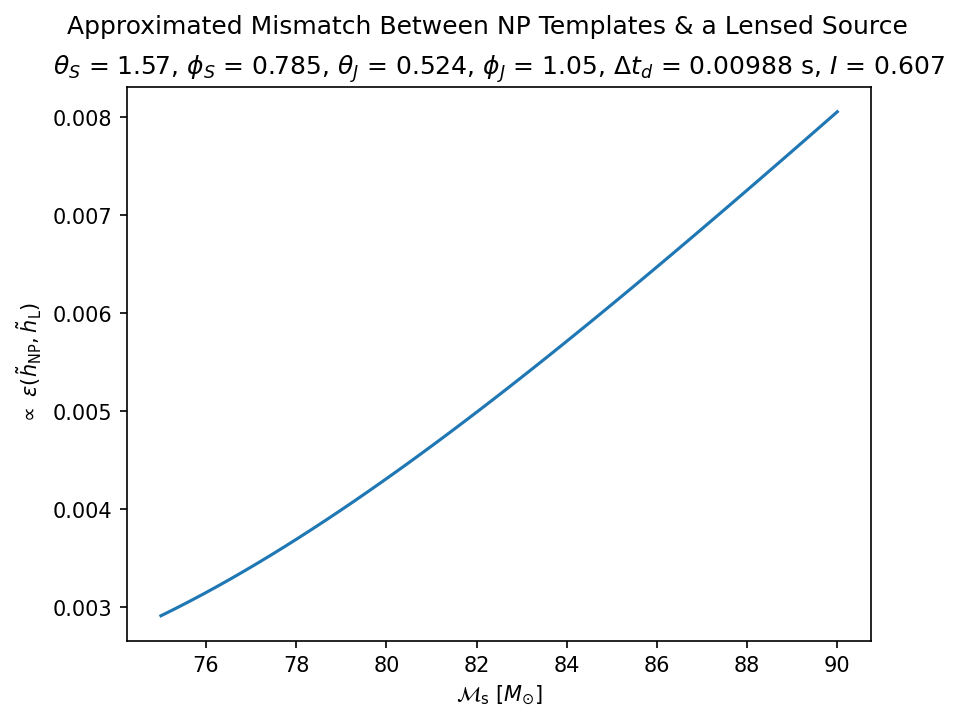

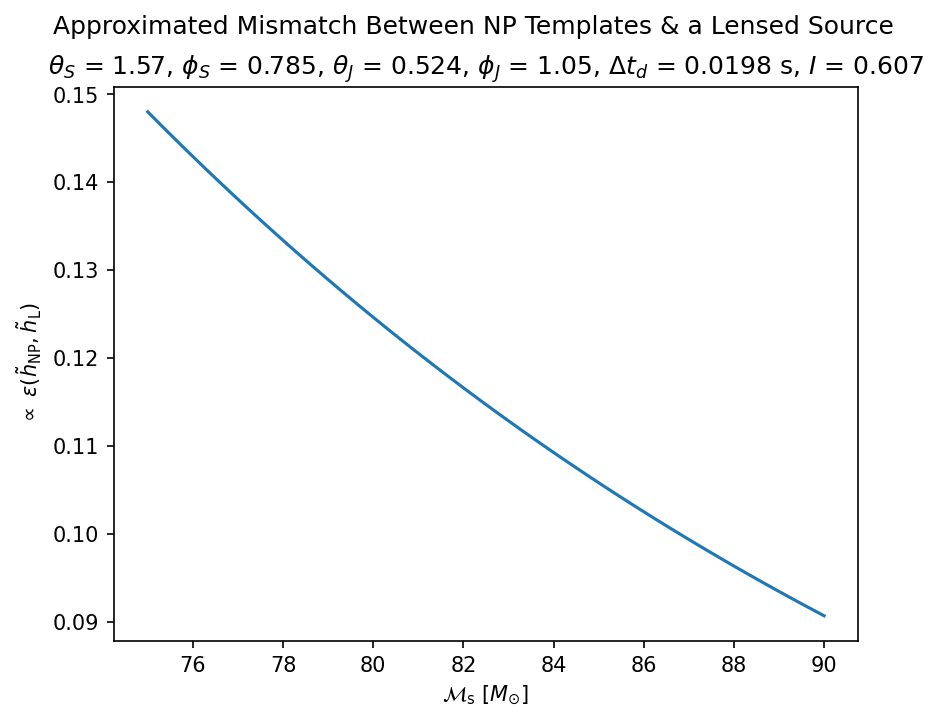

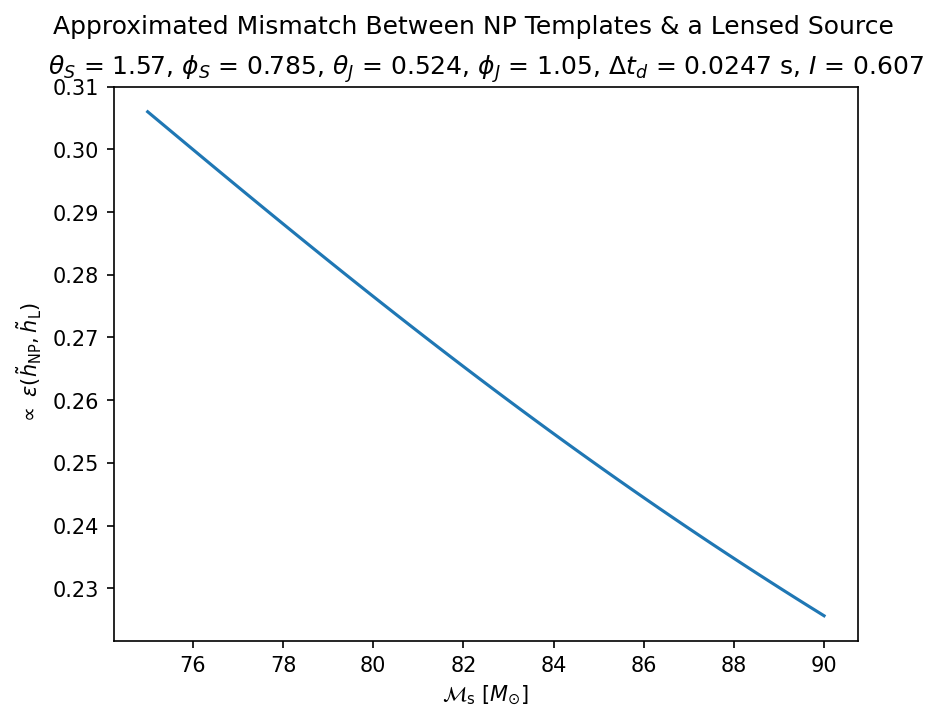

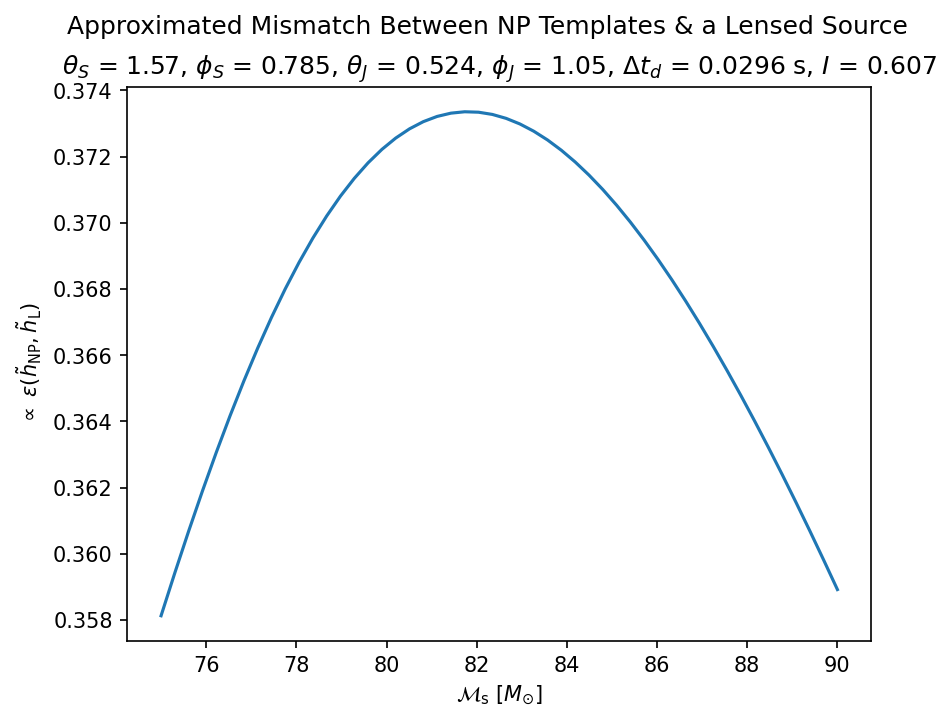

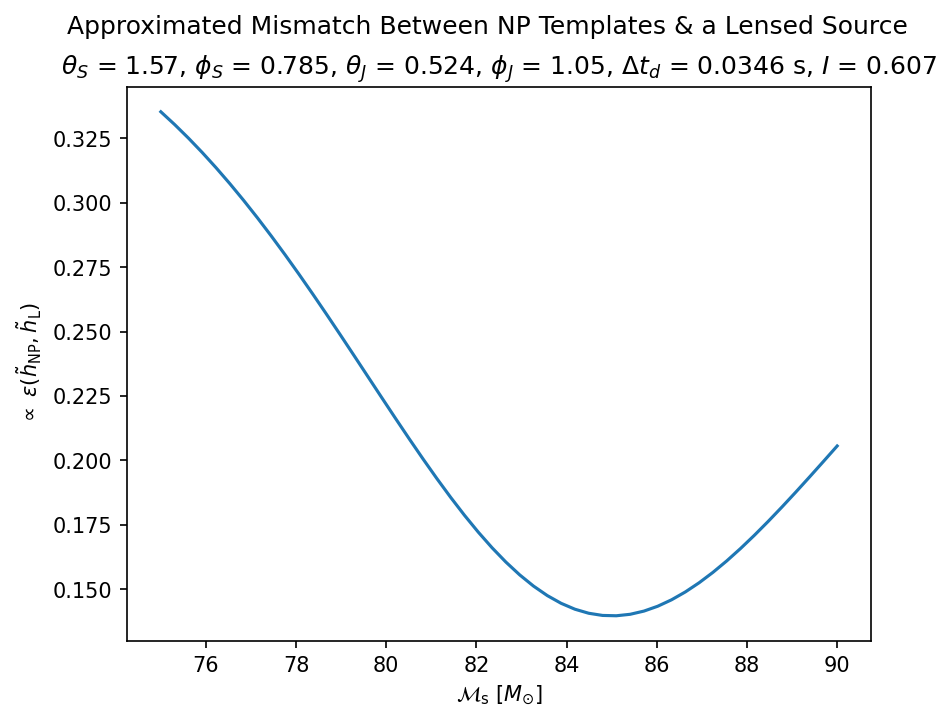

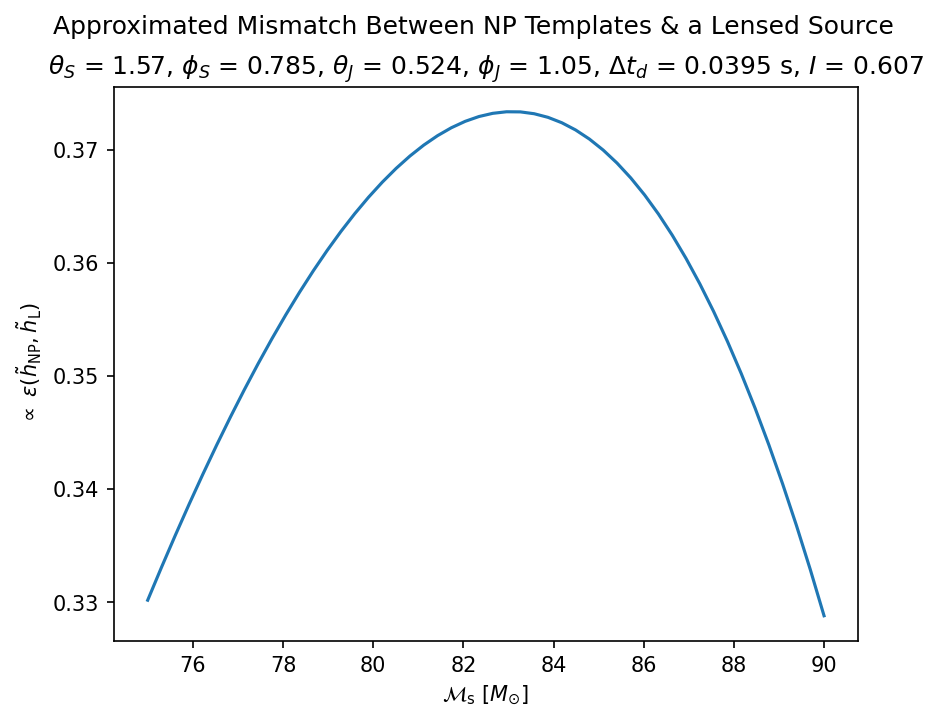

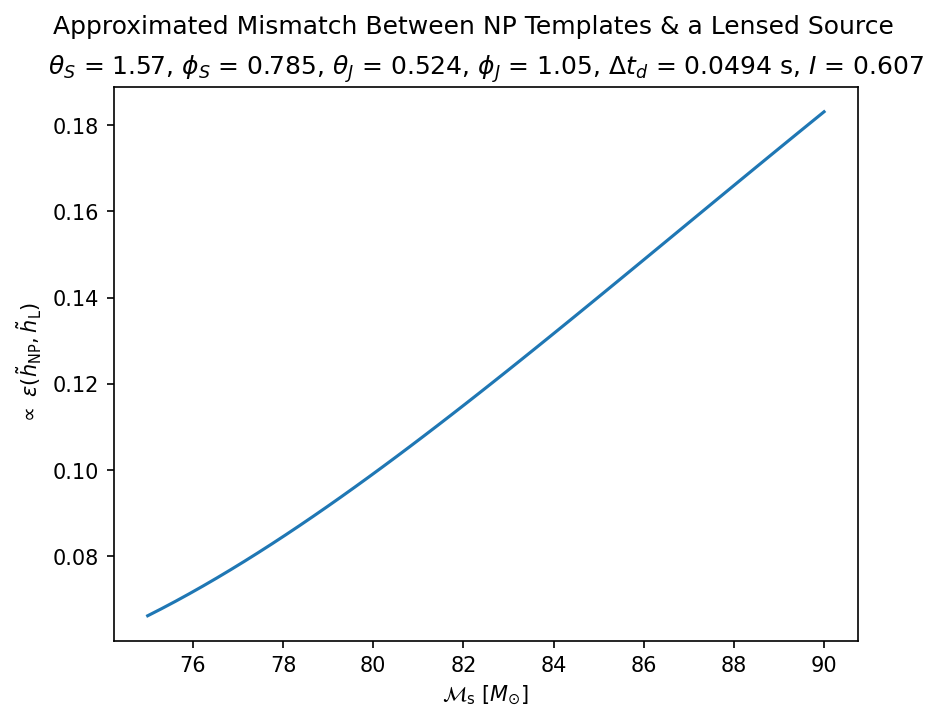

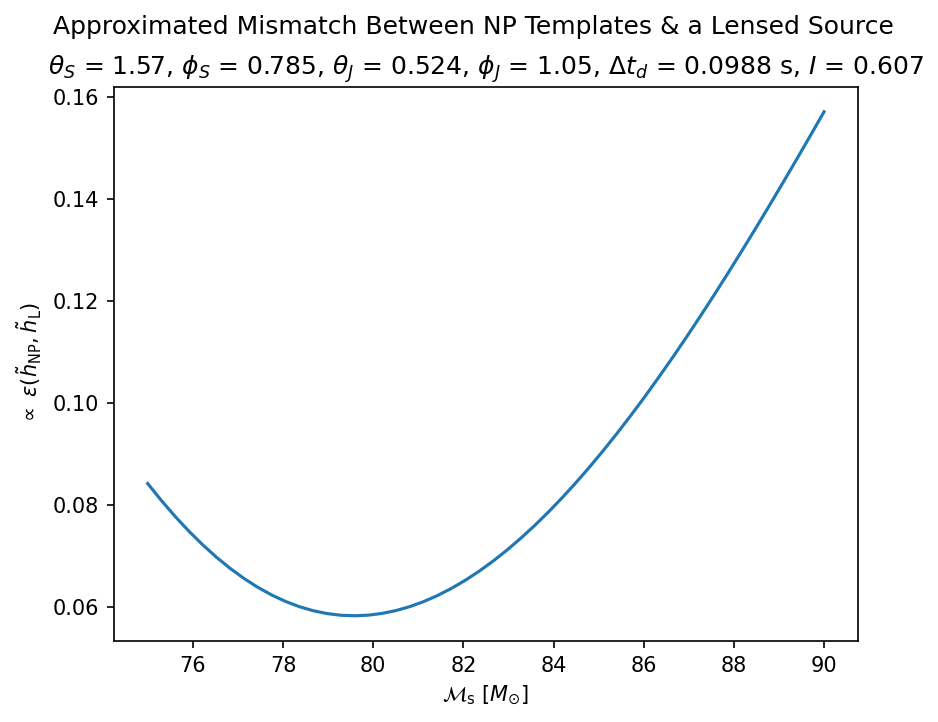

In [71]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

MLz_range = np.array([1e3, 2e3, 2500, 3e3, 3500, 4e3, 5e3, 1e4])

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    approx_mismatch_plot7()  # with lower limit subtraction
    plt.show()

In [63]:
def approx_mismatch_plot8():
    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I_val = lens_inst.I()
    x_min = 2 * np.pi * Delta_td * 20

    I, x, a = sp.symbols("I x a")

    num = 2 * x * sp.sin(x) - (x**2 - 2) * sp.cos(x)
    Taylor_num = sp.series(num, x, a, 3)
    Taylor_num = Taylor_num.removeO()
    Taylor_num_lower = Taylor_num.subs({x: x_min})

    den_1 = x**3 / 3
    den_1_lower = den_1.subs({x: x_min})
    den_2 = x**3 * (1 + I) / 3 + 2 * I**0.5 * (
        2 * x * sp.sin(x) - (x**2 - 2) * sp.cos(x)
    )
    Taylor_den_2 = sp.series(den_2, x, a, 3)
    Taylor_den_2 = Taylor_den_2.removeO()
    Taylor_den_2_lower = Taylor_den_2.subs({x: x_min})

    M_ver1 = (Taylor_num - Taylor_num_lower) / (
        (den_1 - den_1_lower) * (Taylor_den_2 - Taylor_den_2_lower)
    ) ** 0.5
    M_ver1 = M_ver1.subs({I: I_val, a: x_min})

    mcz_arr = np.linspace(75, 90, 50)
    x_arr = 2 * np.pi * Delta_td * get_fcut_from_mcz(mcz_arr, lens_params["eta"])

    M_ver1_arr = np.array([M_ver1.subs({x: x_val}) for x_val in x_arr])
    M_ver1_arr = np.where(M_ver1_arr == sp.zoo, np.nan, M_ver1_arr)
    M_ver1_arr = np.where(np.iscomplex(M_ver1_arr), np.nan, M_ver1_arr)

    ep_arr = 1 - M_ver1_arr

    plt.plot(mcz_arr, ep_arr)
    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\propto$ $\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")

    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I_val,
        )
    )

    plt.suptitle(r"Approximated Mismatch Between NP Templates & a Lensed Source")

## approx. mismatch plots p3

In [80]:
def approx_mismatch_plot9_ver1():
    # get analytical functions
    I, x, y = sp.symbols("I x y")

    f1_integrand = x**2 * (
        (1 + I**0.5 * sp.sin(x)) * sp.cos(y) + I**0.5 * sp.cos(x) * sp.sin(y)
    )
    f1 = sp.integrate(f1_integrand, x)
    f1 = sp.simplify(f1)

    f2_integrand = x**2
    f2 = sp.integrate(f2_integrand, x)
    f2 = sp.simplify(f2)

    f3_integrand = x**2 * (1 + 2 * I**0.5 * sp.sin(x) + I)
    f3 = sp.integrate(f3_integrand, x)
    f3 = sp.simplify(f3)

    # get lensing parameters
    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I_val = lens_inst.I()
    x_min = 2 * np.pi * Delta_td * 20

    # convert f1 to numpy function
    f1 = f1.subs({I: I_val})
    f2 = f2.subs({I: I_val})
    f3 = f3.subs({I: I_val})
    f1_np = sp.lambdify((x, y), f1, "numpy")
    f2_np = sp.lambdify(x, f2, "numpy")
    f3_np = sp.lambdify(x, f3, "numpy")

    mcz_arr = np.linspace(70, 90, 200)
    x_arr = 2 * np.pi * Delta_td * get_fcut_from_mcz(mcz_arr, lens_params["eta"])

    # for every x in x_arr, find the corresponding y from 0 to 2pi such that f1 is maximized
    y_arr = np.zeros(len(x_arr))
    for i, x_val in enumerate(x_arr):
        f1_max = -np.inf
        for y_val in np.linspace(0, 2 * np.pi, 1000):
            # does NOT consider the lower limit at 20 Hz for f1
            f1_val = f1_np(x_val, y_val)
            if f1_val > f1_max:
                f1_max = f1_val
                y_arr[i] = y_val

    # calculate epsilon
    epsilon_arr = (
        1
        - (f1_np(x_arr, y_arr) - f1_np(x_min, y_arr))
        / ((f2_np(x_arr) - f2_np(x_min)) * (f3_np(x_arr) - f3_np(x_min))) ** 0.5
    )

    plt.plot(mcz_arr, epsilon_arr)
    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\approx$ $\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")

    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I_val,
        )
    )

    plt.suptitle(r"Approximated Mismatch Between NP Templates & a Lensed Source")

    return epsilon_arr

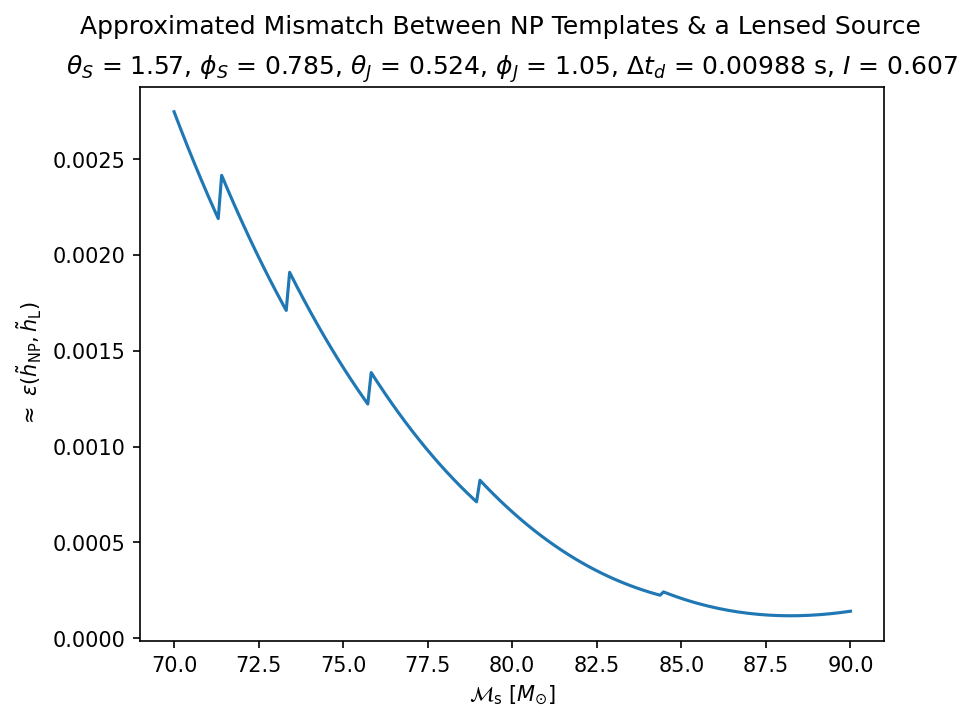

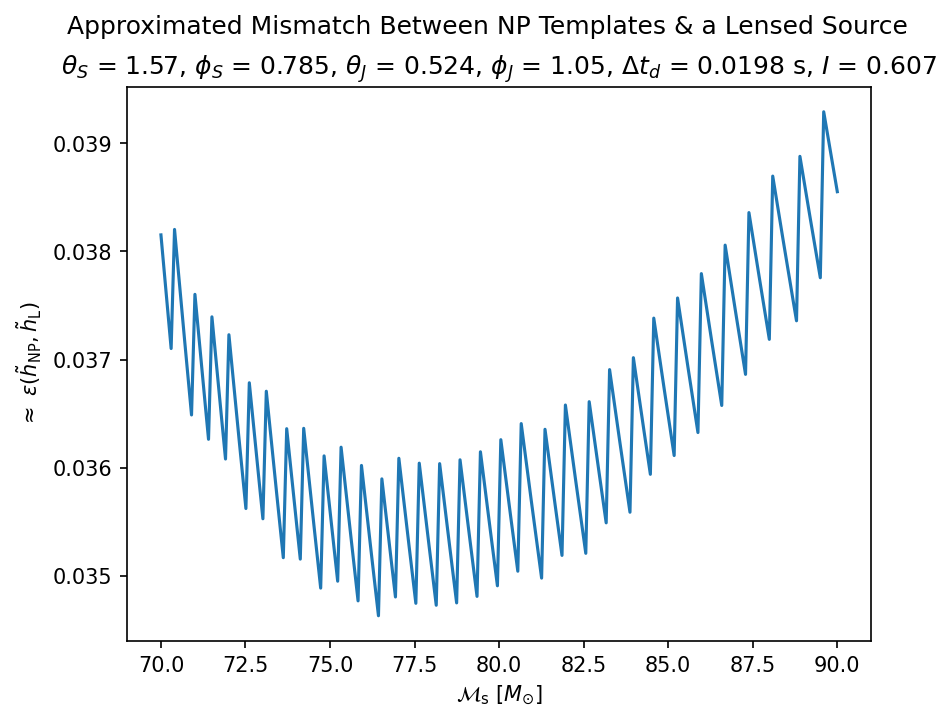

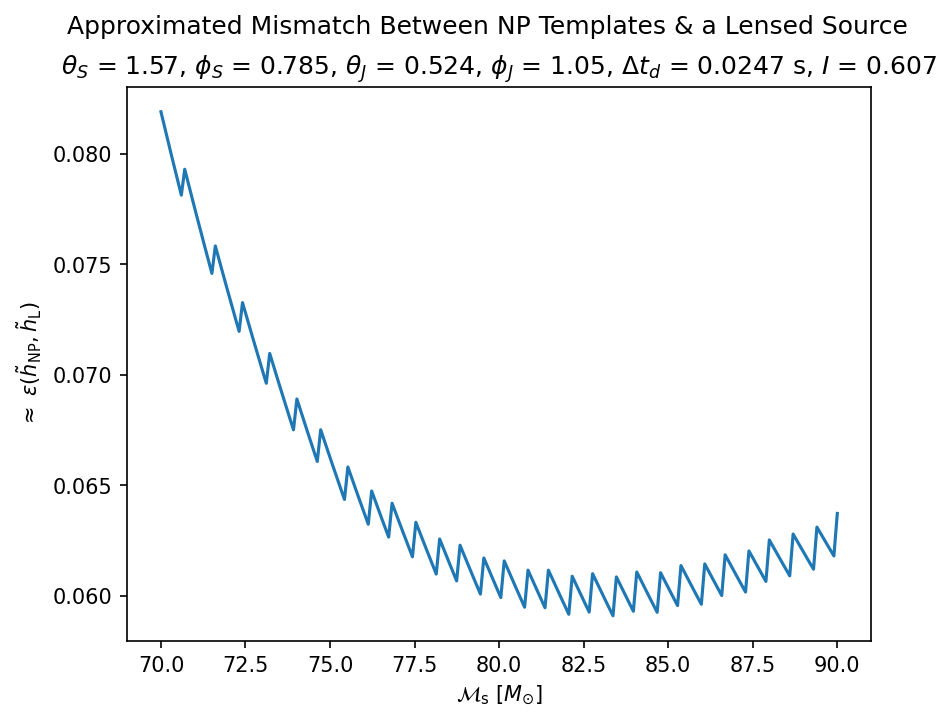

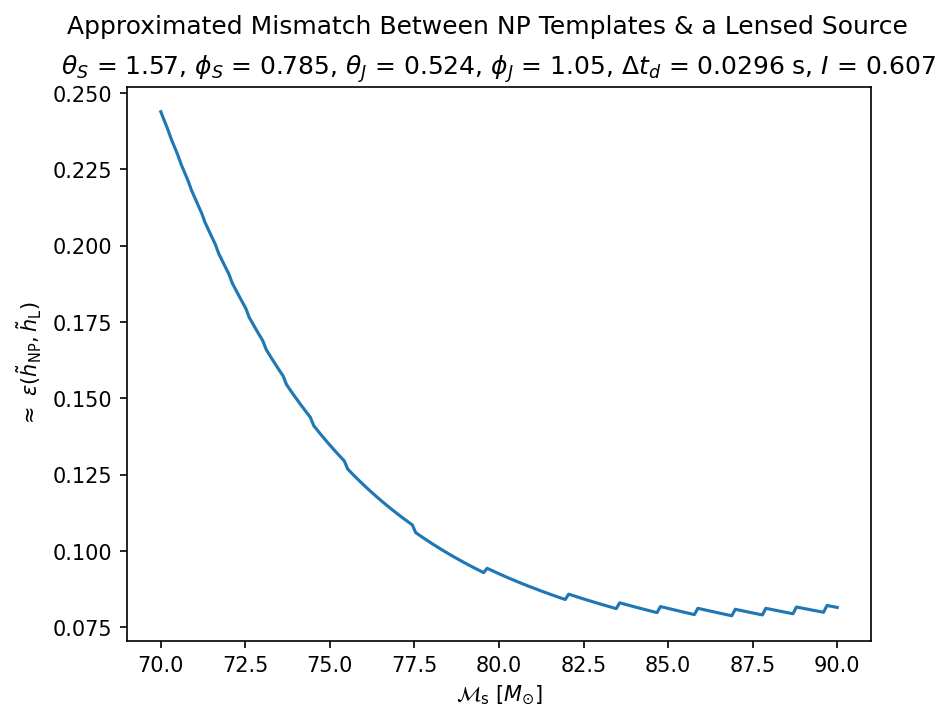

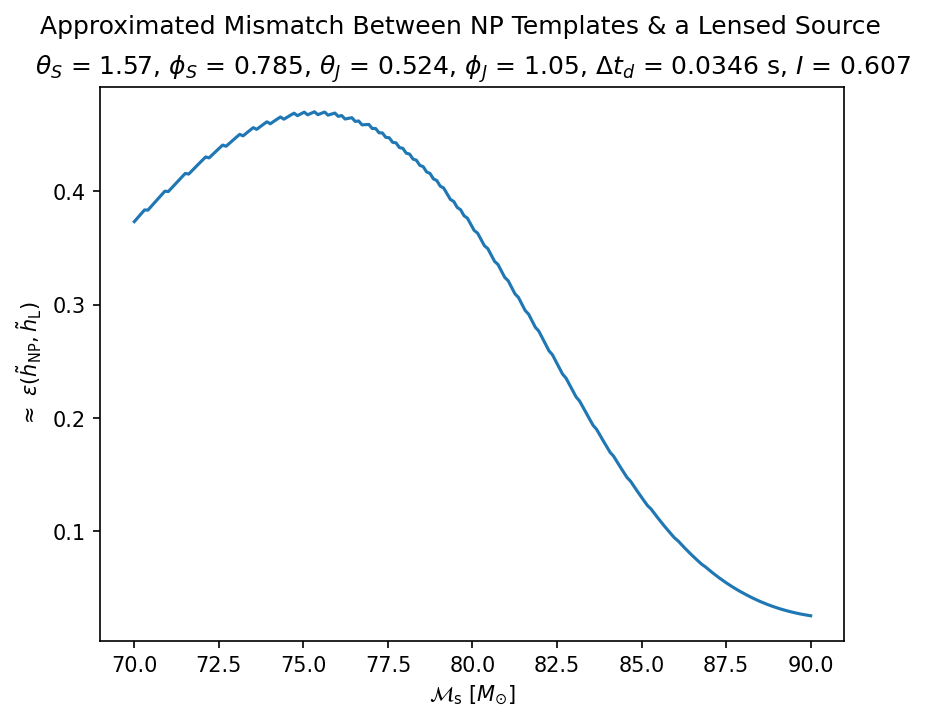

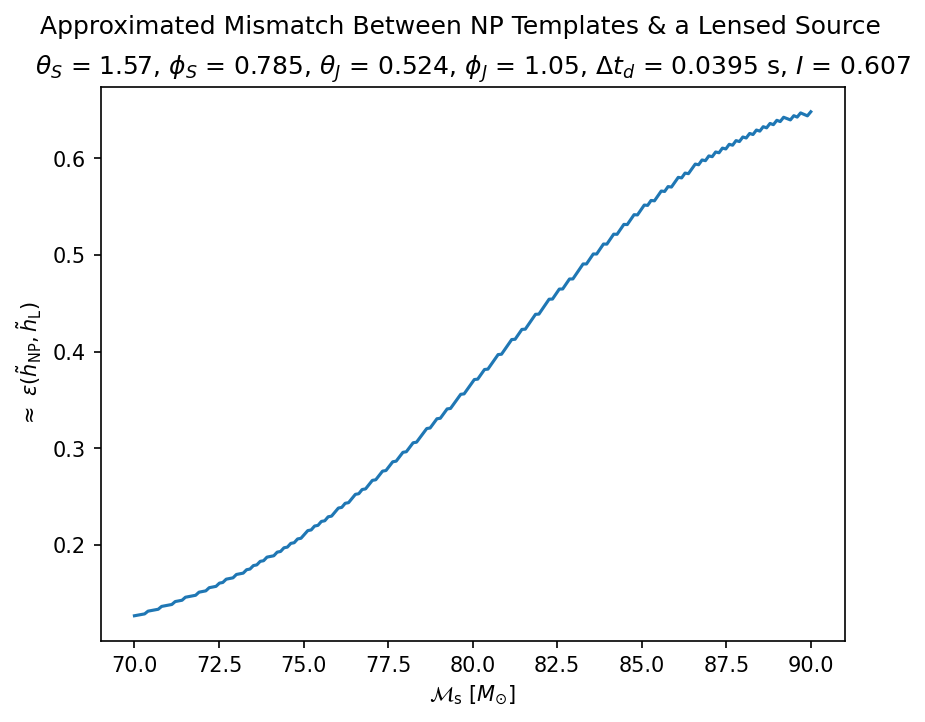

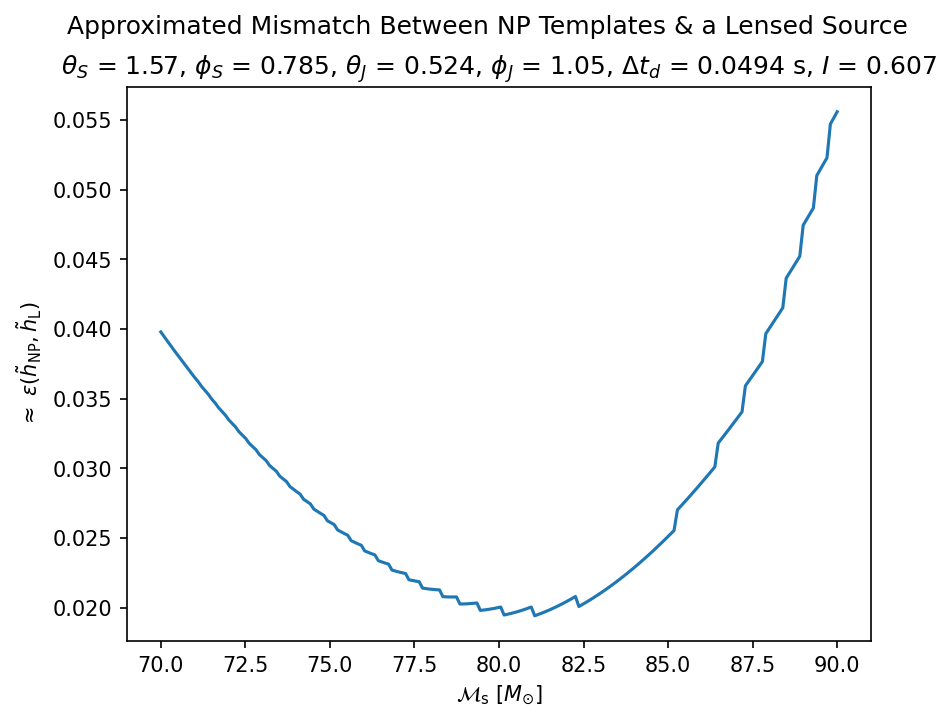

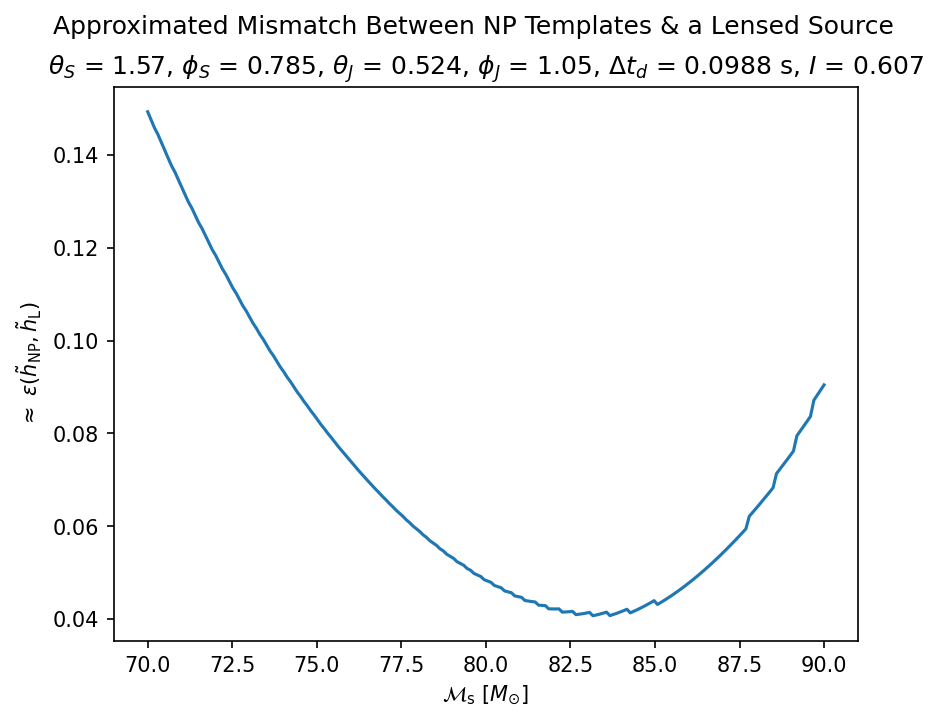

In [81]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

MLz_range = np.array([1e3, 2e3, 2500, 3e3, 3500, 4e3, 5e3, 1e4])

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    approx_mismatch_plot9_ver1()  # does NOT consider the lower limit at 20 Hz for f1 when finding optimized y
    plt.show()

In [75]:
def approx_mismatch_plot9_ver2():
    # get analytical functions
    I, x, y = sp.symbols("I x y")

    f1_integrand = x**2 * (
        (1 + I**0.5 * sp.sin(x)) * sp.cos(y) + I**0.5 * sp.cos(x) * sp.sin(y)
    )
    f1 = sp.integrate(f1_integrand, x)
    f1 = sp.simplify(f1)

    f2_integrand = x**2
    f2 = sp.integrate(f2_integrand, x)
    f2 = sp.simplify(f2)

    f3_integrand = x**2 * (1 + 2 * I**0.5 * sp.sin(x) + I)
    f3 = sp.integrate(f3_integrand, x)
    f3 = sp.simplify(f3)

    # get lensing parameters
    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I_val = lens_inst.I()
    x_min = 2 * np.pi * Delta_td * 20

    # convert f1 to numpy function
    f1 = f1.subs({I: I_val})
    f2 = f2.subs({I: I_val})
    f3 = f3.subs({I: I_val})
    f1_np = sp.lambdify((x, y), f1, "numpy")
    f2_np = sp.lambdify(x, f2, "numpy")
    f3_np = sp.lambdify(x, f3, "numpy")

    mcz_arr = np.linspace(70, 90, 200)
    x_arr = 2 * np.pi * Delta_td * get_fcut_from_mcz(mcz_arr, lens_params["eta"])

    # for every x in x_arr, find the corresponding y from 0 to 2pi such that f1 is maximized
    y_arr = np.zeros(len(x_arr))
    for i, x_val in enumerate(x_arr):
        Delta_f1_max = -np.inf
        for y_val in np.linspace(0, 2 * np.pi, 1000):
            # DOES consider the lower limit at 20 Hz for f1
            Delta_f1 = f1_np(x_val, y_val) - f1_np(x_min, y_val)
            if Delta_f1 > Delta_f1_max:
                Delta_f1_max = Delta_f1
                y_arr[i] = y_val

    # calculate epsilon
    epsilon_arr = (
        1
        - (f1_np(x_arr, y_arr) - f1_np(x_min, y_arr))
        / ((f2_np(x_arr) - f2_np(x_min)) * (f3_np(x_arr) - f3_np(x_min))) ** 0.5
    )

    plt.plot(mcz_arr, epsilon_arr, label=r"$\approx \epsilon$")
    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\approx$ $\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")

    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I_val,
        )
    )

    plt.suptitle(r"Approximated Mismatch Between NP Templates & a Lensed Source")

    return epsilon_arr

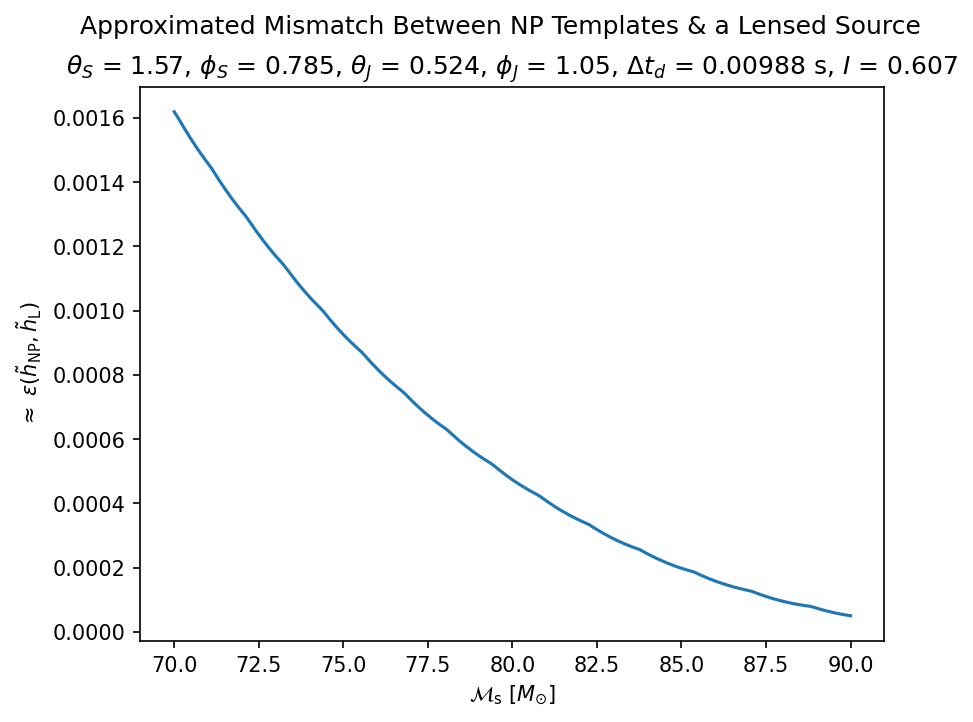

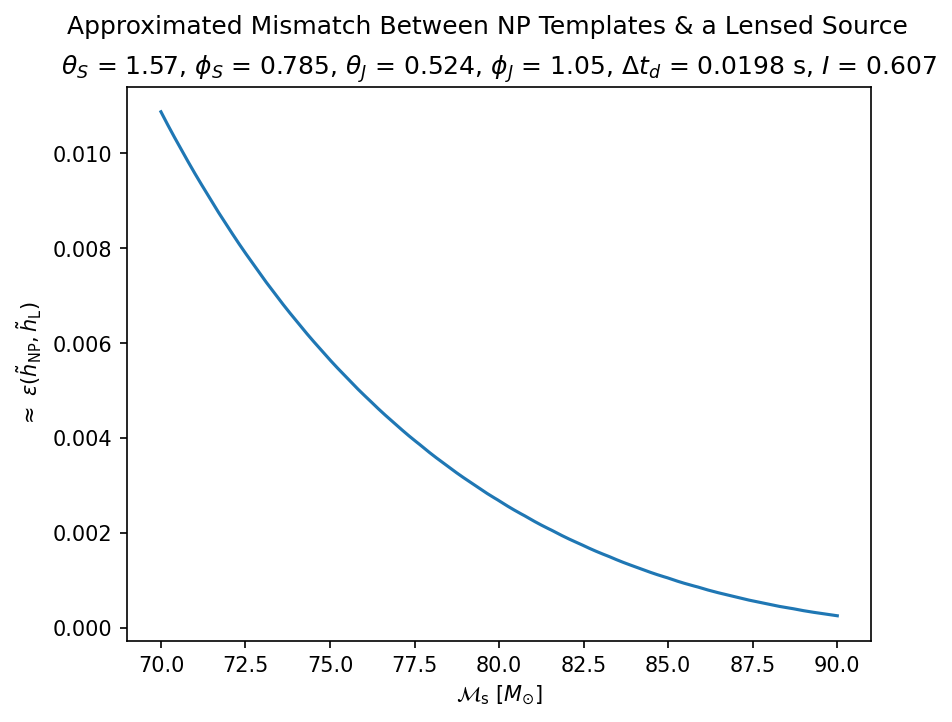

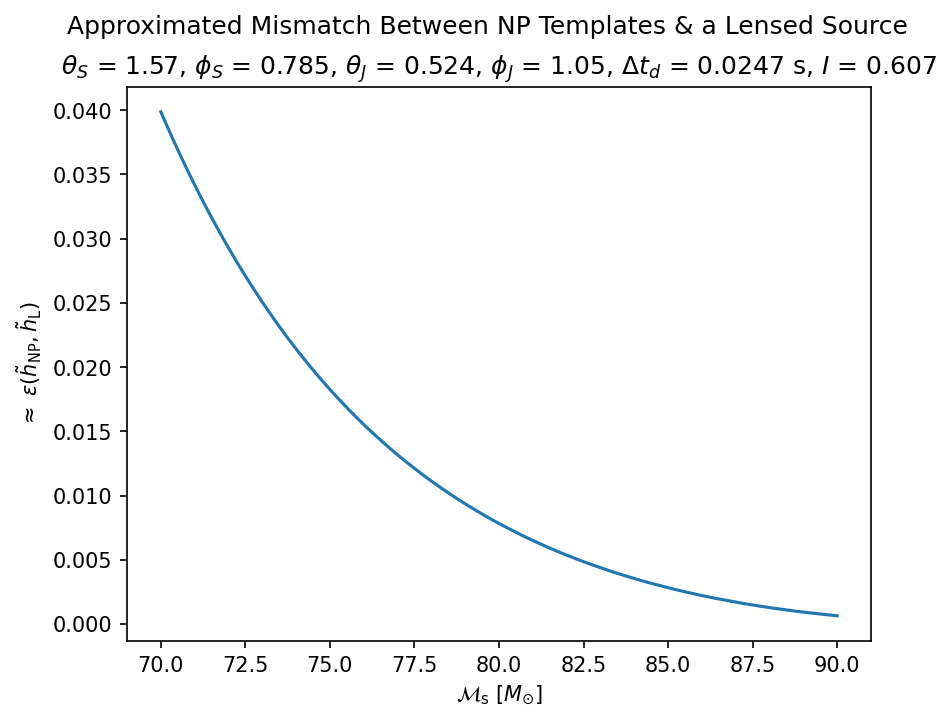

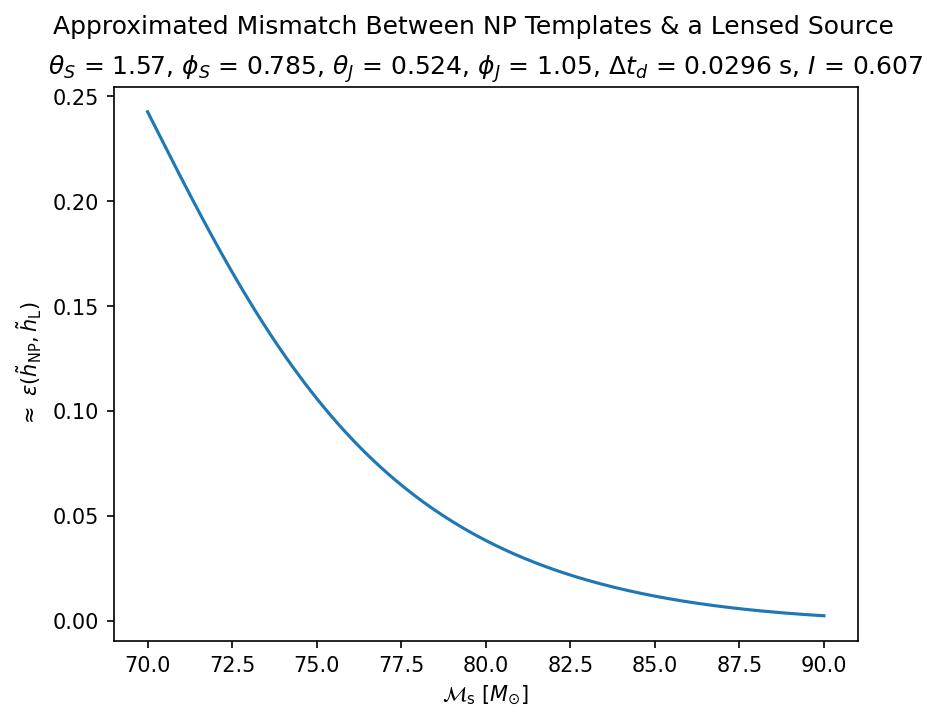

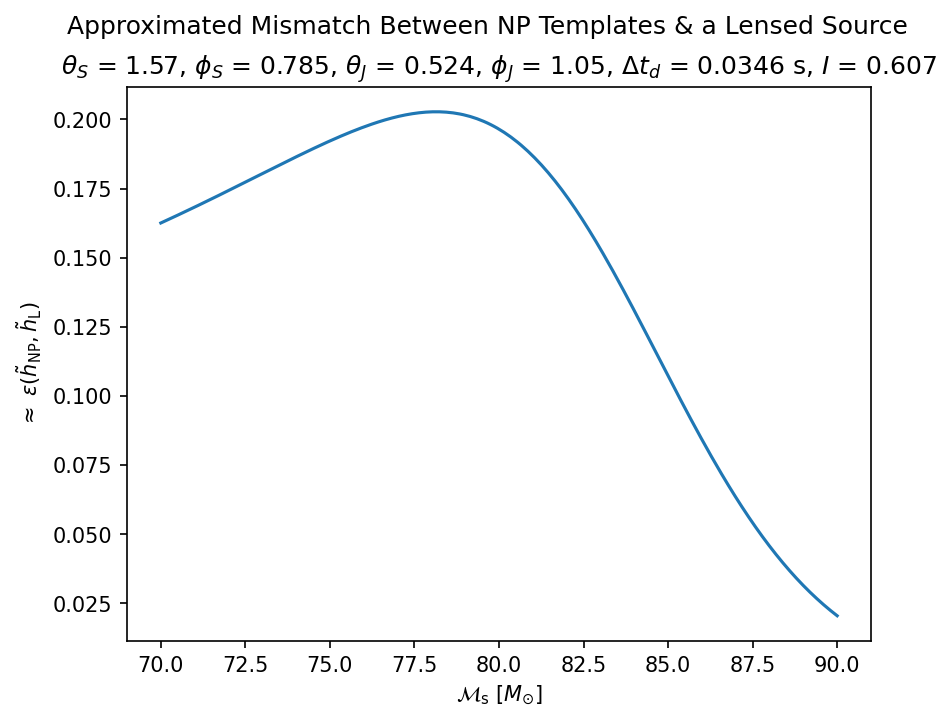

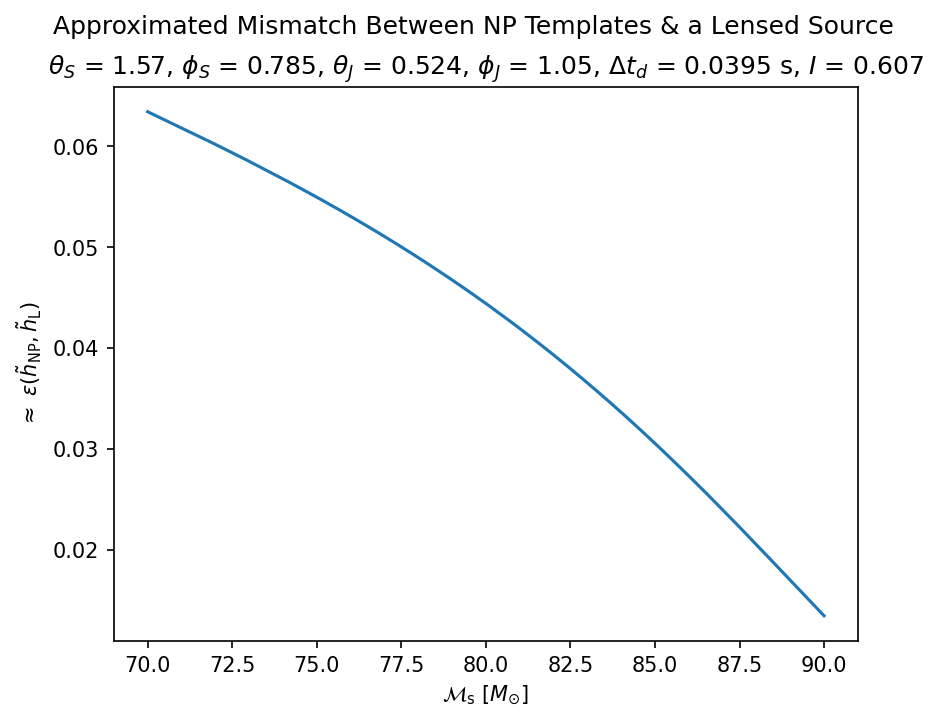

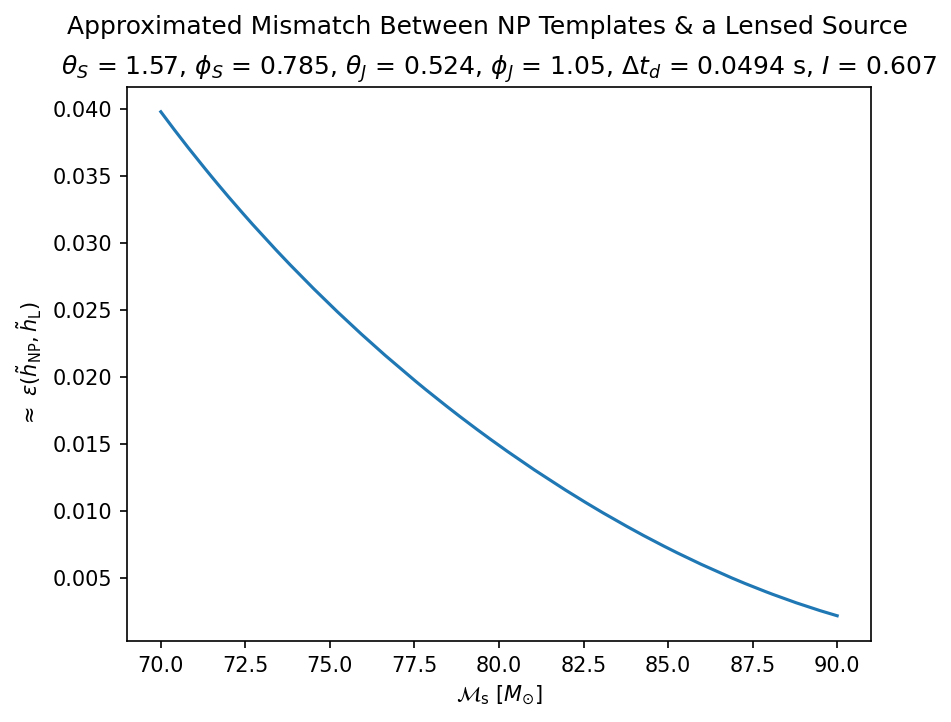

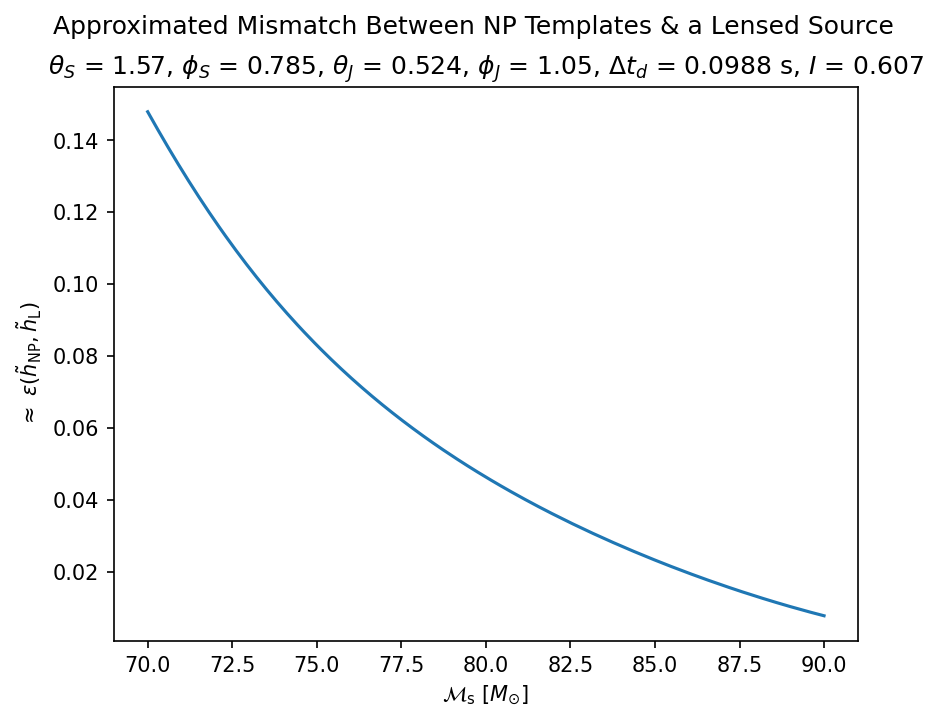

In [83]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

MLz_range = np.array([1e3, 2e3, 2500, 3e3, 3500, 4e3, 5e3, 1e4])

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    approx_mismatch_plot9_ver2()  # DOES consider the lower limit at 20 Hz for f1 when finding optimized y
    plt.show()

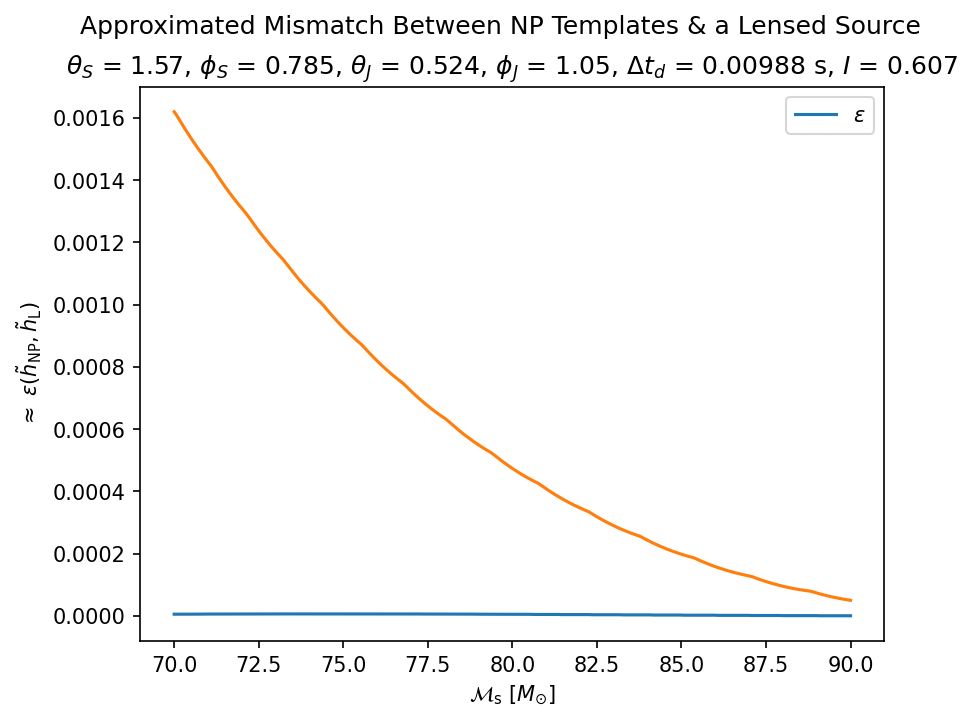

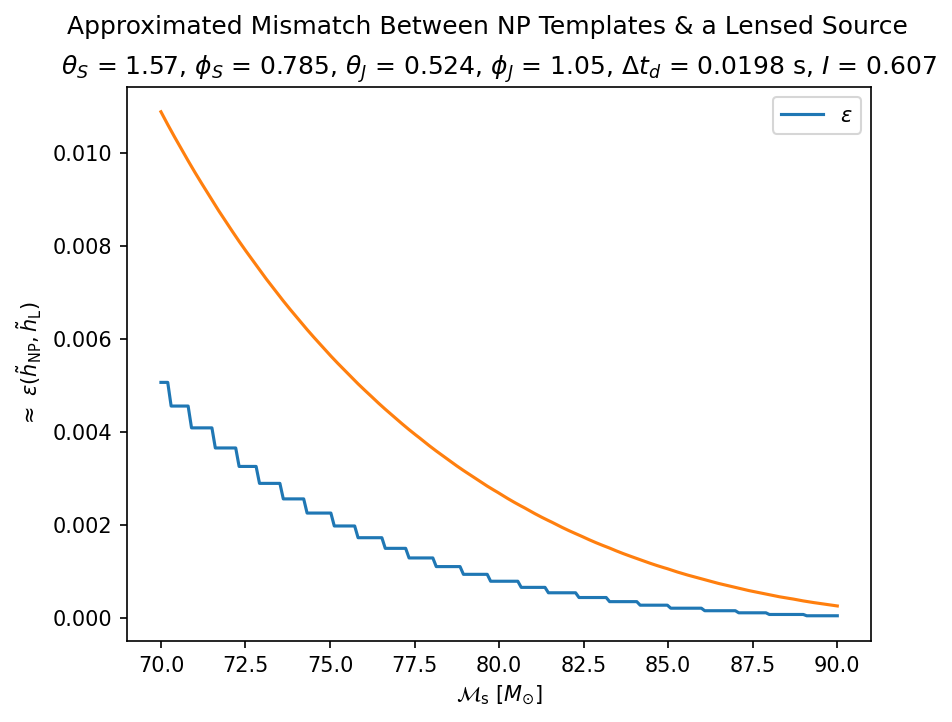

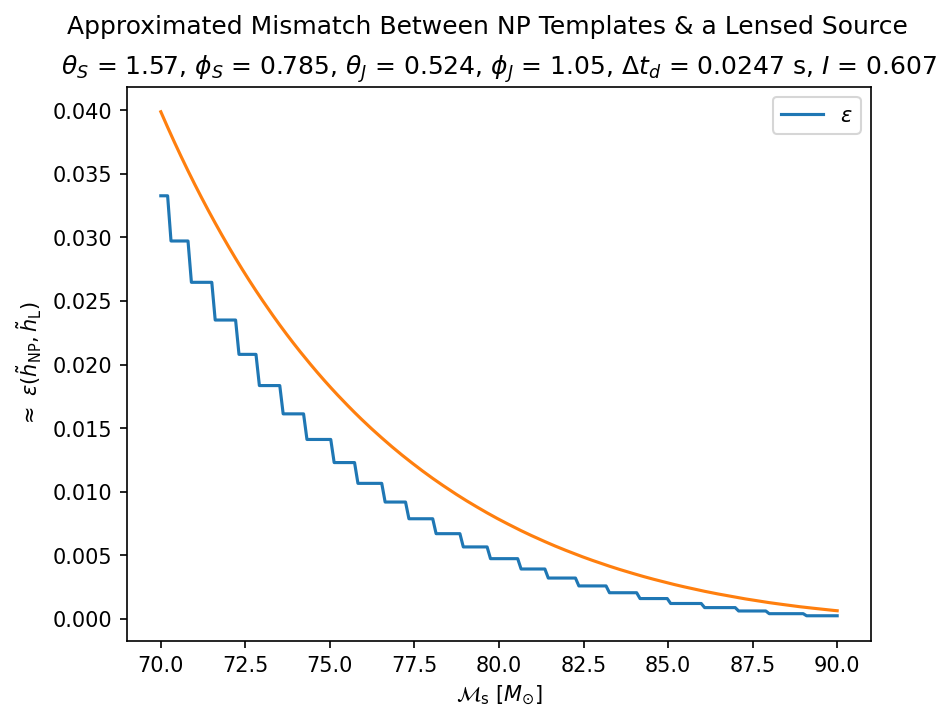

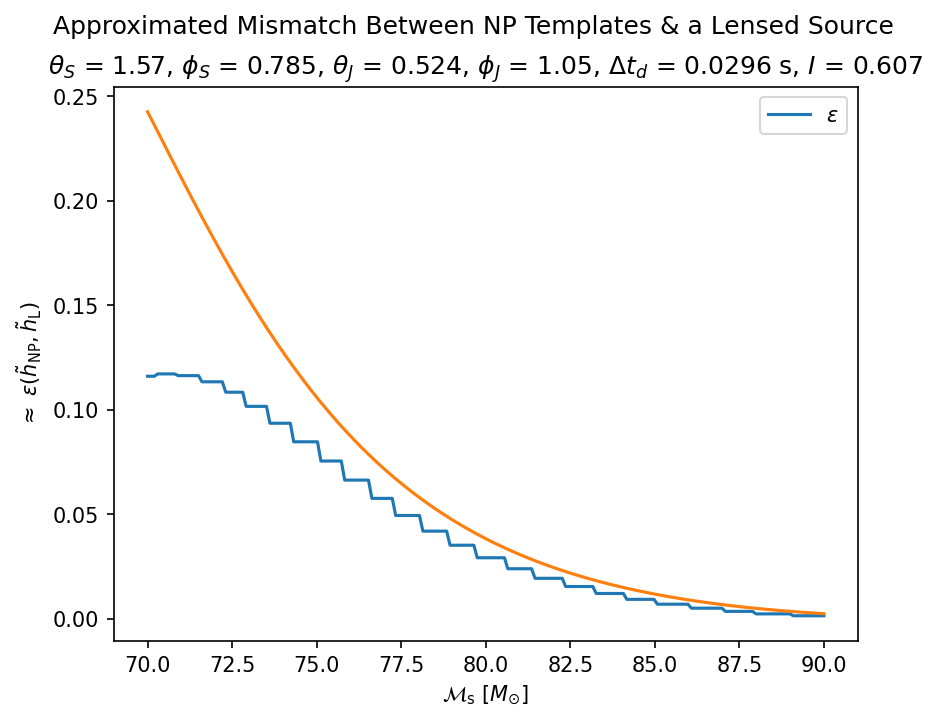

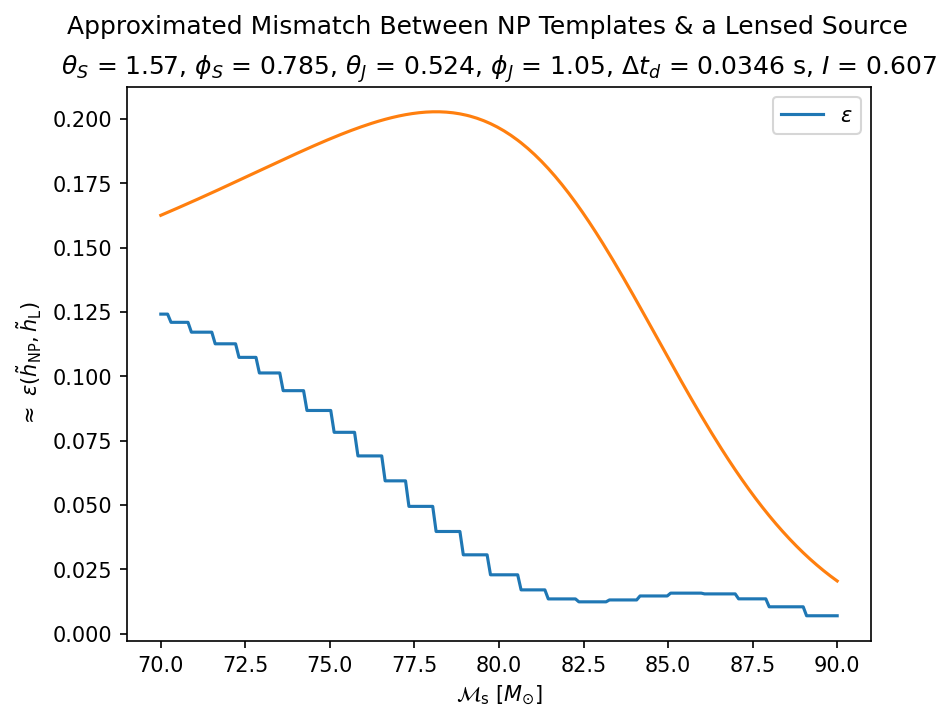

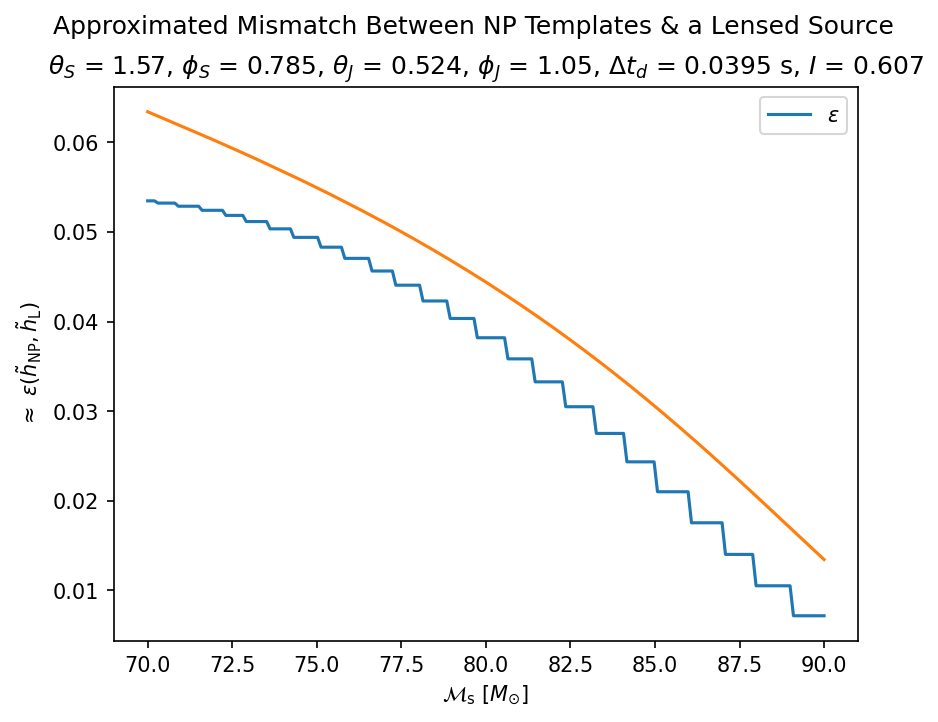

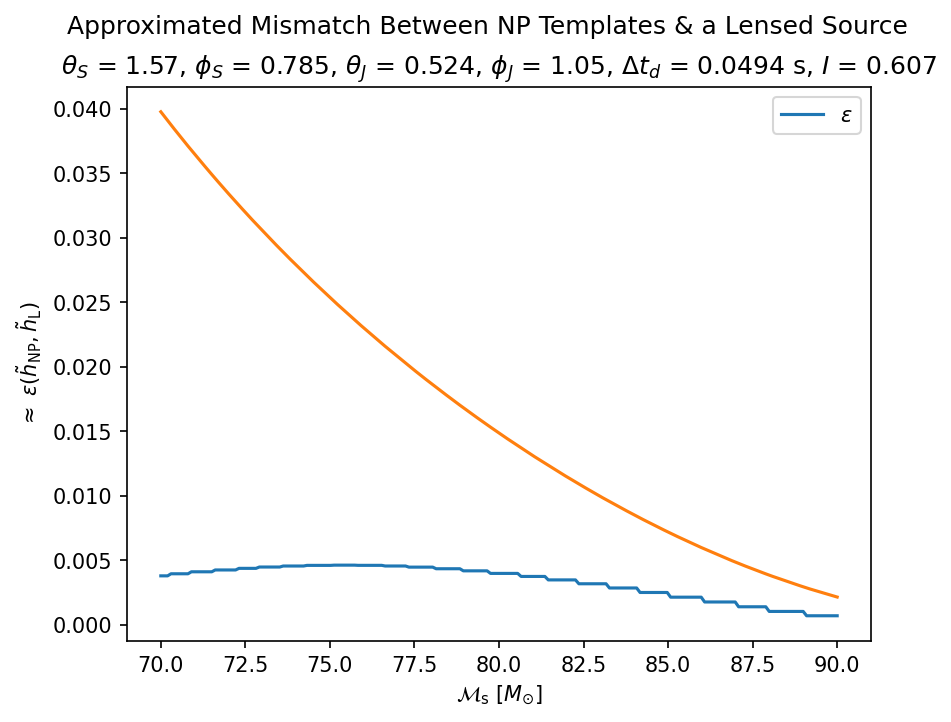

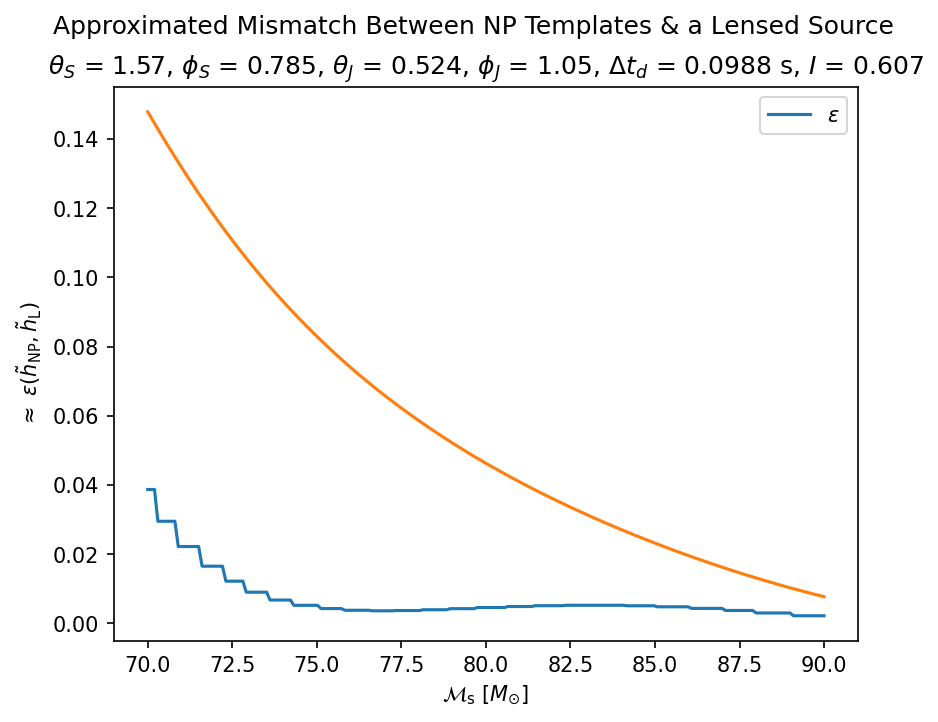

In [77]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

mcz_L_arr = np.linspace(70, 90, 200)
MLz_range = np.array([1e3, 2e3, 2500, 3e3, 3500, 4e3, 5e3, 1e4])
mismatch_plots_dict = {}
approx_mismatch_plots_dict = {}

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    mismatch_plots_dict[MLz] = mismatch_plot_general_zoomed(opt_match=True)
    approx_mismatch_plots_dict[MLz] = approx_mismatch_plot9_ver2()  # DOES consider the lower limit at 20 Hz for f1 when finding optimized y
    plt.legend()
    plt.show()

In [90]:
def approx_mismatch_plot10():
    # get analytical functions
    I, x, y = sp.symbols("I x y")

    f1_integrand = x**2 * (
        (1 + I**0.5 * sp.sin(x)) * sp.cos(y) + I**0.5 * sp.cos(x) * sp.sin(y)
    )
    f1 = sp.integrate(f1_integrand, x)
    f1 = sp.simplify(f1)

    f2_integrand = x**2
    f2 = sp.integrate(f2_integrand, x)
    f2 = sp.simplify(f2)

    f3_integrand = x**2 * (1 + 2 * I**0.5 * sp.sin(x) + I)
    f3 = sp.integrate(f3_integrand, x)
    f3 = sp.simplify(f3)

    # get lensing parameters
    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I_val = lens_inst.I()
    x_min = 2 * np.pi * Delta_td * 20

    f1_min = f1.subs({x: x_min})
    f1_max_y = sp.solve(sp.diff(f1 - f1_min, y), y)

    # convert f1 to numpy function
    f1 = f1.subs({I: I_val})
    f2 = f2.subs({I: I_val})
    f3 = f3.subs({I: I_val})
    f1_np = sp.lambdify((x, y), f1, "numpy")
    f2_np = sp.lambdify(x, f2, "numpy")
    f3_np = sp.lambdify(x, f3, "numpy")

    mcz_arr = np.linspace(75, 90, 200)
    x_arr = 2 * np.pi * Delta_td * get_fcut_from_mcz(mcz_arr, lens_params["eta"])

    # for every x in x_arr, find y from f1_max_y solutions such that f1 is maximized
    y_arr = np.zeros(len(x_arr))
    for i, x_val in enumerate(x_arr):
        f1_max = -np.inf
        for sol in f1_max_y:
            y_sol = sol.subs({I: I_val})
            y_np = sp.lambdify(x, y_sol, "numpy")
            y_val = y_np(x_val)
            if np.iscomplex(y_val):
                continue
            f1_val = f1_np(x_val, y_val)
            if f1_val > f1_max:
                f1_max = f1_val
                y_arr[i] = y_val

    # calculate epsilon
    epsilon_arr = (
        1
        - (f1_np(x_arr, y_arr) - f1_np(x_min, y_arr))
        / ((f2_np(x_arr) - f2_np(x_min)) * (f3_np(x_arr) - f3_np(x_min))) ** 0.5
    )

    plt.plot(mcz_arr, epsilon_arr)
    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\approx$ $\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")

    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I_val,
        )
    )

    plt.suptitle(r"Approximated Mismatch Between NP Templates & a Lensed Source")

    return epsilon_arr

In [91]:
# lens_params, RP_params, NP_params = set_to_params(
#     lens_params_1, RP_params_1, NP_params_1
# )

# MLz_range = np.array([1e3, 2e3, 2500, 3e3, 3500, 4e3, 5e3, 1e4])

# for MLz in MLz_range:
#     lens_params["MLz"] = MLz * solar_mass
#     approx_mismatch_plot10()
#     plt.show()

# TOO LONG TO RUN!!! not worth it

In [5]:
def find_optimized_params(t_params, s_params, opt_match=True):
    gammaP_results = optimize_mismatch_gammaP_general(
        t_params, s_params, use_optimized_match=opt_match
    )

    t_params["gamma_P"] = gammaP_results["ep_min_gamma"]
    ep_min_idx = gammaP_results["ep_min_idx"]

    delta_t = get_gw(s_params)["waveform"].delta_t
    t_params["t_c"] = t_params["t_c"] - ep_min_idx * delta_t

    mismatch_results1 = mismatch_general(
        t_params, s_params, use_optimized_match=opt_match
    )
    # testing
    updated_idx = mismatch_results1["index"]  # testing
    t_params["t_c"] = t_params["t_c"] - updated_idx * delta_t  # testing

    mismatch_results2 = mismatch_general(
        t_params, s_params, use_optimized_match=opt_match
    )  # testing
    phi = mismatch_results2["phi"]  # testing
    t_params["phi_c"] = phi

    updated_mismatch_results = mismatch_general(
        t_params, s_params, use_optimized_match=opt_match
    )

    return {
        "updated_t_params": t_params,
        "updated_s_params": s_params,
        "updated_mismatch_results": updated_mismatch_results,
    }

In [25]:
# treating y as a function of x


def approx_mismatch_plot11(t_params, s_params):
    # get analytical functions
    x, Delta_td, I = sp.symbols("x Δt_d I", positive=True)
    y, t_c, phi_c = sp.symbols("y t_c phi_c")

    y = (x / Delta_td) * t_c - phi_c  # function of x
    f1_ver2_integrand = x**2 * (
        (1 + I**0.5 * sp.sin(x)) * sp.cos(y) + I**0.5 * sp.cos(x) * sp.sin(y)
    )
    f1_ver2 = sp.integrate(f1_ver2_integrand, x)
    f1_ver2 = sp.simplify(f1_ver2)
    f1 = f1_ver2.args[2][0]

    f2_integrand = x**2
    f2 = sp.integrate(f2_integrand, x)
    f2 = sp.simplify(f2)

    f3_integrand = x**2 * (1 + 2 * I**0.5 * sp.sin(x) + I)
    f3 = sp.integrate(f3_integrand, x)
    f3 = sp.simplify(f3)

    # get lensing parameters
    lens_inst = LensingGeo(s_params)
    Delta_td_val = lens_inst.Delta_td()
    I_val = lens_inst.I()
    x_min = 2 * np.pi * Delta_td_val * 20

    # convert f1 to numpy function
    f1 = f1.subs({I: I_val, Delta_td: Delta_td_val})
    f2 = f2.subs({I: I_val})
    f3 = f3.subs({I: I_val})
    f1_np = sp.lambdify((x, t_c, phi_c), f1, "numpy")
    f2_np = sp.lambdify(x, f2, "numpy")
    f3_np = sp.lambdify(x, f3, "numpy")

    mcz_arr = np.linspace(75, 90, 200)
    x_arr = 2 * np.pi * Delta_td_val * get_fcut_from_mcz(mcz_arr, s_params["eta"])

    # for every x in x_arr, find the corresponding t_c, phi_c such that f1 is maximized using pycbc.optimized_match()
    t_c_arr = np.zeros(len(mcz_arr))
    phi_c_arr = np.zeros(len(mcz_arr))
    for i, mcz in enumerate(mcz_arr):
        t_params["mcz"] = s_params["mcz"] = mcz * solar_mass
        updated_t_params = find_optimized_params(t_params, s_params)["updated_t_params"]
        t_c_arr[i] = -updated_t_params["t_c"]
        phi_c_arr[i] = -updated_t_params["phi_c"]

    # calculate epsilon
    epsilon_arr = (
        1
        - (f1_np(x_arr, t_c_arr, phi_c_arr) - f1_np(x_min, t_c_arr, phi_c_arr))
        / ((f2_np(x_arr) - f2_np(x_min)) * (f3_np(x_arr) - f3_np(x_min))) ** 0.5
    )

    plt.plot(mcz_arr, epsilon_arr)
    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\approx$ $\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")

    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td_val,
            I_val,
        )
    )

    plt.suptitle(r"Approximated Mismatch Between NP Templates & a Lensed Source")

    return epsilon_arr

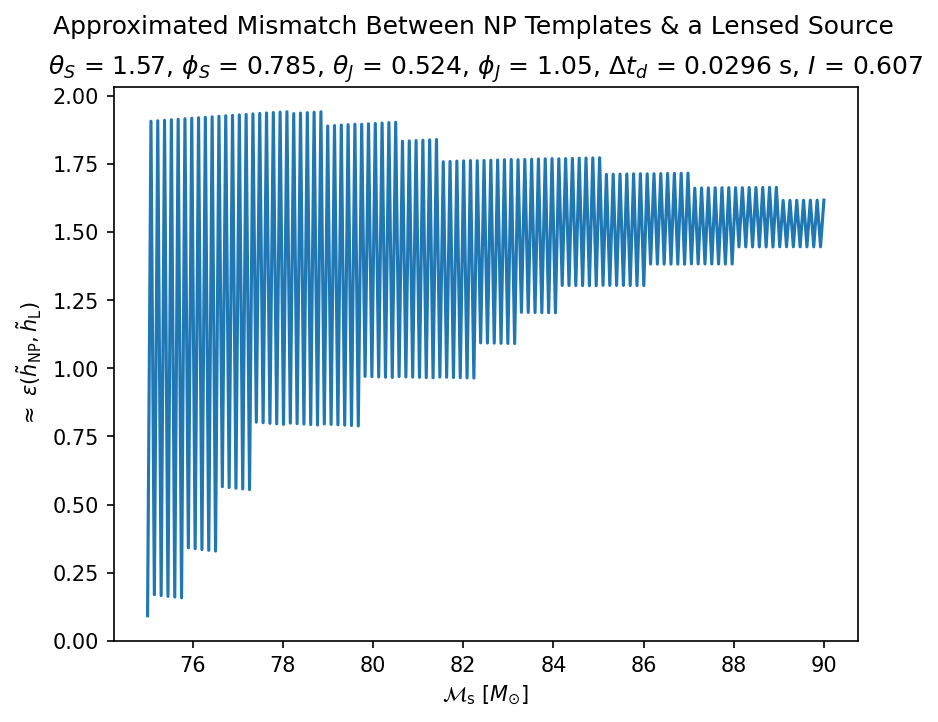

In [26]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

# MLz_range = np.array([1e3, 2e3, 2500, 3e3, 3500, 4e3, 5e3, 1e4])
MLz_range = np.array([3e3])  # TESTING

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    approx_mismatch_plot11(NP_params, lens_params)
    plt.show()

In [60]:
def approx_mismatch_plot12():  # assuming FLAT psd
    # get analytical functions
    I, x, y = sp.symbols("I x y")

    f1_integrand = (1 + I**0.5 * sp.sin(x)) * sp.cos(y) + I**0.5 * sp.cos(x) * sp.sin(y)
    f1 = sp.integrate(f1_integrand, x)
    f1 = sp.simplify(f1)

    f2_integrand = 1
    f2 = sp.integrate(f2_integrand, x)
    f2 = sp.simplify(f2)

    f3_integrand = 1 + 2 * I**0.5 * sp.sin(x) + I
    f3 = sp.integrate(f3_integrand, x)
    f3 = sp.simplify(f3)

    # get lensing parameters
    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I_val = lens_inst.I()
    x_min = 2 * np.pi * Delta_td * 20

    # convert f1 to numpy function
    f1 = f1.subs({I: I_val})
    f2 = f2.subs({I: I_val})
    f3 = f3.subs({I: I_val})
    f1_np = sp.lambdify((x, y), f1, "numpy")
    f2_np = sp.lambdify(x, f2, "numpy")
    f3_np = sp.lambdify(x, f3, "numpy")

    mcz_arr = np.linspace(70, 90, 200)
    x_arr = 2 * np.pi * Delta_td * get_fcut_from_mcz(mcz_arr, lens_params["eta"])

    # for every x in x_arr, find the corresponding y from 0 to 2pi such that f1 is maximized
    y_arr = np.zeros(len(x_arr))
    for i, x_val in enumerate(x_arr):
        Delta_f1_max = -np.inf
        for y_val in np.linspace(0, 2 * np.pi, 1000):
            # DOES consider the lower limit at 20 Hz for f1
            Delta_f1 = f1_np(x_val, y_val) - f1_np(x_min, y_val)
            if Delta_f1 > Delta_f1_max:
                Delta_f1_max = Delta_f1
                y_arr[i] = y_val

    # calculate epsilon
    epsilon_arr = (
        1
        - (f1_np(x_arr, y_arr) - f1_np(x_min, y_arr))
        / ((f2_np(x_arr) - f2_np(x_min)) * (f3_np(x_arr) - f3_np(x_min))) ** 0.5
    )

    plt.plot(mcz_arr, epsilon_arr)
    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\approx$ $\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")

    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I_val,
        )
    )

    plt.suptitle(r"Approximated Mismatch Between NP Templates & a Lensed Source")

    return epsilon_arr

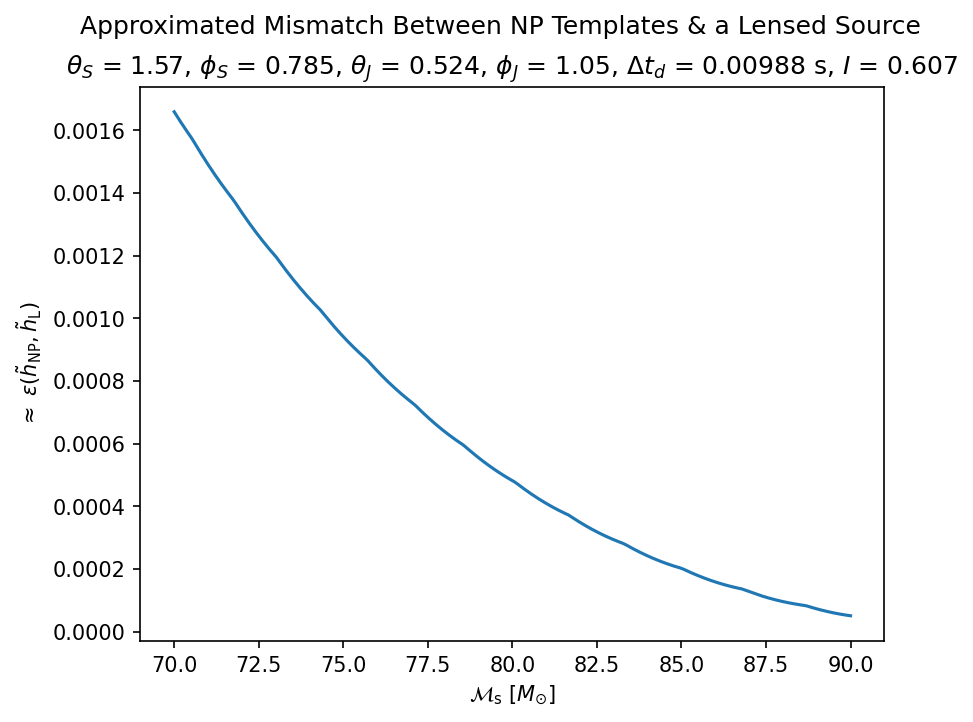

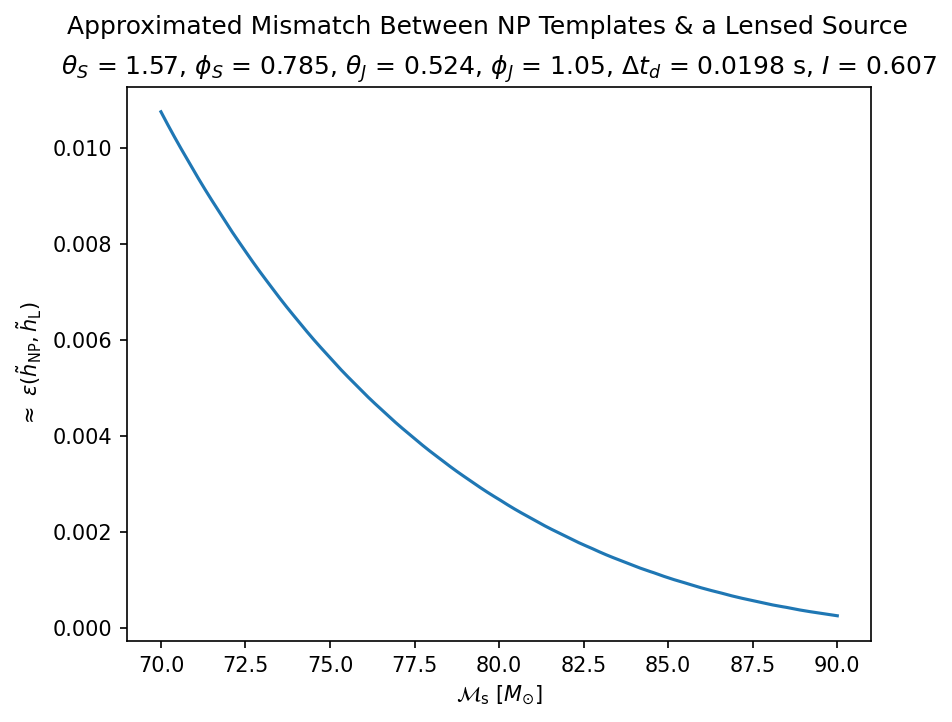

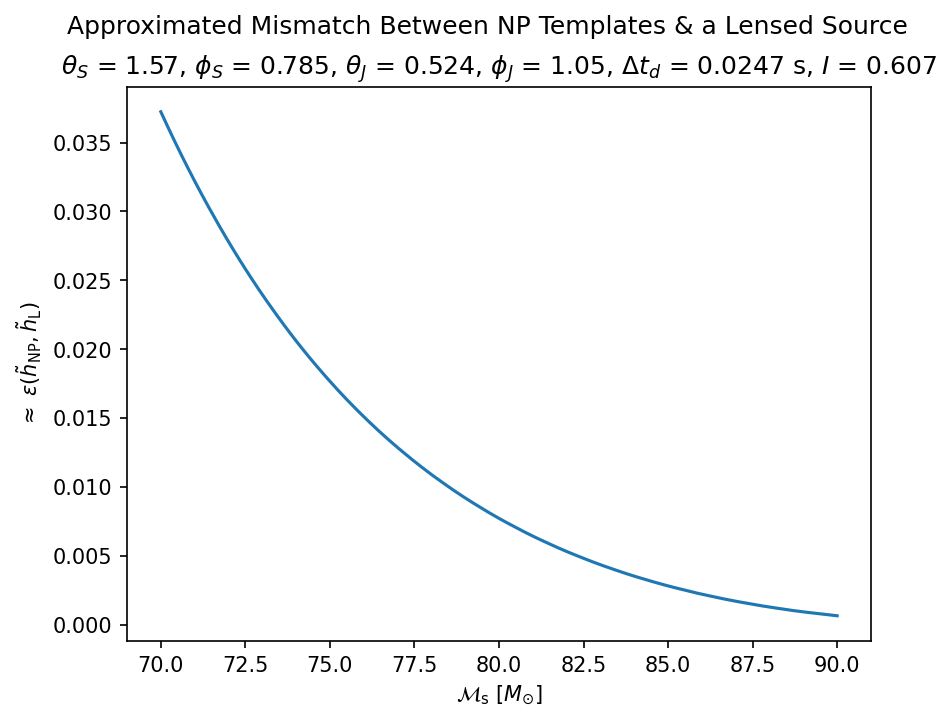

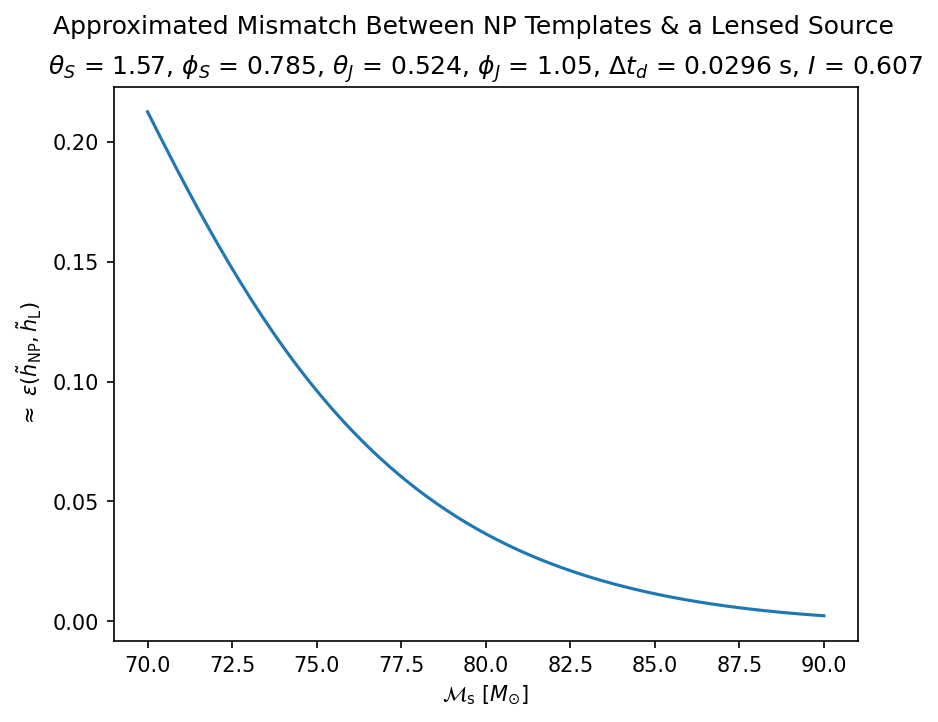

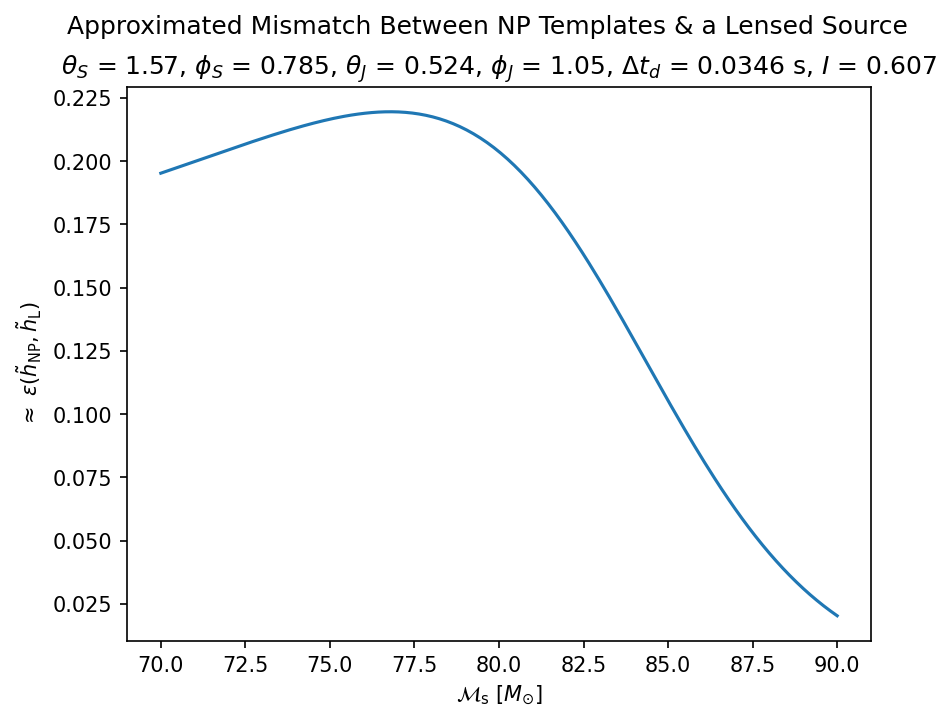

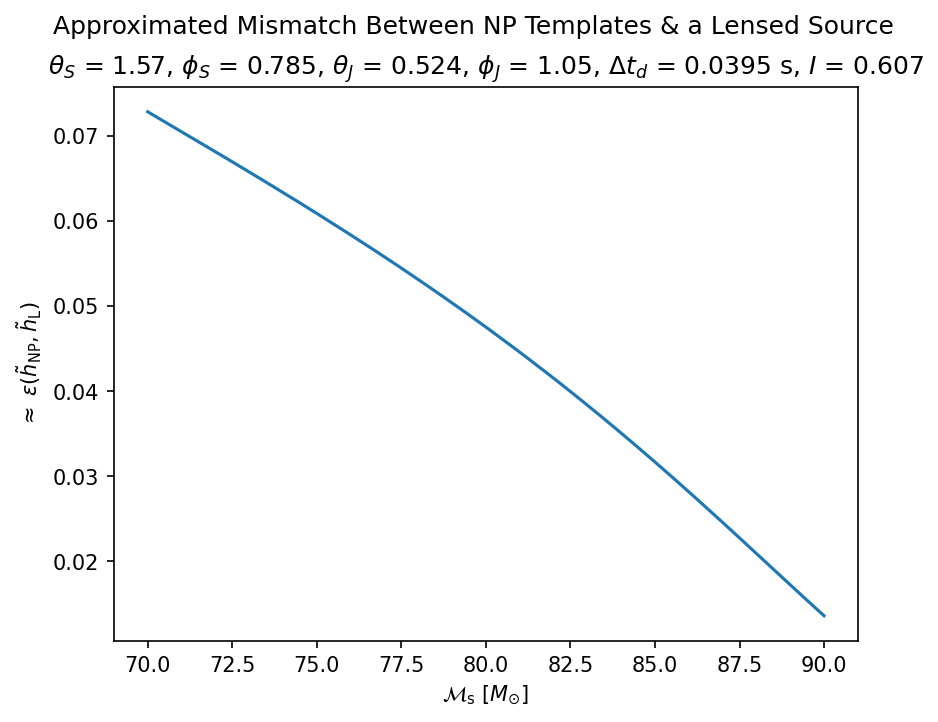

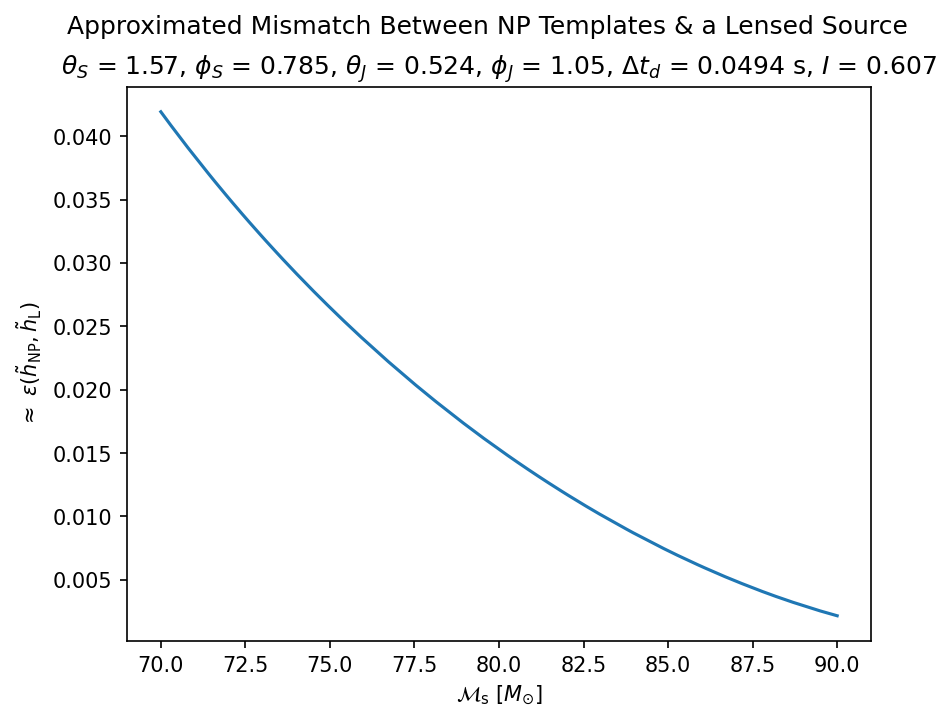

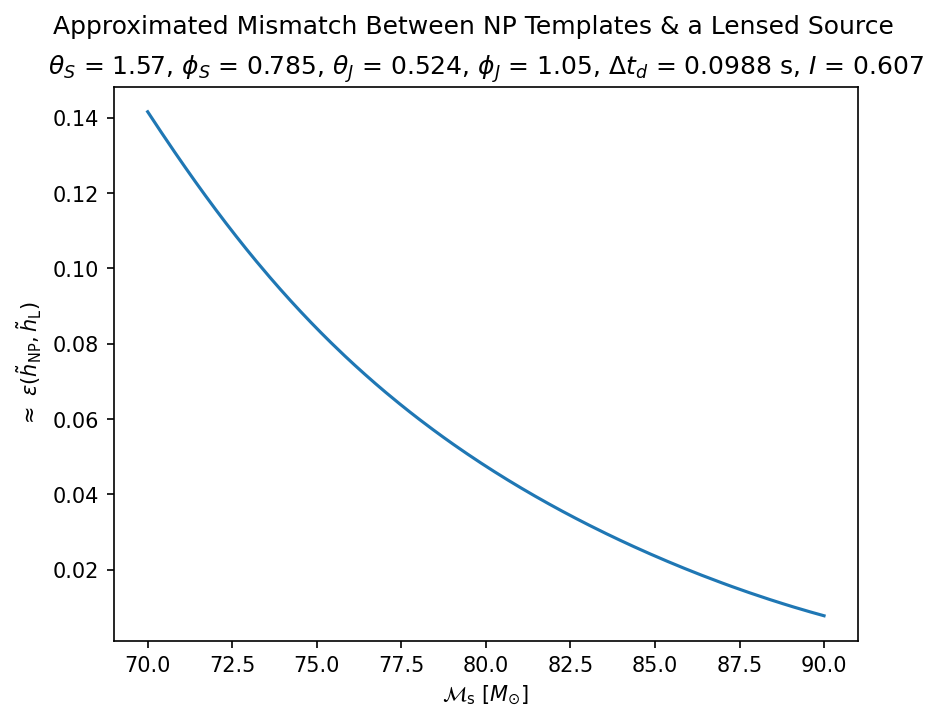

In [61]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

MLz_range = np.array([1e3, 2e3, 2500, 3e3, 3500, 4e3, 5e3, 1e4])

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    approx_mismatch_plot12()  # FLAT psd, probably WRONG
    plt.show()